<div class="alert alert-block alert-info"> <br>

#  <center> <b> Data Mining Project- ABCDEats Inc. </center> <br>
## <center> Fall Semester 2024-2025 <center>

  <div>

### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Inês Araújo       | 20240532@novaims.unl.pt      | 20240532   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Rafael Silva      | 20240511@novaims.unl.pt      | 20240511   |
| Rita Serra        | 20240515@novaims.unl.pt      | 20240515   |

<a id = "toc"></a>

## **Table of Contents** <br>
+ [1.Import Libraries](#importlibraries) <br>

+ [2. Import Dataset](#importdataset) <br>

+ [3. Metadata](#metadata) <br>

+ [4. Data Exploration](#section_4) <br>
  + [4.1 Initial Data Preview](#section_4_1) <br>
    + [4.1.1 Analysis for `is_chain` Variable](#section_4_1_1) <br>
    + [4.1.2 Processing decisions for `is_chain` Variable (first part)](#section_4_1_2) <br>
  + [4.2 Duplicates](#section_4_2) <br>
    + [4.2.1 First Analysis](#section_4_2_1) <br>
    + [4.2.2 Dealing with Duplicates](#section_4_2_2) <br>
  + [4.3 Missing Values](#section_4_3) <br>
  + [4.4 Descriptive Statistics](#section_4_4) <br>
  + [4.5 Variables Analysis](#section_4_5) <br>
    + [4.5.1 Analysis of Categorical variables and Unique values](#section_4_5_1) <br>
    + [4.5.2 Analysis of Numeric variables and Unique values](#section_4_5_2) <br>

+ [5. Feature Engineering](#section_5) <br>
  + [5.1 Creating New Features](#section_5_1) <br>

  + [5.2 Analysis with New Features](#section_5_2) <br>
    + [5.2.1 Discrepancies Between Product Count and Daily/Weekly Totals: Analysis and Possible Causes](#section_5_2_1) <br>
      + [5.2.1.1 Dealing with mismatched rows of missings (`HR_0` column)](#section_5_2_1_1) <br>
    + [5.2.2 Heat Maps of Correlation Among Days of the Week, Cuisine Types, and Hours of the Day](#section_5_2_2) <br>
      + [5.2.2.1 Heat Maps between Individual Cuisine Types and between Grouped Cuisine Types](#section_5_2_2_1) <br>
      + [5.2.2.2 Heat Maps between Days of the Week and between Work and Leisure Days](#section_5_2_2_2) <br>
      + [5.2.2.3 Heat Maps between Individual Hours and between Grouped Time Periods](#section_5_2_2_3) <br>
    + [5.2.3 Analysis of Demand Patterns Across Cuisine Groups, Day Types, and Time Periods](#section_5_2_3) <br>
      + [5.2.3.1 Analysis of Bar Plots: Cuisine Group Popularity by Time of Day](#section_5_2_3_1) <br>
      + [5.2.3.2 Analysis of Bar Plots: Popularity of Work and Leisure Days by Cuisine Groups](#section_5_2_3_2) <br>
      + [5.2.3.3 Analysis of Time Period Demand on Work and Leisure Days](#section_5_2_3_3) <br>

+ [6. Visual Exploration](#section_6) <br>
  + [6.1 Numeric Variables - Univariate Analysis](#section_6_1) <br>
     + [6.1.1 Histograms](#section_6_1_1) <br>
     + [6.1.2 Boxplots](#section_6_1_2) <br>
     + [6.1.3 Bar plots](#section_6_1_3) <br>
  + [6.2 Numeric Variables - Bivariate Analysis](#section_6_2) <br>
     + [6.2.1 Scatter Plots](#section_6_2_1) <br>
     + [6.2.1 Heatmaps](#section_6_2_2) <br>
  + [6.3 Categorical Variables - Univariate Analysis](#section_6_3) <br>
  + [6.4 Categorical Variables - Bivariate Analysis](#section_6_4) <br>
    + [6.4.1 Customer Region vs Payment Method](#section_6_4_1) <br>
    + [6.4.2 Customer Region vs Last Promo](#section_6_4_2) <br>
  + [6.5 Numeric Variables vs Categorical Variables](#section_6_5) <br>

+ [7. Preprocessing](#section_7) <br>
  + [7.1 Processing decisions for `is_chain` Variable (second part)](#section_7_2) <br>
  + [7.2 Missing Values Imputation](#section_7_2) <br>
    + [7.2.1 Numeric Features](#section_7_2_1) <br>
    + [7.2.2 Categorical Features](#section_7_2_2) <br>
  + [7.3 Outlier removal](#section_7_3) <br>
    + [7.3.1 Using the IQR method](#section_7_3_1) <br>
+ [7.4 Variable selection: Redundancy](#section_7_4) <br>
  + [7.4.1 Numeric Variables](#section_7_4_1) <br>
  + [7.4.2 Categorical Variables](#section_7_4_2) <br>
+ [7.5 Data Normalization](#section_7_5) <br>
+ [7.6 Encoding](#section_7_6) <br>
+ [7.7 PCA](#section_7_7) <br>

<div class="alert alert-block alert-success">
<a class="anchor" id="importlibraries">

# 1. Import Libraries
</a>

[Back to ToC](#toc)

In this section we will imported the needed libraries for this notebook.

</div>

In [1]:
from functions import *

<div class="alert alert-block alert-success">
<a class="anchor" id="importdataset">

# 2. Import datase
</a>

[Back to ToC](#toc)

Importing the datasets for further processing.

</div>

In [2]:
# Load a CSV d named 'DM2425_ABCDEats_DATASET.csv' into a pandas DataFrame.
# The 'sep' parameter specifies that the values are separated by commas.

df = pd.read_csv('DM2425_ABCDEats_DATASET.csv', sep = ',', index_col= 'customer_id')

The __`customer_id`__ column was set has index column.

In [ ]:
# To check that the imports really worked, we will use `.head()`.
df.head()

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360          18.0             2              5   
5d272b9dcb             8670          17.0             2              2   
f6d1b2ba63             4660          38.0             1              2   
180c632ed8             4660           NaN             2              3   
4eb37a6705             4660          20.0             2              5   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
1b8f824d5e          1          0.0           1   DELIVERY           DIGI   
5d272b9dcb          2          0.0           1   DISCOUNT           DIGI   
f6d1b2ba63          2          0.0           1   DISCOUNT           CASH   
180c632ed8          1          0.0           2   DELIVERY           DIGI   
4eb37a6705          0          0.0           2          -           DIGI   

             CUI_American  ...  HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  \
customer_id                ...                                             
1b8f824d5e           0.00  ...      0      0      0      0      2      0   
5d272b9dcb          12.82  ...      0      0      0      0      0      0   
f6d1b2ba63           9.20  ...      0      0      0      0      0      0   
180c632ed8           0.00  ...      1      0      0      0      0      0   
4eb37a6705          14.57  ...      0      0      0      0      0      0   

             HR_20  HR_21  HR_22  HR_23  
customer_id                              
1b8f824d5e       0      0      0      0  
5d272b9dcb       0      0      0      0  
f6d1b2ba63       0      0      0      0  
180c632ed8       0      0      0      0  
4eb37a6705       0      0      0      0  

[5 rows x 55 columns]

In [4]:
# Displays the last rows of the DataFrame to check if the last row contains a summary of the all columns.
# It's important to ensure that there isn't an entry that represents the sum of values,
# as it wouldn't make sense for a single customer to represent the total of all ages, for example.
df.tail()

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
f4e366c281             8670          30.0             1              1   
f6b6709018             8670           NaN             1              1   
f74ad8ce3f             8670          24.0             1              1   
f7b19c0241             8670          34.0             1              1   
fd40d3b0e0             4660          30.0             1              1   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
f4e366c281          1          NaN           0    FREEBIE           DIGI   
f6b6709018          0          NaN           0   DELIVERY           DIGI   
f74ad8ce3f          1          NaN           0          -           DIGI   
f7b19c0241          0          NaN           0   DISCOUNT           DIGI   
fd40d3b0e0          0          NaN           0          -           CASH   

             CUI_American  ...  HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  \
customer_id                ...                                             
f4e366c281           0.00  ...      0      0      0      0      0      0   
f6b6709018          18.04  ...      0      0      1      0      0      0   
f74ad8ce3f           0.00  ...      0      0      0      0      0      0   
f7b19c0241           0.00  ...      0      0      0      0      0      0   
fd40d3b0e0           0.00  ...      0      0      1      0      0      0   

             HR_20  HR_21  HR_22  HR_23  
customer_id                              
f4e366c281       0      0      0      0  
f6b6709018       0      0      0      0  
f74ad8ce3f       0      0      0      0  
f7b19c0241       0      0      0      0  
fd40d3b0e0       0      0      0      0  

[5 rows x 55 columns]

<div class="alert alert-block alert-success">
<a class="anchor" id="metadata">
    
# 3. Metadata
</a>

[Back to ToC](#toc)

</div>

- __`customer_id`__: Unique identifier for each customer. <br>
- __`customer_region`__: Geographic region where the customer is located. <br>
- __`customer_age`__: Age of the customer. <br>
- __`vendor_count`__: Number of unique vendors the customer has ordered from. <br>
- __`product_count`__: Total number of products the customer has ordered. <br> 
- __`is_chain`__: Indicates whether the customer's order was from a chain restaurant. <br>
- __`first_order`__: Number of days from the start of the dataset when the customer first placed an order. <br>
- __`last_order`__: Number of days from the start of the dataset when the customer most recently placed an order. <br>
- __`last_promo`__: The category of the promotion or discount most recently used by the customer. <br>
- __`payment_method`__: Method most recently used by the customer to pay for their orders. <br>
- __`CUI_American, CUI_Asian, CUI_Chinese, CUI_Italian, etc.`__: The amount in monetary units spent by the customer from the indicated type of cuisine. <br>
- __`DOW_0 to DOW_6`__: Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday). <br>
- __`HR_0 to HR_23`__: Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM). <br>

<div class="alert alert-block alert-success">
<a class="anchor" id="section_4">
    
# 4. Data Exploration 
</a>

[Back to ToC](#toc)

</div>

<a class="anchor" id="section_4_1">

## 4.1 Initial Data Preview

</a>

[Back to 4. Data Exploration](#section_4)

The __`.info`__ function displays a concise summary of our DataFrame, including the number of non-null entries, data types of each column and their names, and memory usage.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

In [6]:
# Retrieves the dimensions of the DataFrame
df.shape

(31888, 55)

Using the `shape` function, we found that the DataFrame contains **31,888 rows** and **55 columns**.

**Non-null Count:**
- **`customer_age`**, **`first_order`**, and **`HR_0`**: These variables contain missing values.
- **All other variables:** No missing values detected.

In [7]:
# Checks the data type of each column
df.dtypes

customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                       

**Comparing Data Types with Metadata: Identified Inconsistencies**

- **`customer_age`**: This variable should be an integer, as it represents whole years, not fractions or decimals including months.
- **`first_order`**: This variable must also be an integer, indicating the number of days from the start of the dataset until the customer’s first order. Hours, minutes, and seconds are not relevant.
- **`HR_0`**: This variable should be an integer, as it represents the total number of orders placed during the first hour of the day. Partial or "incomplete" orders are not applicable.

In [8]:
# Fix the data types of this columns to ensure they are integers.
# The 'Int64' dtype is used to allow for nullable integers (handles NaNs safely).

columns_to_convert = ['customer_age', 'first_order', 'HR_0']
convert_columns_to_dtype(df, columns_to_convert, dtype='Int64')

In [9]:
# This helps verify that the data types have been correctly set, especially for columns we changed.
df.dtypes

customer_region              object
customer_age                  Int64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                   Int64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                       

<a class="anchor" id="section_4_1_1">

### 4.1.1 Analysis for `is_chain` Variable

</a>

In [10]:
# Check unique values in 'is_chain' to understand its range
df['is_chain'].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80], dtype=int64)

In [11]:
# View frequency of each value to identify common and rare categories
df['is_chain'].value_counts()

is_chain
1     8547
0     6104
2     5893
3     3698
4     2165
5     1380
6      946
7      679
8      500
9      374
10     291
11     248
12     169
13     152
14     138
15      89
16      68
18      65
17      55
19      35
20      34
21      29
22      26
24      23
23      20
26      20
27      16
25      14
28      13
29      10
31       9
30       9
32       8
33       6
34       6
36       5
43       5
40       5
37       4
35       4
45       4
39       2
42       2
48       2
75       1
63       1
54       1
83       1
49       1
46       1
61       1
44       1
67       1
56       1
81       1
73       1
47       1
38       1
65       1
80       1
Name: count, dtype: int64

In [12]:
# Calculate average vendor_count and product_count for each is_chain category
avg_stats = df.groupby('is_chain')[['vendor_count', 'product_count']].mean().sort_values(by='vendor_count', ascending=False)

# Display the Result
avg_stats

vendor_count  product_count
is_chain                             
73           41.000000     110.000000
81           40.000000     269.000000
47           32.000000      83.000000
46           30.000000      64.000000
38           28.000000      57.000000
83           27.000000     109.000000
39           25.000000      49.000000
65           25.000000      84.000000
45           24.000000      72.750000
42           22.000000      59.000000
36           22.000000      65.600000
40           21.400000      61.800000
34           20.000000      53.833333
43           19.600000      66.000000
54           19.000000      91.000000
56           19.000000      75.000000
32           17.625000      50.000000
30           17.222222      50.222222
61           17.000000      67.000000
63           17.000000      89.000000
37           17.000000      62.250000
29           16.500000      39.300000
44           15.000000      69.000000
28           15.000000      42.000000
26           14.500000      40.250000
33           14.333333      53.500000
67           14.000000      91.000000
48           13.500000      64.000000
35           13.250000      51.000000
22           13.192308      34.384615
27           13.125000      40.375000
31           13.111111      51.333333
17           12.927273      27.672727
24           12.391304      37.304348
23           12.350000      33.000000
20           12.294118      30.323529
49           12.000000      76.000000
18           11.800000      28.600000
19           11.542857      28.657143
16           10.955882      26.661765
25           10.928571      35.285714
21           10.620690      30.344828
15            9.910112      23.786517
14            9.246377      21.652174
13            9.210526      20.368421
12            8.455621      19.568047
11            8.254032      18.008065
10            7.711340      16.512027
9             7.427807      15.331551
8             6.468000      13.330000
7             6.067747      11.790869
6             5.450317      10.159619
5             4.653623       8.438406
4             4.108083       7.028176
80            4.000000      88.000000
3             3.345592       5.420768
2             2.572713       3.899033
75            2.000000      75.000000
1             1.796654       2.668422
0             1.525066       3.006062

**Interpretation of `is_chain` and Relationship with `vendor_count`**

<br>**Analysis Context**<br>
During our analysis of the `is_chain` variable, we came across an interesting case: for chain `73`, there’s only a single entry in the dataset, yet the associated `vendor_count` value is `41`. This raised some important questions about how to interpret these data, particularly since `vendor_count` represents the number of unique vendors a customer interacted with.

<br>**Note:** The interpretations presented here are based on the analysis we conducted and the specific data values we encountered during our exploration.

<br>1. Observations on the Distribution of `is_chain`
- The `is_chain` variable exhibits a **highly uneven distribution**. Some categories are extremely frequent, while many others appear just a handful of times, or only once.
- Chains with values `0`, `1`, `2`, `3`, and `4` dominate the dataset. This suggests a strong preference among customers for these chains, making them the most popular overall.
- In contrast, a large portion of the `is_chain` values occur just once, creating a **long-tail distribution**. This pattern is common in datasets where a few values are very frequent, while the majority are sparse.
- To simplify the analysis and concentrate on the most relevant chains, it may be worthwhile to group the less frequent chains into an "Other Chains" category.

<br>2. Interpretation of `vendor_count`
- The `vendor_count` variable reflects the **number of unique vendors** a customer placed orders from over a given time period.
- In the specific case of chain `73`, the `vendor_count = 41` indicates that the customer interacted with 41 different vendors. This doesn’t mean the customer made 41 orders or that all orders were from chain `73`. Instead, it highlights the **variety of vendors** involved in their transactions.

<br>3. Interpretation of `is_chain`
- The `is_chain` variable likely represents the **primary chain** a customer engages with most often, rather than all the chains they’ve ordered from.
- For example, `is_chain = 73` implies that the customer’s highest number of orders, or perhaps the greatest total spending, was with chain `73`. However, it doesn’t rule out that they also ordered from other chains or independent vendors.

<br>4. Rationale for Keeping `is_chain` as a Categorical Variable
- Converting `is_chain` into a binary variable (e.g., distinguishing only between "chain" and "independent") would result in losing valuable details about customer preferences for specific chains.
- By maintaining `is_chain` as a categorical variable, we preserve the ability to analyze customer loyalty and preferences for specific chains, enabling richer insights.

<br>5. Why `vendor_count` Remains Relevant
- Even though `is_chain` reflects the primary chain, `vendor_count` is still meaningful as it highlights vendor diversity. It captures the range of establishments a customer interacted with, while `is_chain` points to the chain with the most engagement.
- This explains why a customer can have a high `vendor_count` (like `41`) even if they only appear under one `is_chain` value. The customer might favor a specific chain (`73`) but still order from various other vendors.

<br>**Conclusion**<br>
Based on this analysis, we conclude that `is_chain` should be interpreted as a customer’s **preferred restaurant chain**, the chain with which they’ve had the most frequent or significant interactions. A value of `0` for `is_chain` suggests a preference for **independent restaurants** or non-major chains. Together, `is_chain` and `vendor_count` offer complementary insights, helping us better understand customer preferences and their diversity in consumption behavior.

<br>**Next Steps:**
The processing of the `is_chain` variable, as well as its integration into downstream analyses, will be covered in the subsequent processing section. These steps will focus on operationalizing the insights derived here to enhance the overall analysis.

<a class="anchor" id="section_4_1_2">

### 4.1.2 Processing decisions for `is_chain` Variable (first part)

</a>

In [13]:
# Fix the data type of the 'is_chain' column to 'object' to handle it as a categorical variable.
convert_columns_to_dtype(df, columns=['is_chain'], dtype='object')


# Display the data type of the 'is_chain' column to confirm the change.
print(df['is_chain'].dtype)

object


As mentioned before, we decided to convert the variable __`is_chain`__ into an object type

<a class="anchor" id="section_4_2">

## 4.2 Duplicates

</a>

[Back to 4. Data Exploration](#section_4)

<a class="anchor" id="section_4_2_1">

### 4.2.1 First Analysis

</a>

In [14]:
find_and_count_duplicates_index_version(df)

Duplicate count for each 'customer_id' (index of the dataframe):
customer_id
b55012ee1c    2
24251eb7da    2
671bf0c738    2
742ca068fc    2
df91183978    2
6bbf5f74cd    2
8aa9bbc147    2
cf563a0a98    2
201a13a34d    2
06018a56be    2
fac7984c0d    2
b8e7a643a4    2
cc08ef25ce    2
Name: count, dtype: int64

Total duplicated rows based on 'customer_id': 26


**Insights from the Duplicate Analysis:**
- We identified **26 rows** with duplicate values, corresponding to **13 unique `customer_id` entries** that are duplicated.
- In the context of this project, retaining multiple instances of the same **`customer_id`** is not meaningful and could lead to redundancy or inaccuracies in the analysis.

**Action Points:** To ensure data quality and consistency, we need to remove these duplicated rows. This step is crucial for accurate customer segmentation and subsequent analysis.


<a class="anchor" id="section_4_2_2">

### 4.2.2 Dealing with Duplicates

</a>

In [15]:
remove_duplicates_by_index(df, index_column='customer_id')

Remaining duplicated rows based on 'customer_id' after cleanup: 0


<a class="anchor" id="section_4_3">

## 4.3 Missing Values

</a>

[Back to 4. Data Exploration](#section_4)

In [16]:
# Check if there are any values ​​that contain an empty string ("")
df[df.eq("").any(axis=1)]

Empty DataFrame
Columns: [customer_region, customer_age, vendor_count, product_count, is_chain, first_order, last_order, last_promo, payment_method, CUI_American, CUI_Asian, CUI_Beverages, CUI_Cafe, CUI_Chicken Dishes, CUI_Chinese, CUI_Desserts, CUI_Healthy, CUI_Indian, CUI_Italian, CUI_Japanese, CUI_Noodle Dishes, CUI_OTHER, CUI_Street Food / Snacks, CUI_Thai, DOW_0, DOW_1, DOW_2, DOW_3, DOW_4, DOW_5, DOW_6, HR_0, HR_1, HR_2, HR_3, HR_4, HR_5, HR_6, HR_7, HR_8, HR_9, HR_10, HR_11, HR_12, HR_13, HR_14, HR_15, HR_16, HR_17, HR_18, HR_19, HR_20, HR_21, HR_22, HR_23]
Index: []

[0 rows x 55 columns]

The output table shows **0 rows**, indicating that the DataFrame does not contain any entries with empty string values (`""`). This confirms that all text-based columns are either fully populated or use other indicators, such as `NaN`, to represent missing data. As a result, the data cleaning process is simplified, with no empty strings requiring handling.

In [17]:
# Count the number of missing (NaN) values in each column of the DataFrame.
df.isna().sum()

customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5                          0
DOW_6     

In [18]:
# Calculate the percentage of missing values for each column
df.isna().sum()/len(df)*100

customer_region             0.000000
customer_age                2.280784
vendor_count                0.000000
product_count               0.000000
is_chain                    0.000000
first_order                 0.332549
last_order                  0.000000
last_promo                  0.000000
payment_method              0.000000
CUI_American                0.000000
CUI_Asian                   0.000000
CUI_Beverages               0.000000
CUI_Cafe                    0.000000
CUI_Chicken Dishes          0.000000
CUI_Chinese                 0.000000
CUI_Desserts                0.000000
CUI_Healthy                 0.000000
CUI_Indian                  0.000000
CUI_Italian                 0.000000
CUI_Japanese                0.000000
CUI_Noodle Dishes           0.000000
CUI_OTHER                   0.000000
CUI_Street Food / Snacks    0.000000
CUI_Thai                    0.000000
DOW_0                       0.000000
DOW_1                       0.000000
DOW_2                       0.000000
D

**Insights from the Missing Value Analysis:**
- The `customer_age` column has 727 missing values, accounting for approximately 2.28% of our dataset.
- The `first_order` column has 106 missing values, representing about 0.33%.
- The `HR_O` column has 1,164 missing values, which is roughly 3.65%.

**Note:** Both the `customer_id` and `customer_region` columns are complete, with no missing values.

**Action Points:**
We need to handle the missing values in `customer_age`, `first_order`, and `HR_0` to ensure the data quality.

<a class="anchor" id="section_4_4">

## 4.4 Descriptive Statistics

</a>

[Back to 4. Data Exploration](#section_4)

In [19]:
# Show summary statistics for all columns in the DataFrame
# 'include="all"' includes both numerical and categorical columns
# '.T' transposes the output to make it easier to read

df.describe(include="all").T

count unique   top    freq       mean        std  \
customer_region             31875      9  8670    9761        NaN        NaN   
customer_age              31148.0   <NA>  <NA>    <NA>  27.507545   7.161828   
vendor_count              31875.0    NaN   NaN     NaN   3.102714   2.771753   
product_count             31875.0    NaN   NaN     NaN   5.668424   6.957933   
is_chain                  31875.0   60.0   1.0  8543.0        NaN        NaN   
first_order               31769.0   <NA>  <NA>    <NA>  28.469924  24.104626   
last_order                31875.0    NaN   NaN     NaN  63.672376  23.227992   
last_promo                  31875      4     -   16744        NaN        NaN   
payment_method              31875      3  CARD   20153        NaN        NaN   
CUI_American              31875.0    NaN   NaN     NaN   4.877205  11.647043   
CUI_Asian                 31875.0    NaN   NaN     NaN   9.955306  23.561492   
CUI_Beverages             31875.0    NaN   NaN     NaN   2.298224   8.475868   
CUI_Cafe                  31875.0    NaN   NaN     NaN    0.80149   6.428422   
CUI_Chicken Dishes        31875.0    NaN   NaN     NaN   0.768409   3.657986   
CUI_Chinese               31875.0    NaN   NaN     NaN   1.431801   8.193374   
CUI_Desserts              31875.0    NaN   NaN     NaN   0.884719    5.26091   
CUI_Healthy               31875.0    NaN   NaN     NaN    0.95059   5.831747   
CUI_Indian                31875.0    NaN   NaN     NaN   1.631818   7.444679   
CUI_Italian               31875.0    NaN   NaN     NaN   3.234729  11.250094   
CUI_Japanese              31875.0    NaN   NaN     NaN   2.996031  10.182406   
CUI_Noodle Dishes         31875.0    NaN   NaN     NaN   0.711966   4.537359   
CUI_OTHER                 31875.0    NaN   NaN     NaN   3.001137   9.770104   
CUI_Street Food / Snacks  31875.0    NaN   NaN     NaN   3.910391  15.548367   
CUI_Thai                  31875.0    NaN   NaN     NaN    0.84204   4.433918   
DOW_0                     31875.0    NaN   NaN     NaN   0.555922   1.013634   
DOW_1                     31875.0    NaN   NaN     NaN   0.567561    1.04419   
DOW_2                     31875.0    NaN   NaN     NaN   0.590933     1.0459   
DOW_3                     31875.0    NaN   NaN     NaN   0.619388   1.069558   
DOW_4                     31875.0    NaN   NaN     NaN   0.677867   1.088284   
DOW_5                     31875.0    NaN   NaN     NaN   0.652957   1.069802   
DOW_6                     31875.0    NaN   NaN     NaN   0.704408   1.167592   
HR_0                      30711.0   <NA>  <NA>    <NA>        0.0        0.0   
HR_1                      31875.0    NaN   NaN     NaN   0.053835   0.317031   
HR_2                      31875.0    NaN   NaN     NaN   0.063153    0.35149   
HR_3                      31875.0    NaN   NaN     NaN   0.118306   0.497117   
HR_4                      31875.0    NaN   NaN     NaN    0.10171   0.437549   
HR_5                      31875.0    NaN   NaN     NaN   0.081914   0.358701   
HR_6                      31875.0    NaN   NaN     NaN   0.069616   0.329307   
HR_7                      31875.0    NaN   NaN     NaN   0.076675   0.377349   
HR_8                      31875.0    NaN   NaN     NaN   0.131859   0.635603   
HR_9                      31875.0    NaN   NaN     NaN   0.233945   0.725015   
HR_10                     31875.0    NaN   NaN     NaN   0.329663   0.891312   
HR_11                     31875.0    NaN   NaN     NaN   0.378259   0.960119   
HR_12                     31875.0    NaN   NaN     NaN   0.314259   0.842625   
HR_13                     31875.0    NaN   NaN     NaN   0.236424   0.637513   
HR_14                     31875.0    NaN   NaN     NaN   0.215686   0.599098   
HR_15                     31875.0    NaN   NaN     NaN   0.277114   0.738282   
HR_16                     31875.0    NaN   NaN     NaN    0.35658   0.874598   
HR_17                     31875.0    NaN   NaN     NaN   0.391059   0.943873   
HR_18                     31

In [20]:
# Checks the descriptive statistics of each numerical variable, rounding to 2 decimal places
df.describe().round(2).T

count   mean    std   min   25%   50%    75%  \
customer_age              31148.0  27.51   7.16  15.0  23.0  26.0   31.0   
vendor_count              31875.0    3.1   2.77   0.0   1.0   2.0    4.0   
product_count             31875.0   5.67   6.96   0.0   2.0   3.0    7.0   
first_order               31769.0  28.47   24.1   0.0   7.0  22.0   45.0   
last_order                31875.0  63.67  23.23   0.0  49.0  70.0   83.0   
CUI_American              31875.0   4.88  11.65   0.0   0.0   0.0   5.66   
CUI_Asian                 31875.0   9.96  23.56   0.0   0.0   0.0  11.83   
CUI_Beverages             31875.0    2.3   8.48   0.0   0.0   0.0    0.0   
CUI_Cafe                  31875.0    0.8   6.43   0.0   0.0   0.0    0.0   
CUI_Chicken Dishes        31875.0   0.77   3.66   0.0   0.0   0.0    0.0   
CUI_Chinese               31875.0   1.43   8.19   0.0   0.0   0.0    0.0   
CUI_Desserts              31875.0   0.88   5.26   0.0   0.0   0.0    0.0   
CUI_Healthy               31875.0   0.95   5.83   0.0   0.0   0.0    0.0   
CUI_Indian                31875.0   1.63   7.44   0.0   0.0   0.0    0.0   
CUI_Italian               31875.0   3.23  11.25   0.0   0.0   0.0    0.0   
CUI_Japanese              31875.0    3.0  10.18   0.0   0.0   0.0    0.0   
CUI_Noodle Dishes         31875.0   0.71   4.54   0.0   0.0   0.0    0.0   
CUI_OTHER                 31875.0    3.0   9.77   0.0   0.0   0.0    0.0   
CUI_Street Food / Snacks  31875.0   3.91  15.55   0.0   0.0   0.0    0.0   
CUI_Thai                  31875.0   0.84   4.43   0.0   0.0   0.0    0.0   
DOW_0                     31875.0   0.56   1.01   0.0   0.0   0.0    1.0   
DOW_1                     31875.0   0.57   1.04   0.0   0.0   0.0    1.0   
DOW_2                     31875.0   0.59   1.05   0.0   0.0   0.0    1.0   
DOW_3                     31875.0   0.62   1.07   0.0   0.0   0.0    1.0   
DOW_4                     31875.0   0.68   1.09   0.0   0.0   0.0    1.0   
DOW_5                     31875.0   0.65   1.07   0.0   0.0   0.0    1.0   
DOW_6                     31875.0    0.7   1.17   0.0   0.0   0.0    1.0   
HR_0                      30711.0    0.0    0.0   0.0   0.0   0.0    0.0   
HR_1                      31875.0   0.05   0.32   0.0   0.0   0.0    0.0   
HR_2                      31875.0   0.06   0.35   0.0   0.0   0.0    0.0   
HR_3                      31875.0   0.12    0.5   0.0   0.0   0.0    0.0   
HR_4                      31875.0    0.1   0.44   0.0   0.0   0.0    0.0   
HR_5                      31875.0   0.08   0.36   0.0   0.0   0.0    0.0   
HR_6                      31875.0   0.07   0.33   0.0   0.0   0.0    0.0   
HR_7                      31875.0   0.08   0.38   0.0   0.0   0.0    0.0   
HR_8                      31875.0   0.13   0.64   0.0   0.0   0.0    0.0   
HR_9                      31875.0   0.23   0.73   0.0   0.0   0.0    0.0   
HR_10                     31875.0   0.33   0.89   0.0   0.0   0.0    0.0   
HR_11                     31875.0   0.38   0.96   0.0   0.0   0.0    0.0   
HR_12                     31875.0   0.31   0.84   0.0   0.0   0.0    0.0   
HR_13                     31875.0   0.24   0.64   0.0   0.0   0.0    0.0   
HR_14                     31875.0   0.22    0.6   0.0   0.0   0.0    0.0   
HR_15                     31875.0   0.28   0.74   0.0   0.0   0.0    0.0   
HR_16                     31875.0   0.36   0.87   0.0   0.0   0.0    0.0   
HR_17                     31875.0   0.39   0.94   0.0   0.0   0.0    0.0   
HR_18                     31875.0   0.34   0.89   0.0   0.0   0.0    0.0   
HR_19                     31875.0   0.25    0.8   0.0   0.0   0.0    0.0   
HR_20                     31875.0   0.14   0.59   0.0   0.0   0.0    0.0   
HR_21                     31875.0   0.07   0.35   0.0   0.0   0.0    0.0   
HR_22                     31875.0   0.05    0.3   0.0   0.0   0.0    0.0   
HR_23                     31875.0   0.05   0.28   0.0   0.0   0.0    0.0   

                             max  
customer_age                80.0  
vendo

In [ ]:
calculate_categorical_statistics(df)

Count Unique   Top    Freq Most Frequent Percentage
customer_region    31875      9  8670    9761                30.622745
is_chain         31875.0   60.0   1.0  8543.0                26.801569
last_promo         31875      4     -   16744                52.530196
payment_method     31875      3  CARD   20153                63.225098

**Key Statistics Summary**

<br>**Categorical Data**

- **Customer Region**: The dataset includes customers from **nine distinct regions**. Region **8670** stands out with the highest concentration of customers, **9,761 entries**, which is about **30.6%** of the sample. This suggests a regional preference or a higher customer base in this area, potentially driven by stronger market presence or targeted promotional efforts.

- **Promotional Use (`last_promo`)**: This column captures **four distinct promotion types**. Interestingly, **52.5%** of customers have no recorded promotion usage, represented by `'-'`. Among those who do use promotions, **DELIVERY** is the most common type, highlighting the effectiveness of delivery-related discounts in engaging customers.

- **Payment Methods (`payment_method`)**: Customers use **three distinct payment methods**, with the majority (**63.2%**) opting for **card payments**. This preference reflects a trend toward digital transactions, likely driven by convenience or promotions encouraging card use.

<br>**Numerical Data**

- **Customer Age (`customer_age`)**: Customers range in age from **15 to 80 years**, with an average age of **27.5 years**, indicating a relatively young customer base. Most customers are between **23 and 31 years old**, as indicated by the 25th and 75th percentiles.

- **Vendor Interaction (`vendor_count`)**: Customers interact with **0 to 41 unique vendors**, with an average of **3.1 vendors** per customer. This suggests that most customers tend to stick with a few preferred vendors.

- **Products Ordered (`product_count`)**: The number of products ordered ranges from **0 to 269**, with an average of **5.67 products** per customer. While most customers show modest ordering activity, a subset exhibits significantly higher volumes, representing frequent or bulk buyers.

- **Order Timing (First and Last Orders)**:
    - The `first_order` and `last_order` columns, measured in days since the start of the dataset, range from **0 to 90 days**, with means of **28.48 days** and **63.68 days**, respectively.
    - This indicates that many customers made their first purchase early in the dataset period, while others remained active throughout the observed timeframe.

- **Cuisine Spending Patterns**:
    - Spending varies significantly across cuisines. For example, spending on **CUI_Asian** peaks at **896.71**, while spending on **CUI_Street Food / Snacks** reaches up to **454.45**.
    - The distribution of spending across these cuisines might highlight specific customer preferences, which could guide marketing efforts or promotions for popular cuisines.

- **Day and Hourly Order Distribution**:
  - **Day of the Week**: Saturday (`DOW_6`) has the highest average order volume, indicating increased customer activity during weekends.
  - **Peak Ordering Hours**: Orders peak in the evening, particularly at **5 PM (`HR_17`)** and **6 PM (`HR_18`)**, aligning with typical dinner times.

<a class="anchor" id="section_4_5">

## 4.5 Variables Analysis

</a>

[Back to 4. Data Exploration](#section_4)

<a class="anchor" id="section_4_5_1">

### 4.5.1 Analysis of Categorical variables and Unique values

</a>

| Categorical Variables   | Data Type |
|-------------------------|-----------|
| customer_region         | object    |
| is_chain                | object    |
| last_promo              | object    |
| payment_method          | object    |

In [ ]:
# Displays the count of unique values for each categorical column
display_value_counts_by_type(df, dtypes=('object',))

Value counts for column:
customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      13
Name: count, dtype: int64 
 

Value counts for column:
is_chain
1     8543
0     6099
2     5892
3     3696
4     2165
5     1380
6      946
7      679
8      500
9      373
10     291
11     248
12     169
13     152
14     138
15      89
16      68
18      65
17      55
19      35
20      34
21      29
22      26
24      23
23      20
26      20
27      16
25      14
28      13
29      10
31       9
30       9
32       8
33       6
34       6
36       5
43       5
40       5
37       4
35       4
45       4
39       2
42       2
48       2
75       1
63       1
54       1
83       1
49       1
46       1
61       1
44       1
67       1
56       1
81       1
73       1
47       1
38       1
65       1
80       1
Name: count, dtype: int64 
 

Value counts for column:
last_promo
-           16744
DELIVERY     6282
DISCOUNT     449

**Data Interpretation using `value_counts()`**

Using the `value_counts()` function, we can analyze the distribution of unique values across key columns. This approach provides insights into the different classes within each column and helps identify potential data quality issues that may need to be addressed for more effective analysis.

1. **`customer_region` and `last_promo` Columns**:
   - Both columns contain entries labeled as `"-"`, likely representing missing or unspecified data. These entries will be replaced with a more interpretable placeholder to enhance the clarity of visualizations and analysis.

2. **Class Distribution Across Columns**:
   - **`customer_region`**: The data shows a notable concentration in a few regions (e.g., regions `8670`, `4660`, and `2360` have the highest counts), while other regions have significantly fewer entries. This likely reflects regional trends in customer activity or market penetration.
   - **`last_promo`**: The most frequent entry is `"-"` (likely indicating no recent promotion usage), followed by specific promotion types such as `DELIVERY`, `DISCOUNT`, and `FREEBIE`. This distribution offers insights into customer preferences and the effectiveness of different promotional strategies.
   - **`payment_method`**: The `CARD` method is the most commonly used, followed by `DIGI` and `CASH`. This suggests a strong customer preference for digital payment methods.

3. **`is_chain` Column**:
   - The `is_chain` variable has been thoroughly analyzed in sections **4.3.2**, **4.3.3**, where its distribution and adjustments were discussed in detail. Key points include:
     - Smaller or less relevant chains were consolidated into a category labeled **"Other Chains"** to simplify analysis and enhance clarity.
     - The distribution shows that a significant portion of customers prefer certain chains, with **chain 1** being the most popular. This highlights loyalty patterns and identifies the most prominent chains within the customer base, offering actionable insights for targeted strategies.


In [23]:
# Replace all occurrences of '-' in the 'customer_region' column with 'UNKNOWNREGION'
replace_column_value(df, column='customer_region', old_value='-', new_value='UNKNOWNREGION')

# Display the unique values in the 'customer_region' column again to confirm the replacement.
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', 'UNKNOWNREGION', '4140', '2490',
       '8370', '8550'], dtype=object)

In [24]:
# Replace all occurrences of '-' in the 'last_promo' column with 'NOPROMO'
replace_column_value(df, column='last_promo', old_value='-', new_value='NOPROMO')

# Display the unique values in the 'last_promo' column again to confirm the replacement
df['last_promo'].unique()

array(['DELIVERY', 'DISCOUNT', 'NOPROMO', 'FREEBIE'], dtype=object)

<a class="anchor" id="section_4_5_2">

### 4.5.2 Analysis of Numeric variables and Unique values

</a>

| Numeric variables       | Data Type |
|-------------------------|-----------|
| customer_age            | int64     |
| vendor_count            | int64     |
| product_count           | int64     |
| first_order             | int64     |
| last_order              | int64     |
| CUI_American            | float64   |
| CUI_Asian               | float64   |
| CUI_Beverages           | float64   |
| CUI_Cafe                | float64   |
| CUI_Chicken Dishes      | float64   |
| CUI_Chinese             | float64   |
| CUI_Desserts            | float64   |
| CUI_Healthy             | float64   |
| CUI_Indian              | float64   |
| CUI_Italian             | float64   |
| CUI_Japanese            | float64   |
| CUI_Noodle Dishes       | float64   |
| CUI_OTHER               | float64   |
| CUI_Street Food / Snacks| float64   |
| CUI_Thai                | float64   |
| DOW_0 to DOW_6          | int64     |
| HR_0 to HR_23           | int64     |

In [25]:
# Displays the count of unique values for each numeric column
display_value_counts_by_type(df, dtypes=('integer', 'float'))

Value counts for column:
customer_age
23    2359
22    2317
24    2303
25    2261
26    2059
      ... 
79       2
75       2
78       1
71       1
73       1
Name: count, Length: 66, dtype: Int64 
 

Value counts for column:
vendor_count
1     9059
2     8547
3     5173
4     2984
5     1875
6     1166
7      816
8      594
9      396
10     285
11     219
12     146
0      138
13     108
14     101
15      62
16      41
17      34
18      26
20      22
19      20
23      12
21       9
22       7
25       6
24       6
27       5
30       3
28       3
34       2
32       2
26       2
29       2
40       1
41       1
31       1
35       1
Name: count, dtype: int64 
 

Value counts for column:
product_count
2      6282
3      4970
1      4690
4      3404
5      2382
       ... 
117       1
110       1
83        1
84        1
68        1
Name: count, Length: 93, dtype: int64 
 

Value counts for column:
first_order
0     1436
1     1011
6      997
2      934
3      934
      ... 
78     1

**Data Interpretation using `value_counts()`**

Analyzing the distribution of values across key numerical variables provides the following insights:

1. **`customer_age`**:
   - The most common ages are between **22 and 26**, indicating a concentration of younger customers.
   - Ages above **70** are rare, suggesting limited participation from older users on the platform.

2. **`vendor_count`**:
   - Most customers order from **1 to 3 vendors**, with a sharp decline as the number of vendors increases.
   - Outlier values show some customers ordering from more than **30 vendors**, which could be significant for customer segmentation and analysis.

3. **`product_count`**:
   - Typical orders consist of **1 to 5 products**, with orders exceeding **10 products** being uncommon.
   - Extreme values above **80 products** likely represent a small subset of high-consumption customers, such as corporate clients or large individual orders.

4. **`first_order`** and **`last_order`**:
   - **`first_order`**: A higher concentration of orders occurs in the initial days, indicating many customers placed their first order shortly after entering the observation period.
   - **`last_order`**: Values are concentrated around the final days (**84 to 89**), suggesting that many customers remained active until the end of the observation window.

5. **`CUI_*` Variables (Cuisine Spending by Type)**:
   - For most cuisine types, a large portion of customers show zero spending (`0.00`), indicating that preferences are concentrated in a few categories.
   - Categories such as `CUI_American`, `CUI_Asian`, and `CUI_Italian` show varied spending patterns, with most customers spending little but a few contributing significantly, highlighting specific culinary preferences.

6. **`DOW_*` Variables (Orders by Day of the Week)**:
   - A significant number of customers have zero orders on any given day, with order counts dropping sharply as the number of orders per day increases.
   - This pattern suggests customers have preferred ordering days, with sporadic activity across the week.

7. **`HR_*` Variables (Orders by Hour)**:
   - Most hourly values are zero, showing that customers tend to place orders during specific times of the day.
   - Peak activity is observed between **10 AM and 7 PM**, indicating these are the most common hours for placing orders.



<div class="alert alert-block alert-success">
<a class="anchor" id="section_5">

# 5. Feature Engineering

</a>

[Back to ToC](#toc)

</div>

<a class="anchor" id="section_5_1">

## 5.1 Creating New Features

</a>

[Back to 5. Feature Engineering](#section_5)

In [26]:
add_order_difference_to_df(df)          # Add the difference in days between first and last order to assess customer loyalty
add_total_cuisine_to_df(df)             # Add the total amount spent across all cuisine types
add_work_leisure_days_to_df(df)         # Add total orders on workdays and leisure days
add_total_products_to_df(df)            # Add total products across all days in a week and across all hours in a day
add_time_periods_to_df(df)              # Add columns with total orders per time period of the day
add_cuisine_groups_to_df(df)            # Add total spent for each cuisine group (based on cultural categories)
add_purchased_cuisines_to_df(df)        # Add the count of cuisines with purchases (values > 0) for each row (customer)

In [27]:
# To check all columns again
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'dif_order', 'tot_CUI',
       'tot_work_days', 'tot_leisure_days', 'total_products_by_week',
       'total_products_by_day', 'tot_early_morning', 'tot_breakfast',
       'tot_lunch', 'tot_afternoon', 'tot_dinner', 'tot_late_night',
       'tot_western_cuisines', 'tot_orient

**Explanation of the New Created Features**

1. **Customer Loyalty and Behavior Analysis**
- **`dif_order`**: Represents the number of days between a customer's first and last orders. This feature helps measure customer loyalty and engagement. A small `dif_order` value suggests frequent purchases within a short period, offering insights into customer regularity and retention.

2. **Overall Cuisine Engagement**
- **`tot_CUI`**: Aggregates the total orders across all cuisine types for each customer. This feature provides an overview of customer engagement with the available cuisines, helping to identify consumption patterns and preferences.

3. **Behavior Across Work and Leisure Days**
- **`tot_work_days`**: Captures the total number of orders made on weekdays (Monday to Thursday), highlighting customer activity during typical working days.
- **`tot_leisure_days`**: Focuses on orders placed on leisure days (Friday, Saturday, and Sunday). Together, these features reveal potential differences in customer behavior on workdays versus leisure days, aiding in trend analysis and targeted strategies.

4. **Summarizing Orders by Time Periods**
- **`total_products_by_week`**: Consolidates the total orders across all days of the week into a single feature. This simplifies the analysis of weekly customer activity by eliminating the need to analyze individual day-specific variables.
- **`total_products_by_day`**: Combines all hourly data into a single feature representing total daily activity. This streamlines the analysis of customer behavior, especially when dealing with detailed hourly datasets.

5. **Analyzing Time-of-Day Preferences**
- **`tot_early_morning`, `tot_breakfast`, `tot_lunch`, `tot_afternoon`, `tot_dinner`, `tot_late_night`**: Groups hourly data into six distinct time periods, such as "early morning" or "dinner." These categories help identify customer activity patterns throughout the day. For instance, some customers may primarily order during dinner hours, while others prefer lunchtime, providing actionable insights into time-specific preferences.

6. **Cuisine Category Simplification**
- **`tot_western_cuisines`, `tot_oriental_cuisines`, `tot_other_cuisines`**: Consolidates various cuisines into broader categories based on cultural or culinary similarities. For example, "Western Cuisines" includes American and Italian. These aggregated features make the dataset more interpretable while preserving essential insights about customer preferences.

7. **Cuisines with Purchases**

- **`purchased_cuisines`**: This feature counts the number of cuisine categories in which customers have made at least one purchase. It provides insights into customer diversity in their culinary choices, highlighting how broadly a customer engages with the available variety of cuisines.

<br>**Objective of These Features**

The creation of these features serves the following purposes:

1. **Simplification**: Reduces dataset complexity by aggregating detailed variables (e.g., hourly or cuisine-specific data) into more interpretable categories.
2. **Behavioral Insights**: Uncovers trends and patterns in customer behavior, such as loyalty, time-of-day preferences, and activity differences between weekdays and weekends.
3. **Enhanced Analysis**: Balances data granularity with clarity, enabling the extraction of meaningful conclusions and actionable insights.

<a class="anchor" id="section_5_2">

## 5.2 Analysis with New Features

</a>

[Back to 5. Feature Engineering](#section_5)

<a class="anchor" id="section_5_2_1">

### 5.2.1 Discrepancies Between Product Count and Daily/Weekly Totals: Analysis and Possible Causes

</a>

In [28]:
# Check if the sum of products by day matches the overall product count for each record
check_column_match(df, 'total_products_by_day', 'product_count')

Matches for 'total_products_by_day' compared to 'product_count':
False    17687
True     14188
Name: count, dtype: Int64




In [29]:
# Check if the sum of products by week matches the overall product count for each record
check_column_match(df, 'total_products_by_week', 'product_count')

Matches for 'total_products_by_week' compared to 'product_count':
False    17358
True     14517
Name: count, dtype: int64




**Analysis of Results**

The results highlight the following observations:

- **Daily Totals**: Out of the total records, **14,188** show a match between the sum of products by day and the `product_count`. However, **17,687** records exhibit a mismatch.
- **Weekly Totals**: Similarly, **14,517** records align with the `product_count` when summed by week, while **17,538** records do not.

<br>**Conclusion**

The frequent mismatches between the daily/weekly totals and the `product_count` column are unexpected, as the `product_count` should theoretically represent the cumulative total of products ordered. These discrepancies point to potential issues worth investigating:

- **Data Integrity Concerns:** The `product_count` column might not reliably represent the actual totals when aggregated by day or week, suggesting possible inconsistencies in the dataset.
- **Calculation Logic Variances:** The methods used to calculate `total_products_by_day` and `total_products_by_week` could differ from the logic behind `product_count`. This might stem from differences in how the data is aggregated or processed at different levels.
- **Incomplete Data:** Missing entries for certain days or weeks could contribute to the mismatches, particularly if not all transactions or records are captured in the dataset.

In [30]:
# Check if the sum of products by day matches the overall sum of products by weekt for each record
check_column_match(df, 'total_products_by_day', 'total_products_by_week')

Matches for 'total_products_by_day' compared to 'total_products_by_week':
True     30711
False     1164
Name: count, dtype: Int64




<a class="anchor" id="section_5_2_1_1">

#### 5.2.1.1 Dealing with mismatched rows of missings (`HR_0` column)

</a>

Here, we observe that the number of False rows matches the count of missing values in the variable HR_0. Let’s verify if the rows where the match is False are indeed the same rows that contain missing values in the HR_0 variable:

In [31]:
check_missing_and_mismatch(df, column_to_check='HR_0', total_column_1='total_products_by_day', total_column_2='total_products_by_week')

Number of missing values in HR_0: 1164
Number of mismatched rows with missing HR_0: 1164


Since we have verified that the missing values in `HR_0` correspond to the rows where the value of `products_by_day` is equal to `products_by_week`, the missing values in `HR_0` will be imputed with the value of the difference (the value is zero).

In [32]:
fill_missing_values(df, column_name='HR_0', method=lambda df: abs(df['total_products_by_day'] - df['total_products_by_week']))

In [33]:
# To check if the filling was successful or if there are still NaNs in the column HR_0
df['HR_0'].isna().sum()

0

<a class="anchor" id="section_5_2_2">

### 5.2.2 Heat Maps of Correlation Among Days of the Week, Cuisine Types, and Hours of the Day

</a>

<a class="anchor" id="section_5_2_2_1">

#### 5.2.2.1 Heat Maps between Individual Cuisine Types and between Grouped Cuisine Types

</a>

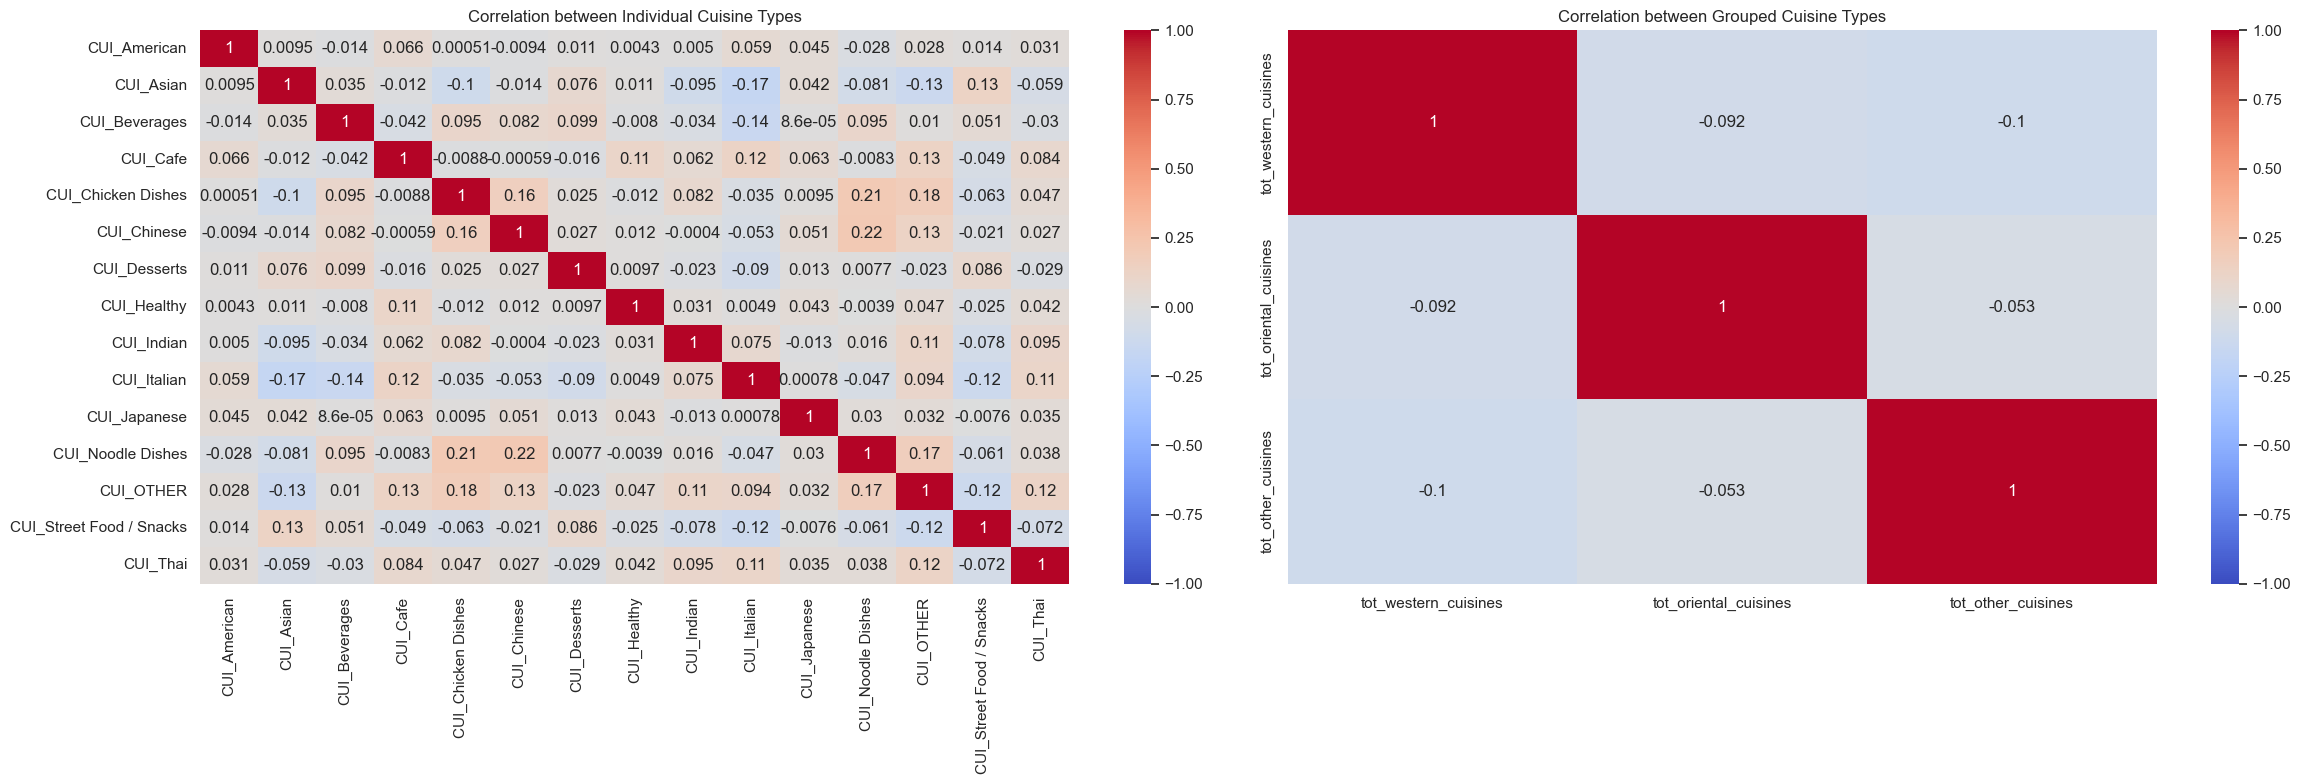

In [34]:
# Plot the correlation heatmaps for individual cuisine types and grouped cuisine types
plot_correlation_heatmaps(
     df,
     individual_columns=compute_total_cuisine(df),
     grouped_columns=['tot_western_cuisines', 'tot_oriental_cuisines', 'tot_other_cuisines'],
     individual_title="Correlation between Individual Cuisine Types",
     grouped_title="Correlation between Grouped Cuisine Types",
     figsize=(24, 8)
)

**Conclusions from the Heatmaps on Cuisine Groupings** (Spearman Correlation)

1. **Correlation between Individual Cuisine Types**:
- The first heatmap presents the correlation matrix for individual cuisine types.
- Most cuisine types show low correlations with each other, generally close to **0**, indicating that orders for these cuisines are largely independent.
- Certain pairs, such as **`CUI_Asian` and `CUI_Beverages`** or **`CUI_Chinese` and `CUI_Indian`**, exhibit slightly higher correlations (around **0.1 to 0.2**). However, these are still weak correlations, suggesting no strong relationships between specific individual cuisines.
- This low correlation supports the decision to group cuisines into broader categories, as it emphasizes the diversity in customer preferences across individual types without significant overlap.

2. **Correlation between Grouped Cuisine Types**:
- The second heatmap shows the correlation matrix for the grouped cuisine categories: **`tot_western_cuisines`**, **`tot_oriental_cuisines`**, and **`tot_other_cuisines`**.
- Correlations between these grouped categories remain low, ranging from **-0.092 to -0.1**, even when analyzed using Spearman's method. This suggests that orders within each grouped cuisine type are **largely independent** of the others.
- The low correlation among grouped categories reinforces the effectiveness of grouping cuisines into broader categories (Western, Oriental, Other). It confirms that these groups capture distinct customer preferences with minimal overlap.
- Additionally, the independence of these grouped categories implies that they represent separate customer segments or target markets, each characterized by unique dining preferences.

**Exploration of Non-Linear Correlations Between Cuisine Groups**

To investigate potential non-linear associations between the grouped cuisine categories (`tot_western_cuisines`, `tot_oriental_cuisines`, and `tot_other_cuisines`), additional analyses were conducted. Hexbin plots were generated, and alternative correlation coefficients were calculated. 

The results revealed extremely low correlations, with values around **0.1 or lower**, indicating no significant relationship, linear or non-linear, between these grouped cuisine types. 

These findings confirm the independence of customer preferences across the grouped categories, further supporting the effectiveness of this segmentation approach in capturing distinct behavioral patterns.

<a class="anchor" id="section_5_2_2_2">

#### 5.2.2.2 Heat Maps between Days of the Week and between Work and Leisure Days

</a>

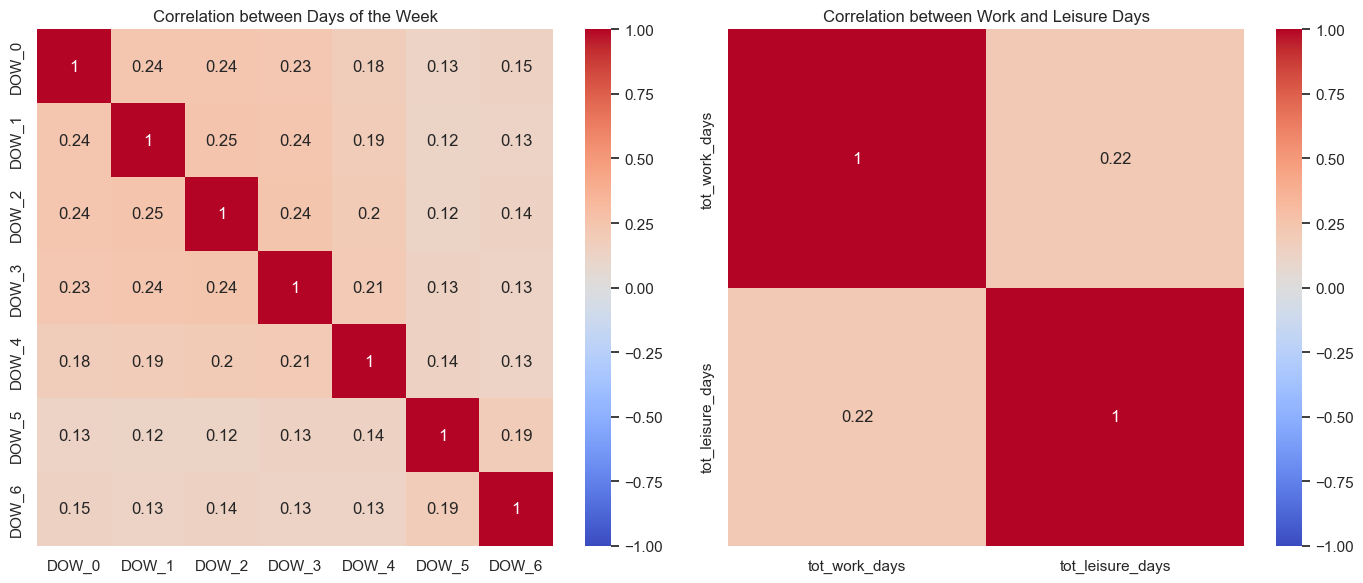

In [35]:
# Plot the correlation heatmaps for individual days of the week and the grouped days (workdays vs leisure days)
plot_correlation_heatmaps(
    df,
    individual_columns=compute_total_products_by_week(),
    grouped_columns=['tot_work_days', 'tot_leisure_days'],
    individual_title="Correlation between Days of the Week",
    grouped_title="Correlation between Work and Leisure Days",
    figsize=(14, 6)
)

**Conclusions from Heatmaps**

1. **Correlation between Days of the Week**
- The heatmap analyzing days of the week shows very low correlations between individual days, ranging from **0.13 to 0.25**.
- This indicates that ordering behavior is largely independent across the week, with minimal dependency between specific days.
- Including Friday in the leisure days created a clearer distinction between the "leisure" and "work" groups, further reducing correlations within each group and enhancing the segmentation.

2. **Correlation between Work and Leisure Days**
- The correlation between **`tot_work_days`** (workdays) and **`tot_leisure_days`** (leisure days) was approximately **0.22** when Friday was classified as a leisure day.
- This very low correlation suggests that work and leisure day groups are largely distinct in terms of ordering patterns, with minimal overlap or similarity in customer behavior across these two types of days.


**Exploration of Non-Linear Correlations Between Days of the Week and Day Types**

To investigate potential non-linear associations between the days of the week and the categorized day types (`tot_work_days` and `tot_leisure_days`), additional correlation methods were applied, including Spearman correlation and hexbin plot visualizations.

The results indicated very low correlations:
- Correlations between individual days of the week were **0.25 or lower**, highlighting minimal dependency across specific days.
- The correlation between **workdays (`tot_work_days`)** and **leisure days (`tot_leisure_days`)** was even weaker, at approximately **0.22**.

These findings suggest that there is no significant relationship, linear or monotonic, among specific days or between the work and leisure day groups. This lack of correlation confirms the independence of ordering patterns across different days, reinforcing that customer behavior is not strongly influenced by specific days of the week or by whether a day is classified as a workday or leisure day.


<a class="anchor" id="section_5_2_2_3">

#### 5.2.2.3 Heat Maps between Individual Hours and between Grouped Time Periods

</a>

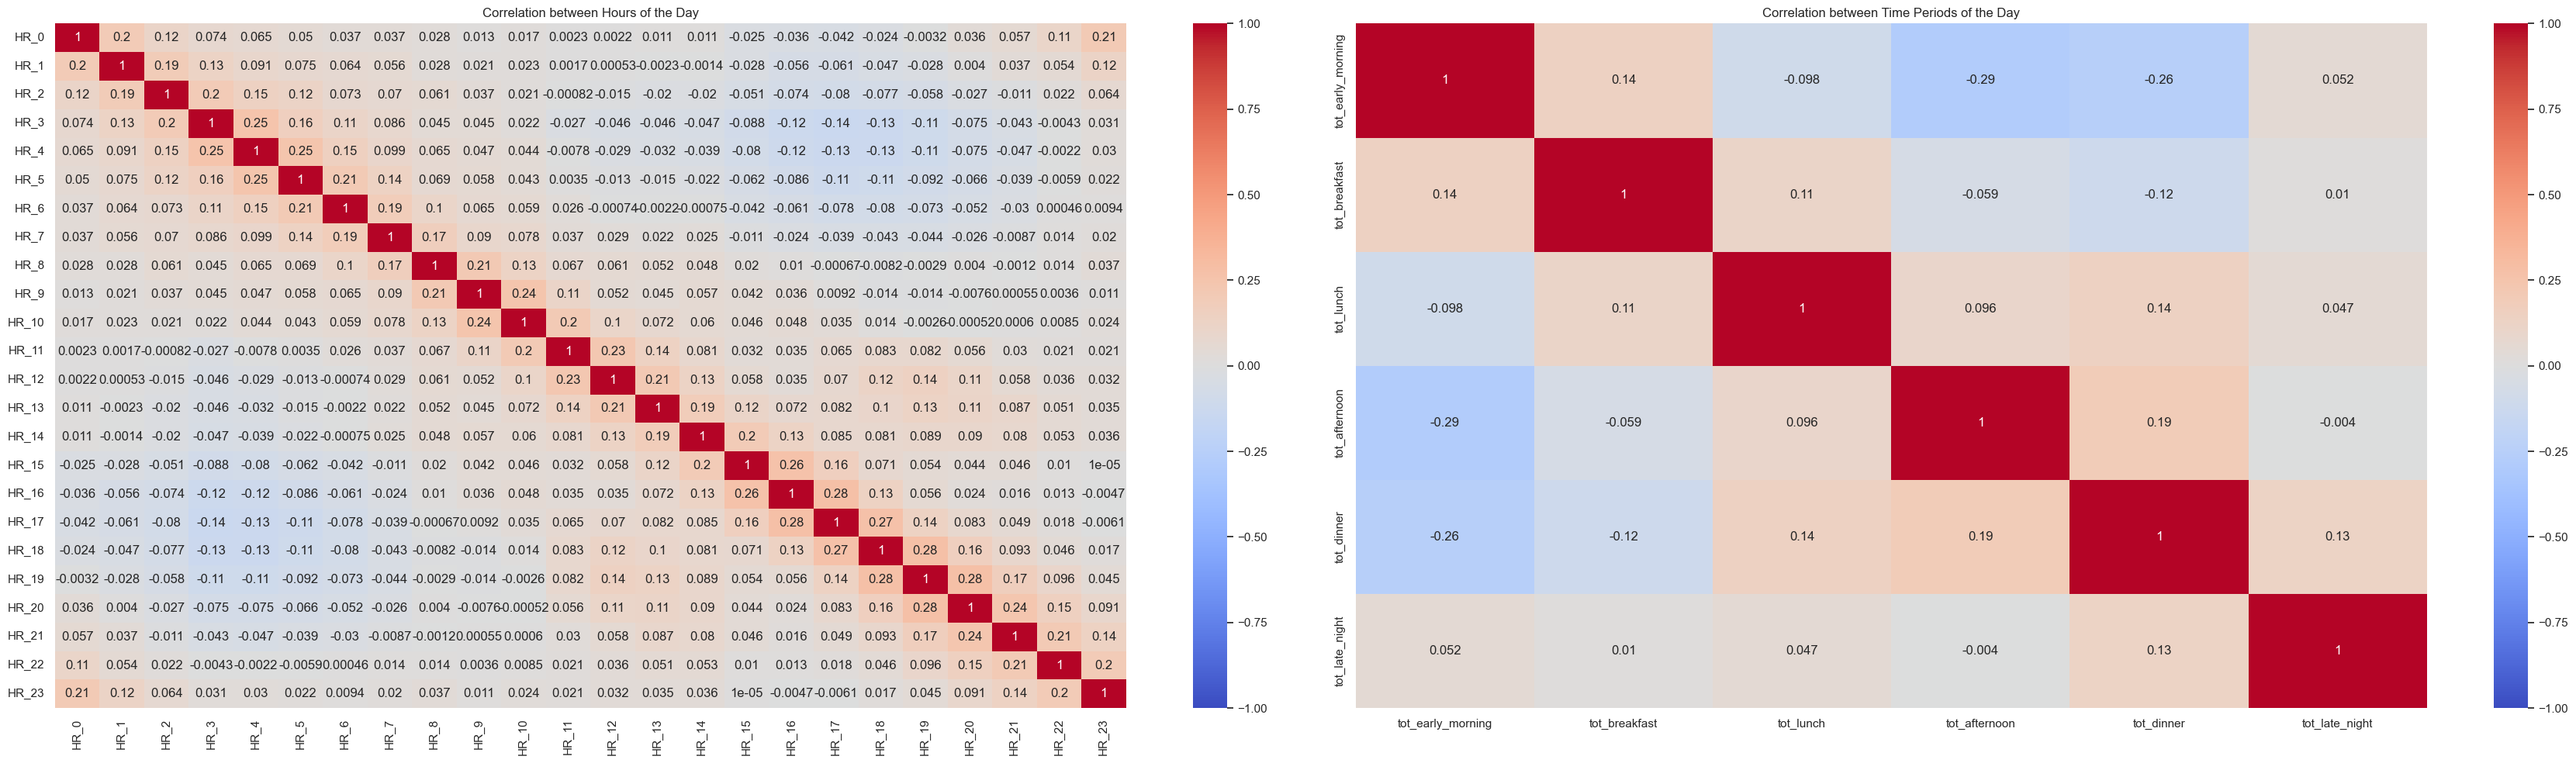

In [36]:
# Plot the correlation heatmaps for individual days of the week and the grouped days (workdays vs leisure days)
plot_correlation_heatmaps(
    df,
    individual_columns=compute_total_products_by_day(),
    grouped_columns=['tot_early_morning', 'tot_breakfast', 'tot_lunch', 'tot_afternoon', 'tot_dinner', 'tot_late_night'],
    individual_title="Correlation between Hours of the Day",
    grouped_title="Correlation between Time Periods of the Day",
    figsize=(35, 10)
)

**Conclusions from the Heatmaps on the Grouping of Time Periods**

1. **Correlation between Individual Hours:**
- The first heatmap presents the Spearman correlation between all hours of the day, showing mostly very low values, especially between hours that are further apart.
- This indicates minimal dependency between specific hours in terms of order frequency, suggesting that the popularity of orders in one hour does not significantly influence orders in preceding or following hours.
- Slightly higher correlations are observed between adjacent hours, such as **`HR_11` and `HR_12`** or **`HR_18` and `HR_19`**, which likely reflect transitional periods like lunch and dinner, where demand remains relatively stable over these meal-related time blocks.



2. **Correlation between Grouped Time Periods:**
- The second heatmap shows the Spearman correlation between grouped time periods: **early morning**, **breakfast**, **lunch**, **afternoon**, **dinner**, and **late night**.
- The **lunch** and **dinner** periods exhibit a mild positive correlation, aligning with expectations as these are peak meal times when customers tend to place more orders. This suggests a degree of consistency in customer behavior during these periods.
- Other periods, such as **breakfast** and **early morning**, show negligible correlations with the rest, indicating that these time blocks represent distinct ordering behaviors with little overlap in customer demand patterns.

**Note: `HR_0` Column in Correlation Analysis**

The `HR_0` column in the correlation heatmap shows zero correlation with all other hourly columns. This indicates that no orders were recorded during this hour across all observations. Notably, this behavior reflects the absence of customer activity during this period (midnight to 1 AM) rather than missing or unrecorded data.

To verify that all values in `HR_0` are indeed zero, the following validation was conducted:

In [37]:
# Check if all values in HR_0 are zero
is_hr_0_all_zero = (df['HR_0'] == 0).all()

# Output the result
print(f"Is HR_0 entirely zero? {is_hr_0_all_zero}")

Is HR_0 entirely zero? False


This validation confirms that `HR_0` consistently contains only zero values. As a result, no imputation or correction is required. This behavior aligns with typical customer ordering patterns, where orders are rarely placed during this time period (midnight to 1 AM).

**Exploration of Non-Linear Correlations Between Time Periods of the Day**

To examine potential non-linear associations between grouped time periods, additional correlation methods were applied. Visual tools, such as hexbin plots, were used to analyze the relationships between these time groups.

The results revealed very low correlations, with values ranging between **0.1 and 0.2** at most. These findings indicate that there is no significant relationship—linear or non-linear—between the grouped time periods. 

This confirms that customer ordering behavior is largely independent across different times of the day. Each time period captures distinct ordering patterns with minimal overlap, reinforcing the validity of these groupings for analyzing unique customer behaviors.


<a class="anchor" id="section_5_1_3">

### 5.2.3 Analysis of Demand Patterns Across Cuisine Groups, Day Types, and Time Periods

</a>

<a class="anchor" id="section_5_2_3_1">

#### 5.2.3.1 Analysis of Bar Plots: Cuisine Group Popularity by Time of Day

</a>

In [38]:
period_trend_by_time = calculate_period_trend_by_time(df) # Creates a DataFrame showing the total orders for each cuisine group across different time periods
period_trend_by_cuisine = calculate_period_trend_by_cuisine(df) # Creates a DataFrame showing the total orders for each time period across different cuisine groups

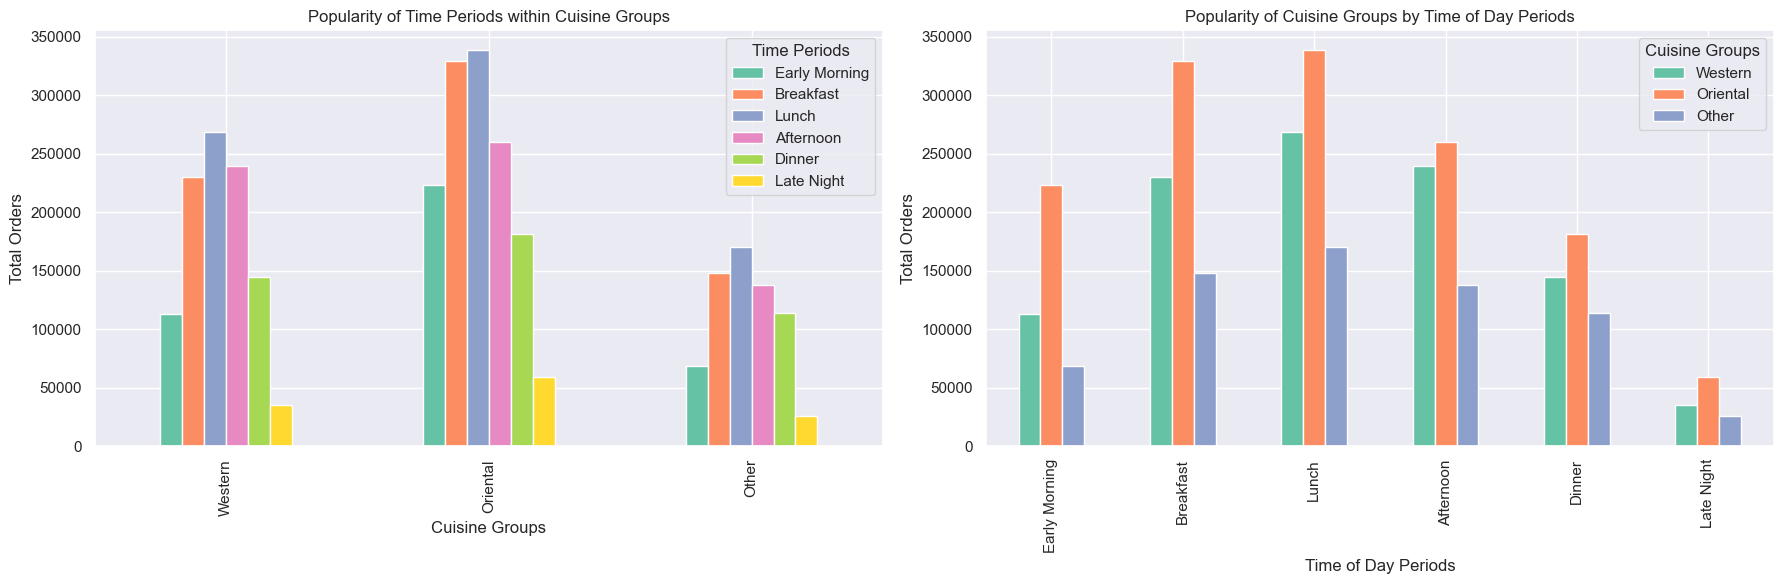

In [39]:
# Plot the barplot with the relationships
plot_side_by_side_barcharts(
    period_trend_by_time,
    period_trend_by_cuisine,
    title1="Popularity of Time Periods within Cuisine Groups",
    title2="Popularity of Cuisine Groups by Time of Day Periods",
    xlabel1="Cuisine Groups",
    xlabel2="Time of Day Periods",
    ylabel1="Total Orders",
    ylabel2="Total Orders",
    legend_title1="Time Periods",
    legend_title2="Cuisine Groups",
    figsize=(18, 6),
    color_palette="Set2"
)

**Observations from the First Plot (Popularity of Time Periods within Cuisine Groups)**

1. **Western Cuisine**:
   - Demand for Western cuisine peaks during **lunch**, followed closely by **breakfast** and **dinner**.
   - There is a noticeable drop in orders during **early morning** and **late night**, indicating lower popularity during off-peak hours.

2. **Oriental Cuisine**:
   - Oriental cuisine is most popular during **lunch**, followed by **breakfast** and **afternoon** periods.
   - Unlike Western cuisine, Oriental dishes maintain relatively consistent demand across various periods, with only a modest decline during **late night**.

3. **Other Cuisine**:
   - "Other" cuisines see generally lower demand across all time periods, with **lunch** being the most popular.
   - This group follows a pattern similar to Western cuisine, with significant declines in orders during **early morning** and **late night** periods.

<br>**Observations from the Second Plot (Popularity of Cuisine Groups by Time of Day Periods)**

1. **Breakfast and Lunch Peaks**:
   - Both Western and Oriental cuisines experience strong peaks in demand during **breakfast** and **lunch**, highlighting these as the primary times of customer activity.
   - Oriental cuisine consistently outperforms Western cuisine across most periods, particularly during **lunch**.

2. **Distinct Patterns in Demand**:
   - Western and Oriental cuisines maintain steady order volumes during key meal times, while "Other" cuisines see significantly lower demand across all periods.
   - **Late night orders** are minimal across all cuisine groups, reflecting typical dining behaviors.

3. **General Trends**:
   - Oriental cuisine emerges as the most popular overall, with strong customer preference across most periods.
   - The distribution of orders aligns with standard eating habits, with peaks during **breakfast**, **lunch**, and **dinner**, and minimal activity during **early morning** and **late night**.

<br>**Summary**

Customer preferences indicate that Oriental cuisine enjoys consistent popularity, making it a staple choice for many customers. In contrast, "Other" cuisines appear to cater to more specific tastes or niche occasions, reflecting a narrower audience.

When it comes to meal time dynamics, primary meal times (breakfast, lunch, and dinner) dominate order volumes across all cuisine groups, underscoring their importance as the main drivers of customer activity. Meanwhile, early morning and late night consistently remain low-demand periods across all cuisine categories, aligning with expected patterns in customer behavior.


<a class="anchor" id="section_5_2_3_2">

#### 5.2.3.2 Analysis of Bar Plots: Popularity of Work and Leisure Days by Cuisine Groups

</a>

In [40]:
work_leisure_trend_by_daytype = calculate_work_leisure_trend_by_daytype(df) # Creates a DataFrame showing total orders on work and leisure days by cuisine groups
work_leisure_trend_by_cuisine = calculate_work_leisure_trend_by_cuisine(df) # Creates a DataFrame showing total orders on work and leisure days by day types

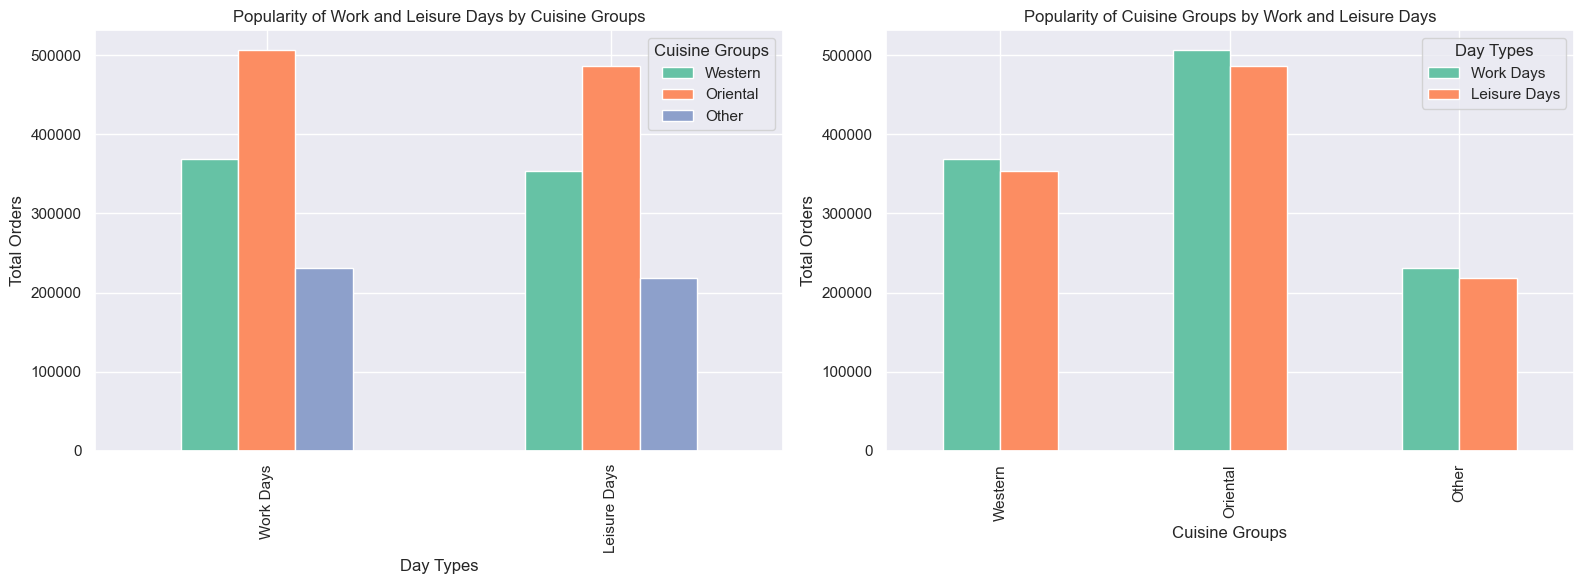

In [41]:
# Plot the barplot with the relationships
plot_side_by_side_barcharts(
    df1=work_leisure_trend_by_daytype,  # First DataFrame
    df2=work_leisure_trend_by_cuisine,  # Second DataFrame
    title1="Popularity of Work and Leisure Days by Cuisine Groups",
    title2="Popularity of Cuisine Groups by Work and Leisure Days",
    xlabel1="Day Types",
    xlabel2="Cuisine Groups",
    ylabel1="Total Orders",
    ylabel2="Total Orders",
    legend_title1="Cuisine Groups",
    legend_title2="Day Types",
    figsize=(16, 6),  # Figure size
    color_palette="Set2"  # Color palette
)

**Observations from the First Plot (Popularity of Work and Leisure Days by Cuisine Groups)**

1. **General Trends**:
  - Across all three cuisine groups (**Western**, **Oriental**, and **Other**), the number of orders is slightly higher on **work days** compared to **leisure days**.
  - This difference is consistent across all cuisine types, indicating that the decrease in orders from work days to leisure days is proportional. Customers do not show a significant preference for any particular cuisine type on work days versus leisure days.

2. **Oriental Cuisine**:
  - Oriental cuisine remains the most popular choice on both work and leisure days, reinforcing its status as a favorite among customers regardless of day type.
  - The small decline in orders from work days to leisure days mirrors the trend observed in Western and Other cuisines, suggesting that Oriental cuisine is a consistently preferred option across all contexts.

<br>**Observations from the Second Plot (Popularity of Cuisine Groups by Work and Leisure Days)**

1. **Work Days vs. Leisure Days**:
  - Oriental cuisine consistently receives the highest number of orders on both work and leisure days, followed by Western cuisine, with the Other category receiving the fewest orders. This indicates a stable preference hierarchy that persists regardless of day type.

2. **Proportional Decrease**:
  - The reduction in orders from work days to leisure days is proportional across all cuisine groups. This suggests that customers do not significantly shift their cuisine preferences between these day types. Instead, the overall decrease in orders on leisure days reflects a general reduction in order frequency, while the preference structure among cuisine groups remains consistent.

<br>**Summary**

Customer activity patterns reveal that work days consistently have higher order volumes compared to leisure days, with peak activity observed during Lunch and Dinner. These two time periods dominate customer preferences, making them critical focal points for improving business performance.

<a class="anchor" id="section_5_2_3_3">

#### 5.2.3.3 Analysis of Time Period Demand on Work and Leisure Days

</a>

In [42]:
period_trend_work_leisure_by_day_type = calculate_period_trend_by_day_type(df) # Creates a DataFrame that calculates the total orders for each time period on work and leisure days, using Day Types as columns
period_trend_work_leisure_by_time_period = calculate_period_trend_by_time_period(df) # Creates a DataFrame that calculates the total orders for each time period on work and leisure days, using Time Periods as columns

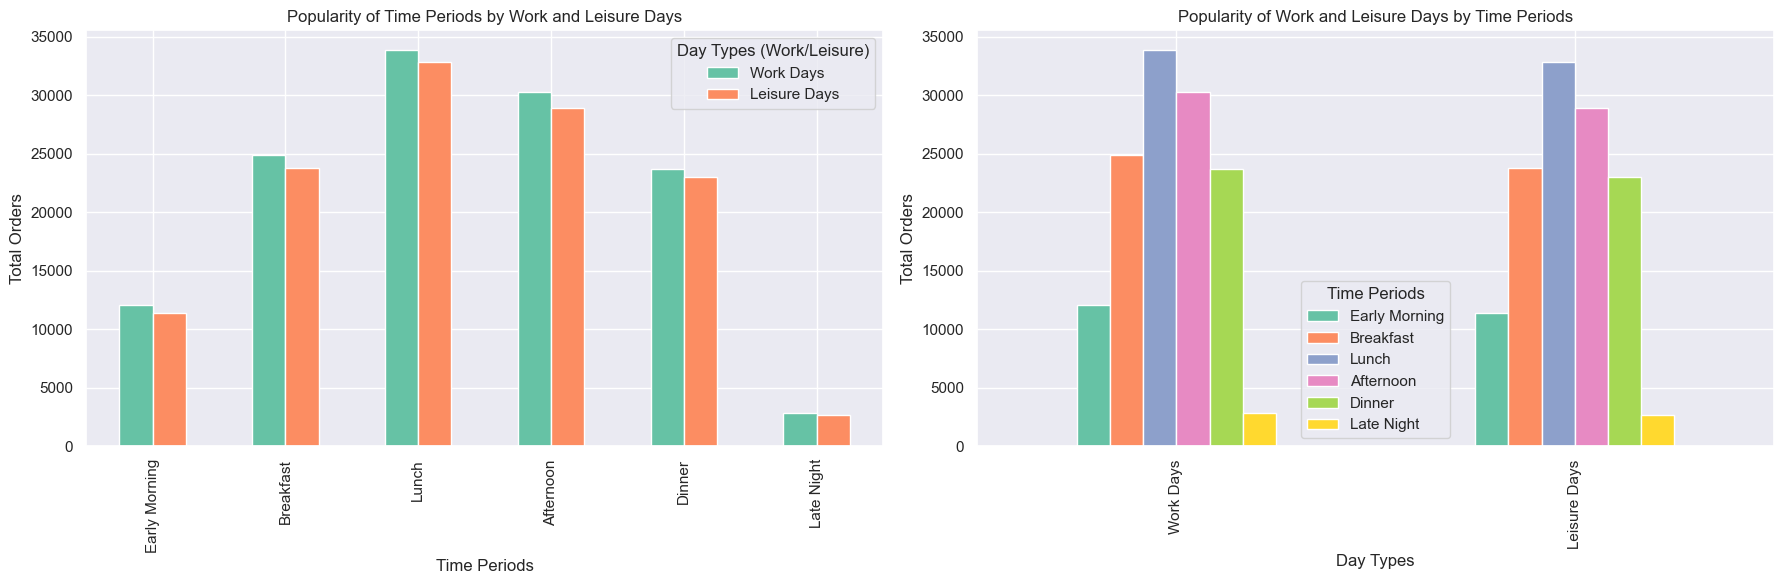

In [43]:
# Plot the barplot with the relationships
plot_side_by_side_barcharts(
    df1=period_trend_work_leisure_by_day_type,  # First DataFrame
    df2=period_trend_work_leisure_by_time_period,  # Second DataFrame
    title1="Popularity of Time Periods by Work and Leisure Days",
    title2="Popularity of Work and Leisure Days by Time Periods",
    xlabel1="Time Periods",
    xlabel2="Day Types",
    ylabel1="Total Orders",
    ylabel2="Total Orders",
    legend_title1="Day Types (Work/Leisure)",
    legend_title2="Time Periods",
    figsize=(18, 6),  # Figure size
    color_palette="Set2"  # Color palette
)

**Observations from the First Plot (Total Orders by Time Periods on Work and Leisure Days)**

1. **Comparison Across Time Periods**:
  - The bar plot displays total orders for each time period across **work** and **leisure days**, with time periods represented on the x-axis. Key observations include:
    - **Lunch** and **Afternoon** have the highest order volumes for both work and leisure days, highlighting these as peak periods for customer activity. Lunch sees slightly higher demand on work days compared to leisure days.
    - **Dinner** and **Breakfast** exhibit nearly identical order volumes across work and leisure days, suggesting consistent customer interest in these periods regardless of the day type.
    - **Early Morning** and **Late Night** have the lowest order volumes across both day types, reflecting minimal demand during these off-peak hours. **Late Night**, in particular, shows a consistent pattern between work and leisure days.

<br>**Observations from the First Plot (Time Periods by Work and Leisure Days)**

1. **Comparison Across Work and Leisure Days**:
  - In this bar plot, **work** and **leisure days** are on the x-axis, with time periods represented as categories within each day type. Key findings include:
    - **Lunch** and **Afternoon** remain the most popular time periods for both work and leisure days, confirming these as peak order times. Lunch shows slightly higher demand on work days, but both time periods maintain consistently high volumes.
    - **Dinner** and **Breakfast** again display similar order volumes across both day types, reinforcing the balanced demand pattern observed in the left plot.
    - **Early Morning** and **Late Night** continue to show the lowest order volumes, indicating limited customer activity during these times for both work and leisure days.

<br>**Summary**

These observations confirm that **Lunch** and **Afternoon** are the primary drivers of customer orders, with consistently high demand across work and leisure days. In contrast, **Early Morning** and **Late Night** remain off-peak periods with minimal activity. **Dinner** and **Breakfast** exhibit steady, balanced demand, making them secondary but reliable periods for customer engagement.

<div class="alert alert-block alert-success">
<a class="anchor" id="section_6">

# 6. Visual Exploration

</a>

[Back to ToC](#toc)

</div>

In [44]:
# Define metric and non-metric features.
metric_features = df.select_dtypes(include=['number']).columns.to_list()
non_metric_features = df.columns.drop(metric_features).to_list()

<a class="anchor" id="section_6_1">

## 6.1 Numeric Variables - Univariate Analysis

</a>

[Back to 6. Visual Exploration](#section_6)

In [45]:
# List all the type of food columns
cuisine_cols = compute_total_cuisine(df)

# List all variables referring to the hours of the day
hr_cols = compute_total_products_by_day()

# List all variables referring to the days of the week
dow_cols = compute_total_products_by_week()

# Create a list with the other numerical variables
others_cols= [item for item in metric_features if item not in cuisine_cols + hr_cols + dow_cols]

# Create a new list with all numeric variables divided by the lists created above
metric_features_sep=[others_cols,cuisine_cols,hr_cols,dow_cols]

<a class="anchor" id="section_6_1_1">

### 6.1.1 Histograms

</a>

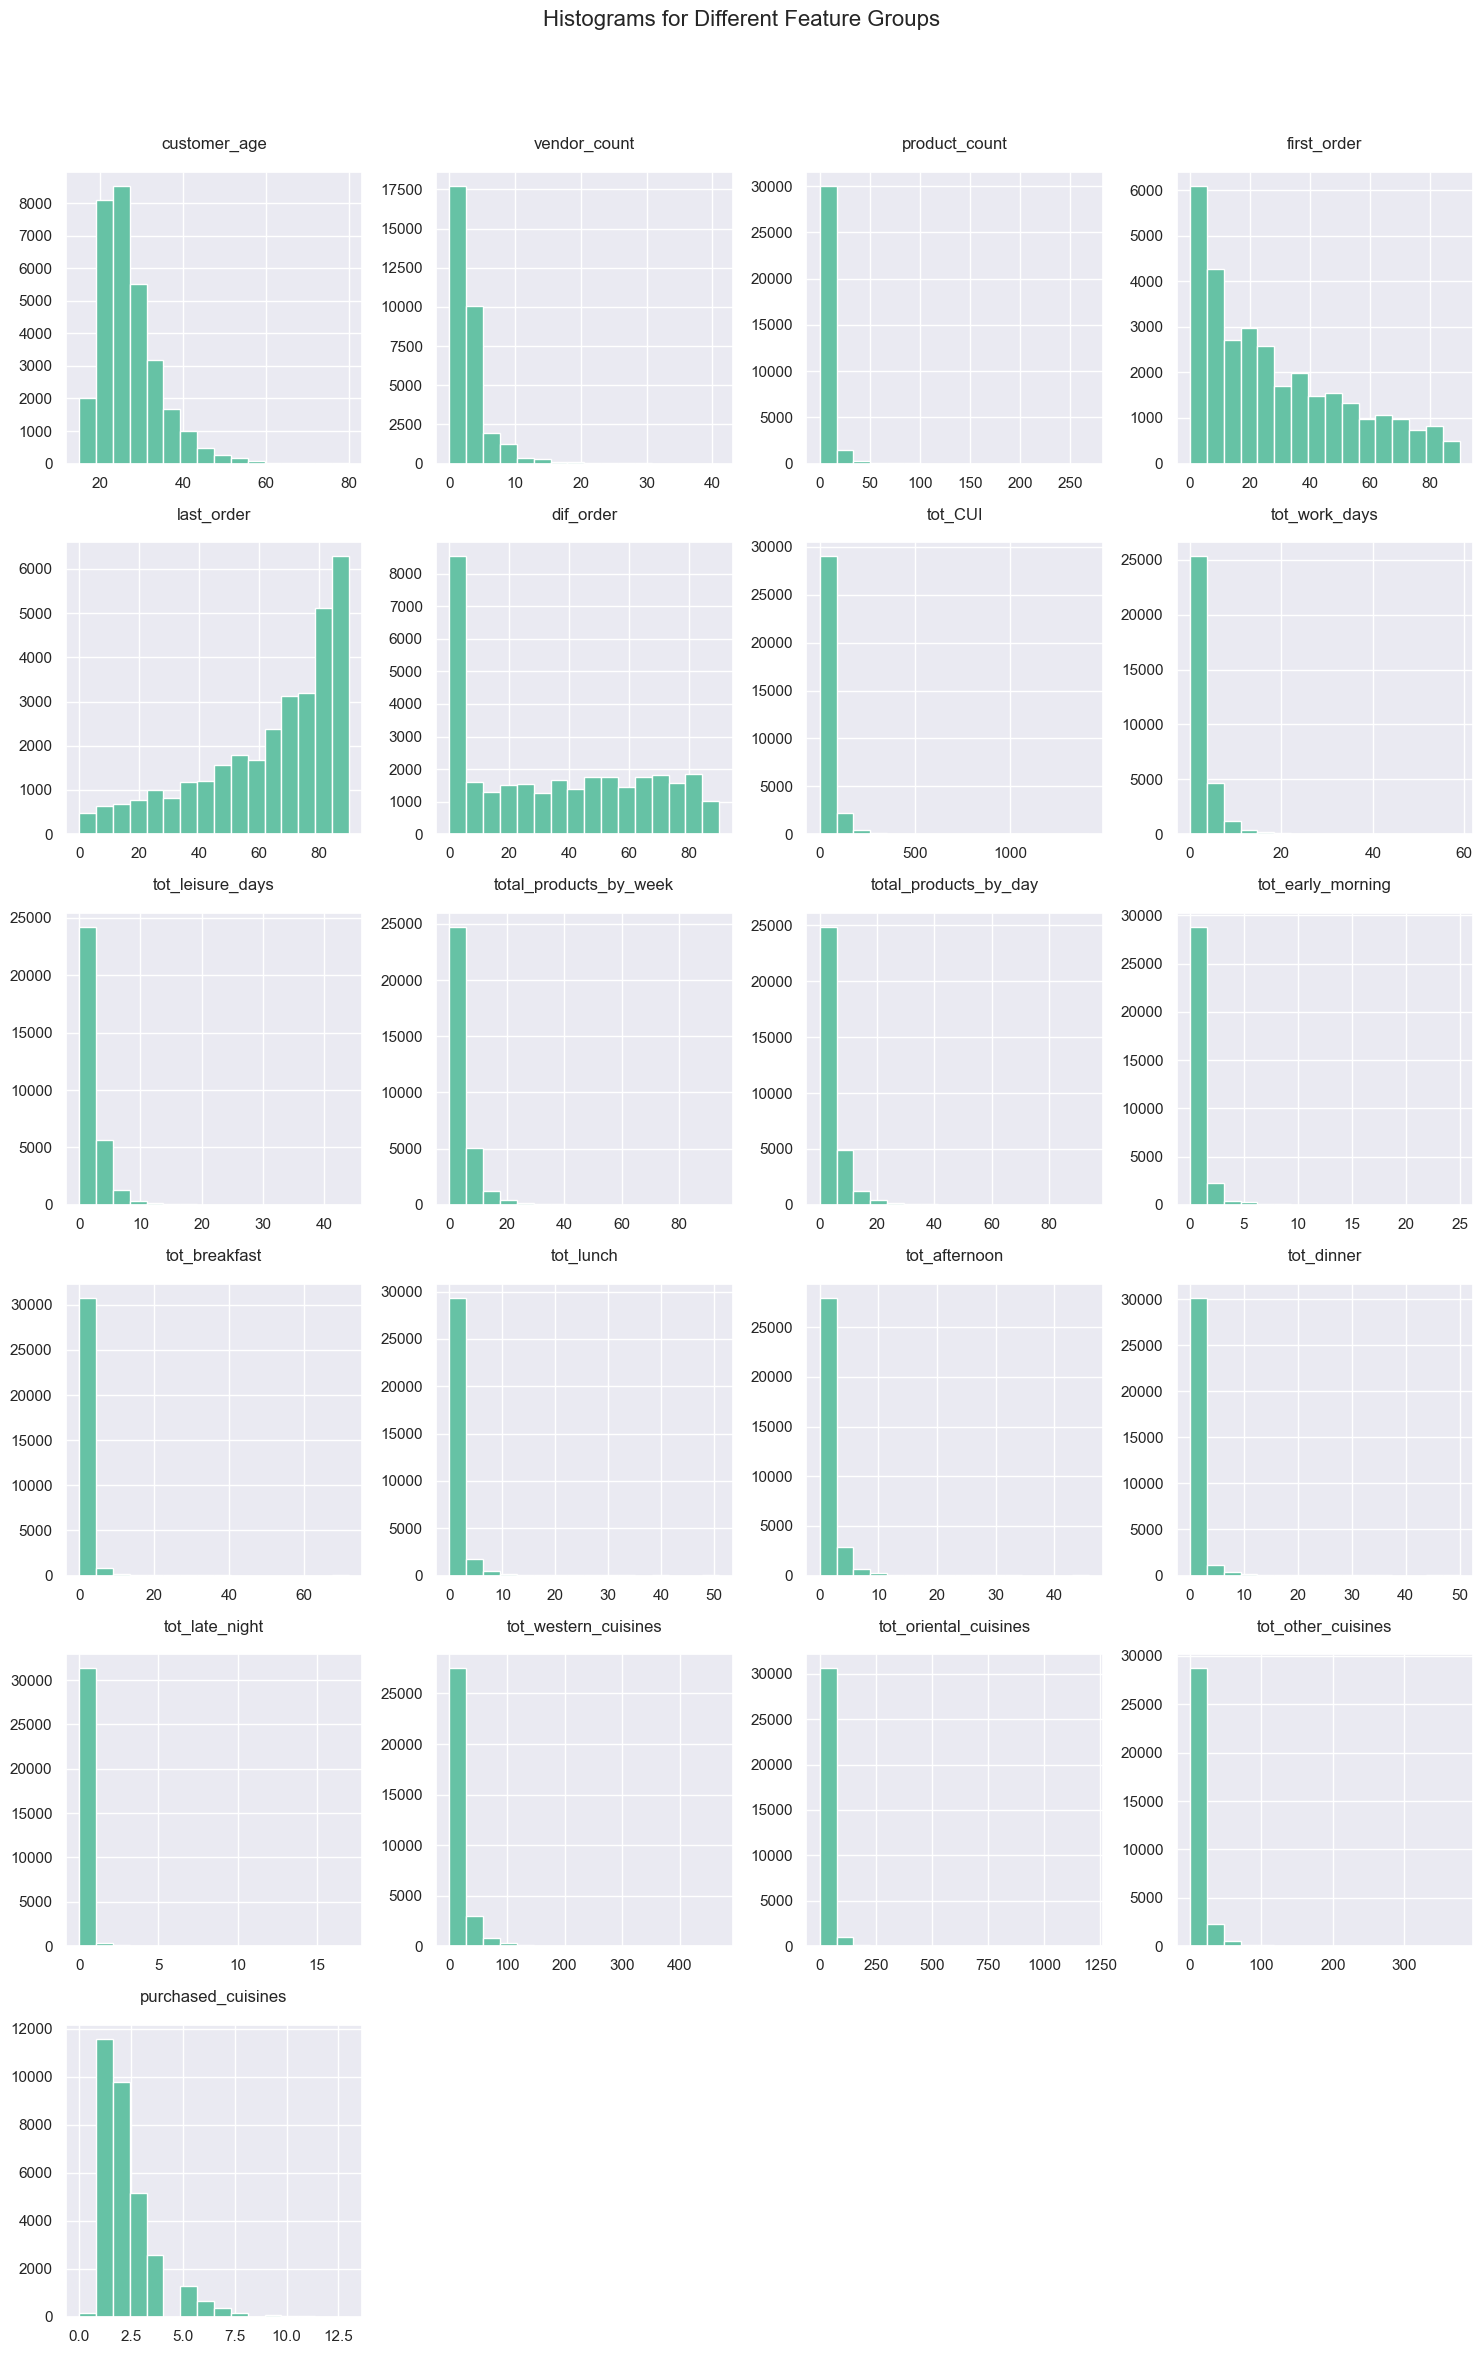

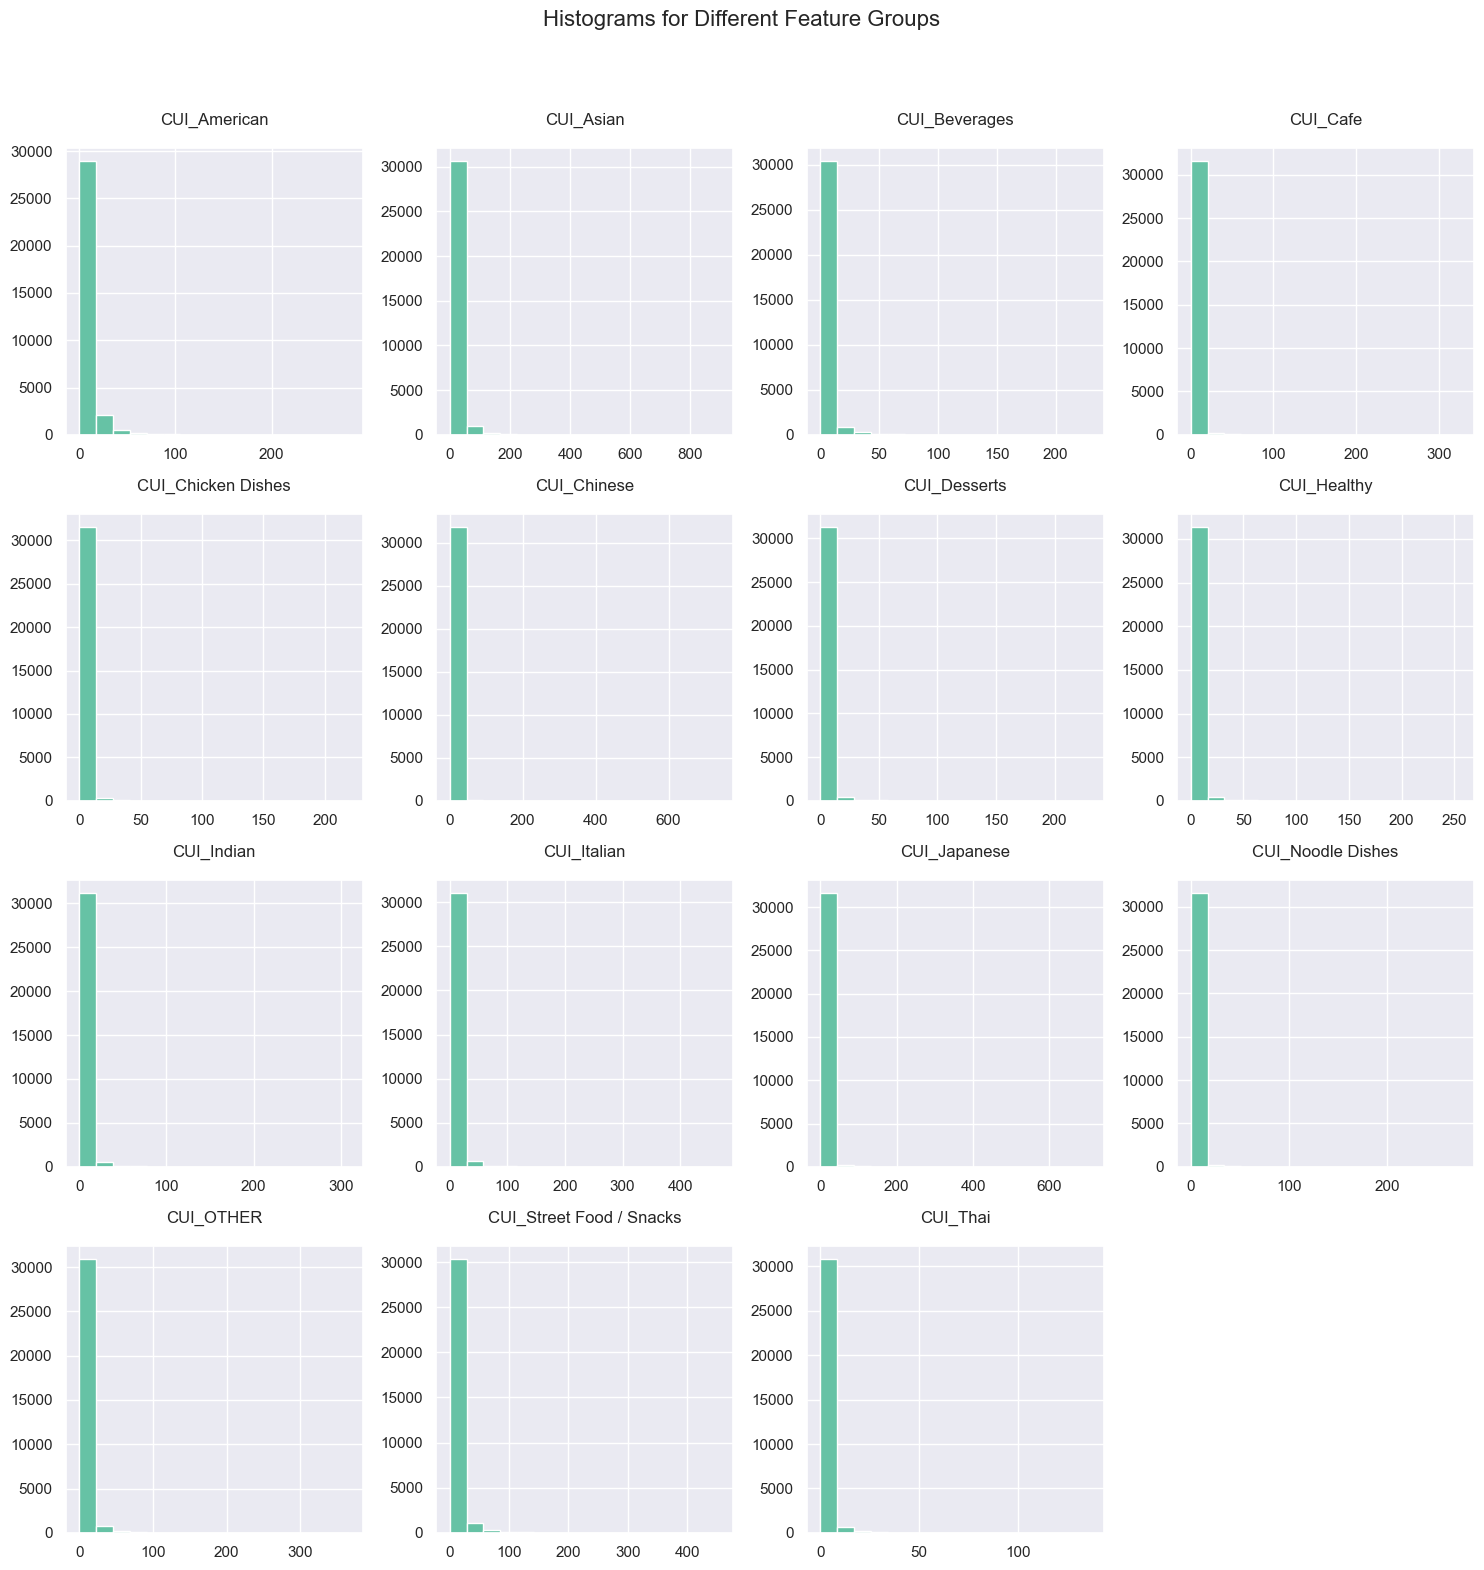

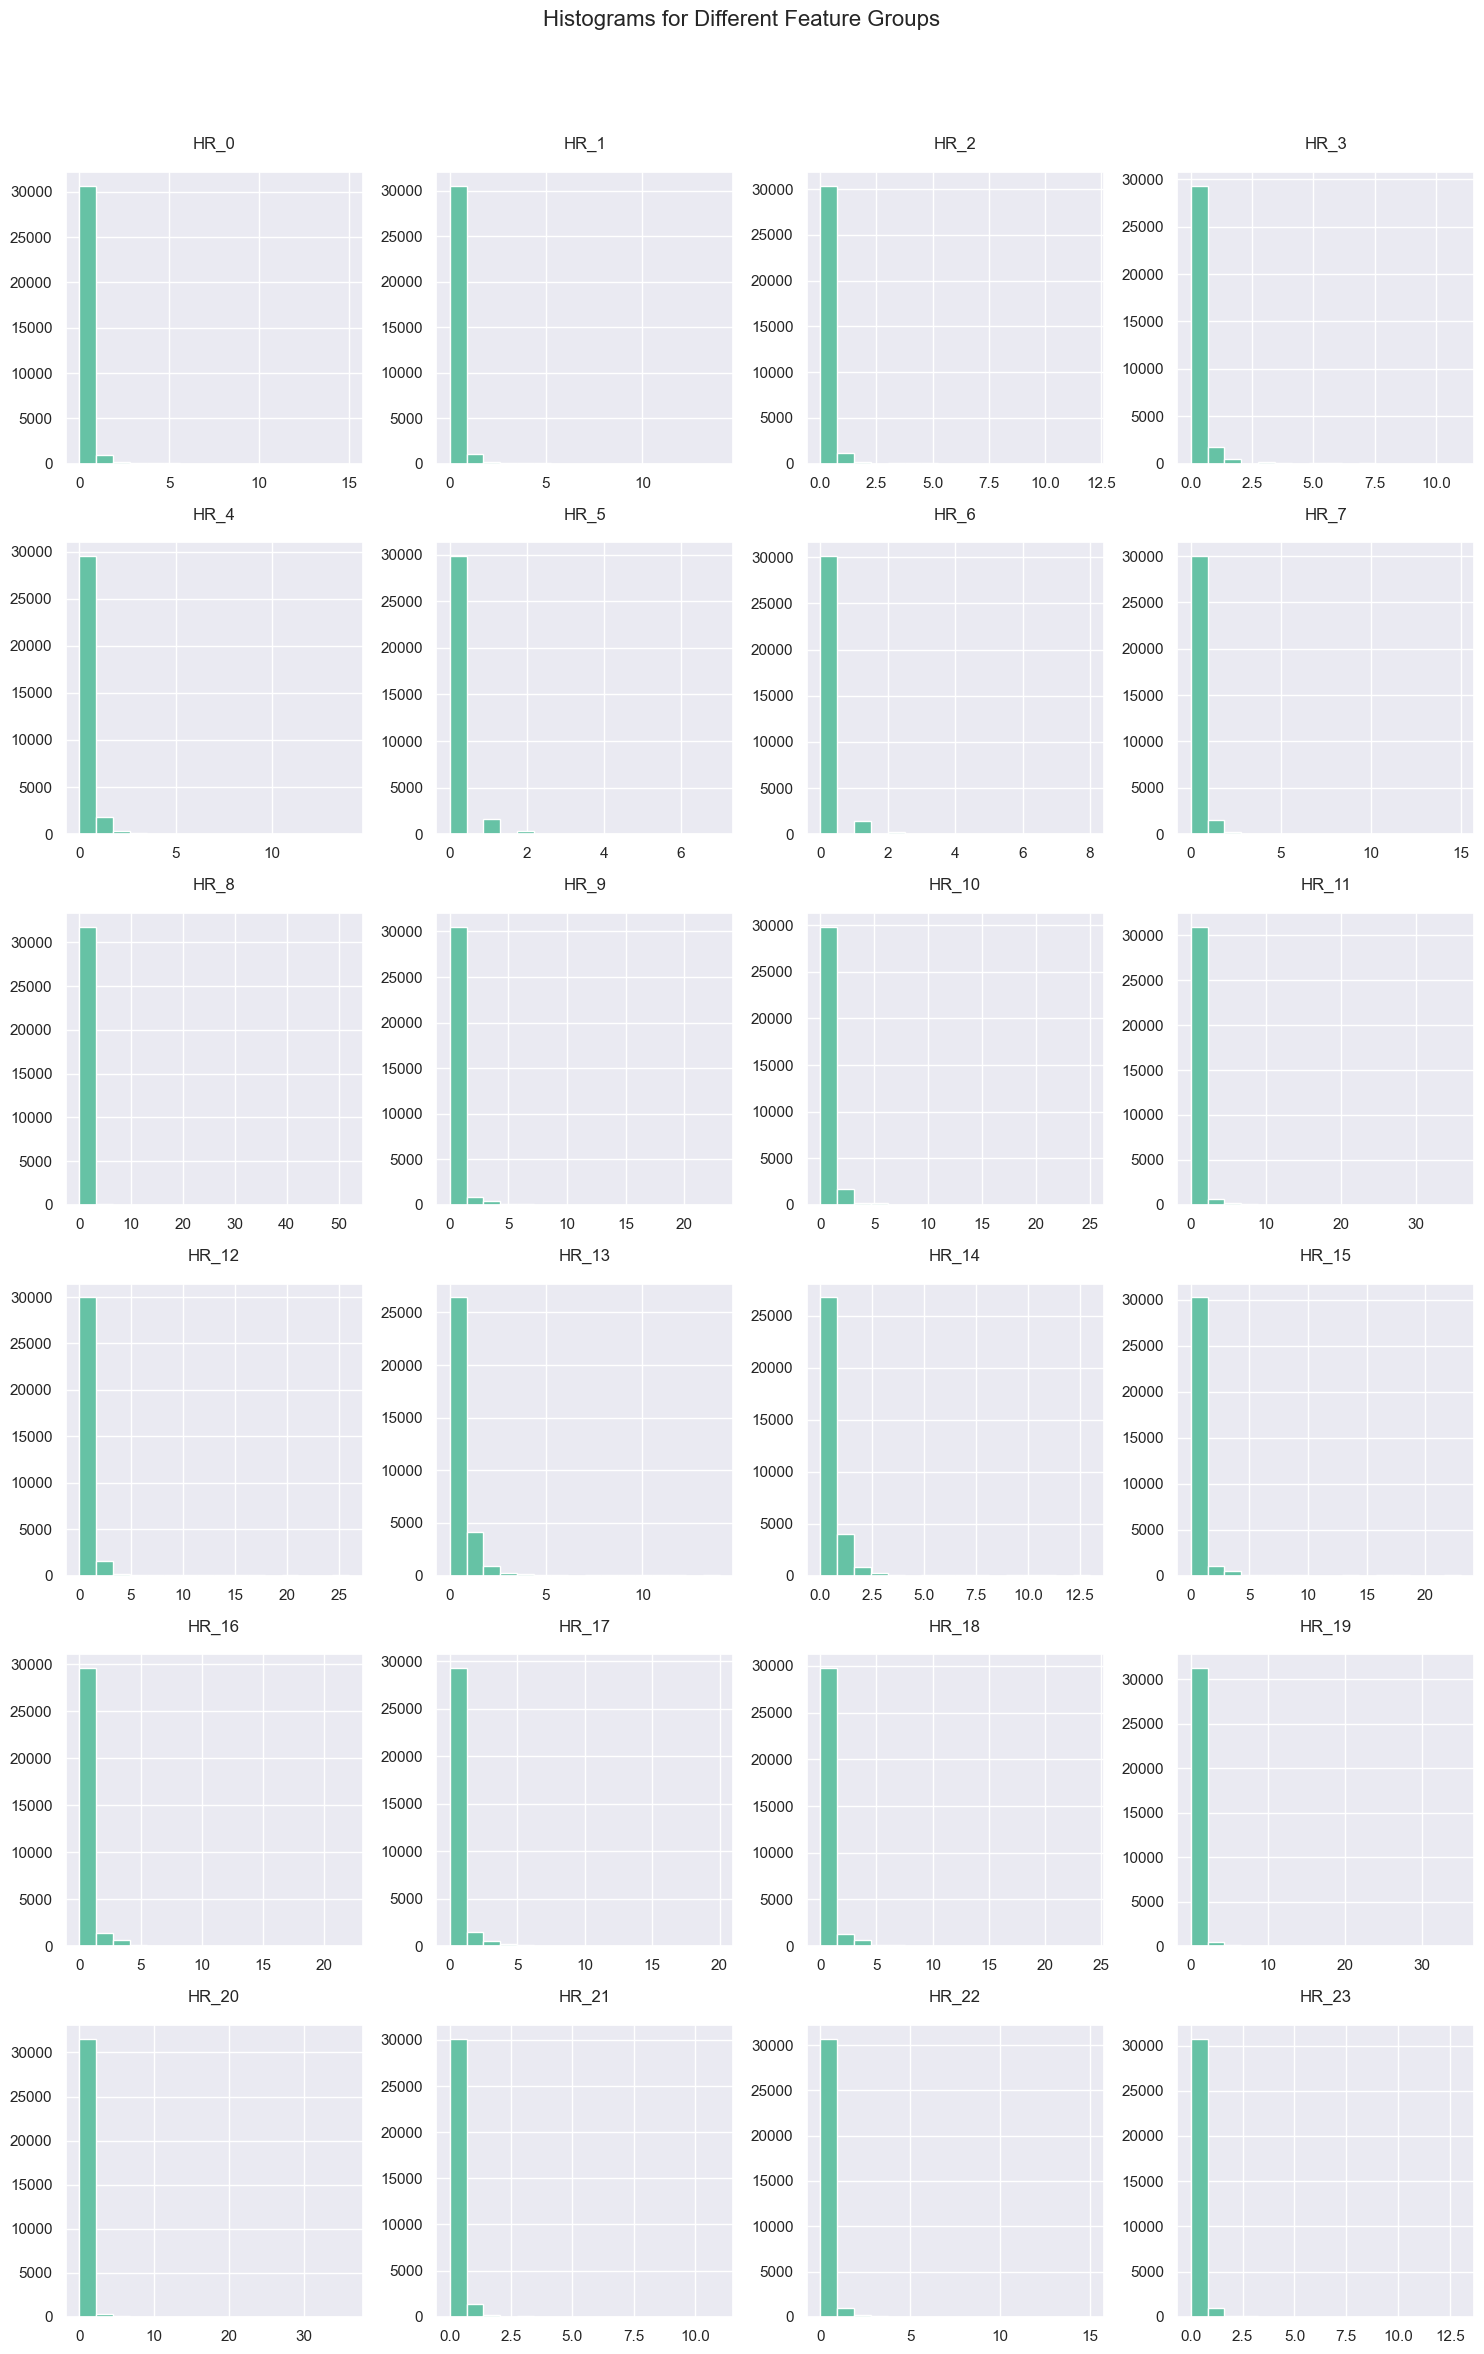

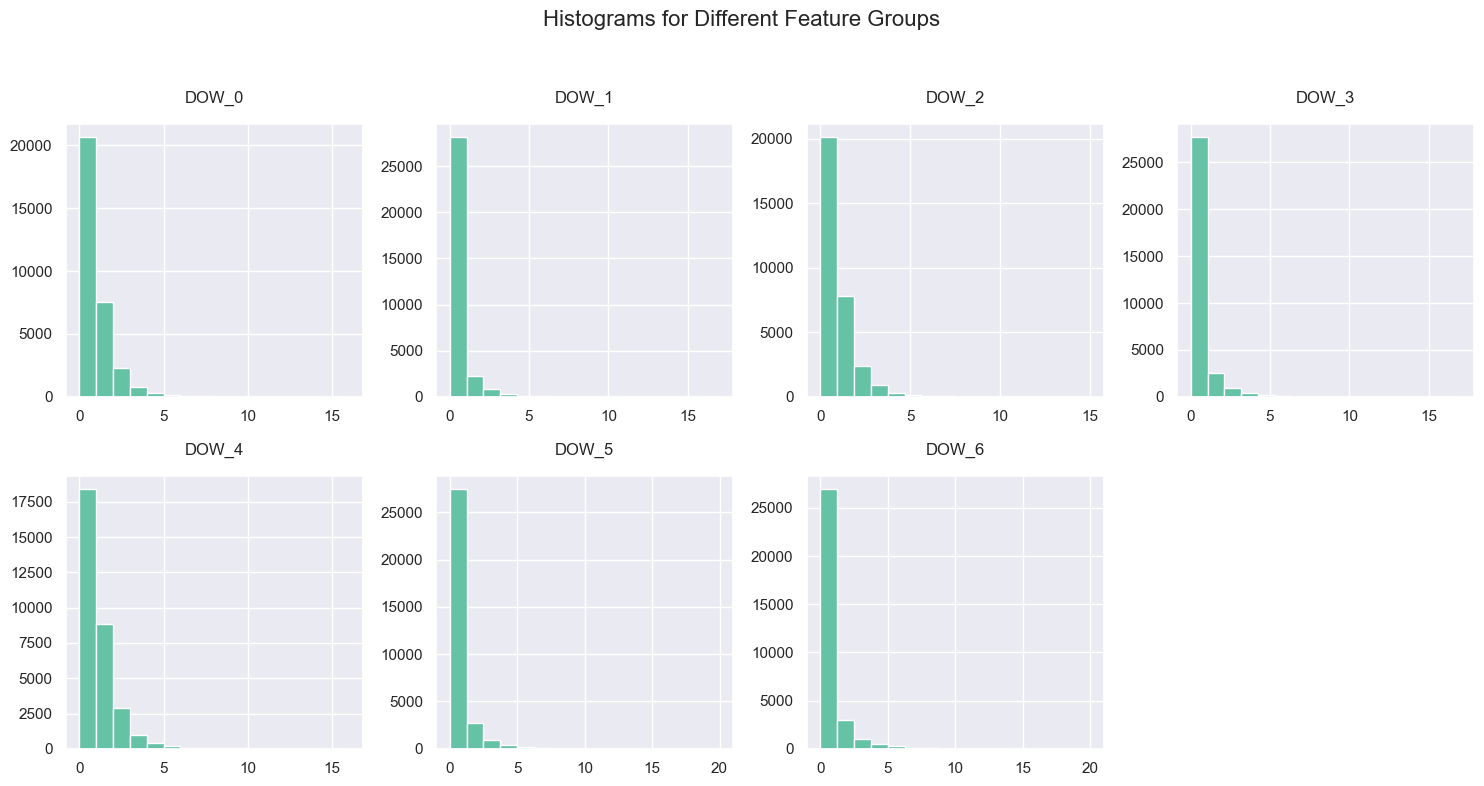

In [46]:
metric_features_histogram(df, metric_features_sep, title="Histograms for Different Feature Groups", color="#66c2a5", use_log=False)

**Conclusions From Histogram Analysis**

- **`customer_age`**: The distribution of customer age is right-skewed, with most values concentrated between 20 and 40 years. This asymmetric pattern suggests it may resemble a Weibull or exponential distribution, which aligns with typical consumer age distributions.

- **`vendor_count`**: This variable shows strong right-skewness, with the majority of values concentrated at the lower end of the range. Given its discrete nature and the decreasing trend as the number of vendors increases, it is likely following a Poisson distribution, where most customers interact with a small number of vendors.

- **`product_count`**: Although the scale makes visual interpretation challenging, the data appears to concentrate below 50, indicating that most values fall within this range. The typical customer do small orders.

- **`first_order`**: The distribution shows a clear concentration on the left, with a right tail, suggesting that most customers placed their first orders early in the dataset timeline.

- **`last_order`**: This variable increases as days progress, indicating that many customers placed their most recent orders toward the end of the data collection period.

- **`dif_order`**: The **`dif_order`** variable measures the time difference (in days) between a customer's first and last orders. A large concentration of values at **0**, indicating that many customers placed only a single order during the data collection period (their first order was also their last order). This highlights a significant portion of one-time buyers, pointing to opportunities for improving **customer retention strategies**. Beyond the 0 values, the remaining data is distributed relatively uniformly between **1 and 80 days**, with noticeable peaks at specific intervals. These peaks may reflect **periodic customer behaviors** or **seasonal shopping patterns**.

- **`tot_work_days`**, **`tot_leisure_days`**, **`total_products_by_week`**, and **`total_products_by_day`**: These variables share similar distribution patterns. Values are concentrated within specific ranges, indicating consistent customer behavior across **workdays**, **leisure days**, and in **weekly** and **daily contexts**

- For most of the other graphs, observations are limited due to issues with scale, making detailed interpretations difficult.

To facilitate the interpretation of the underlying distribution, the identification of trends and patterns of behavior, we resort to the logarithmic scale.

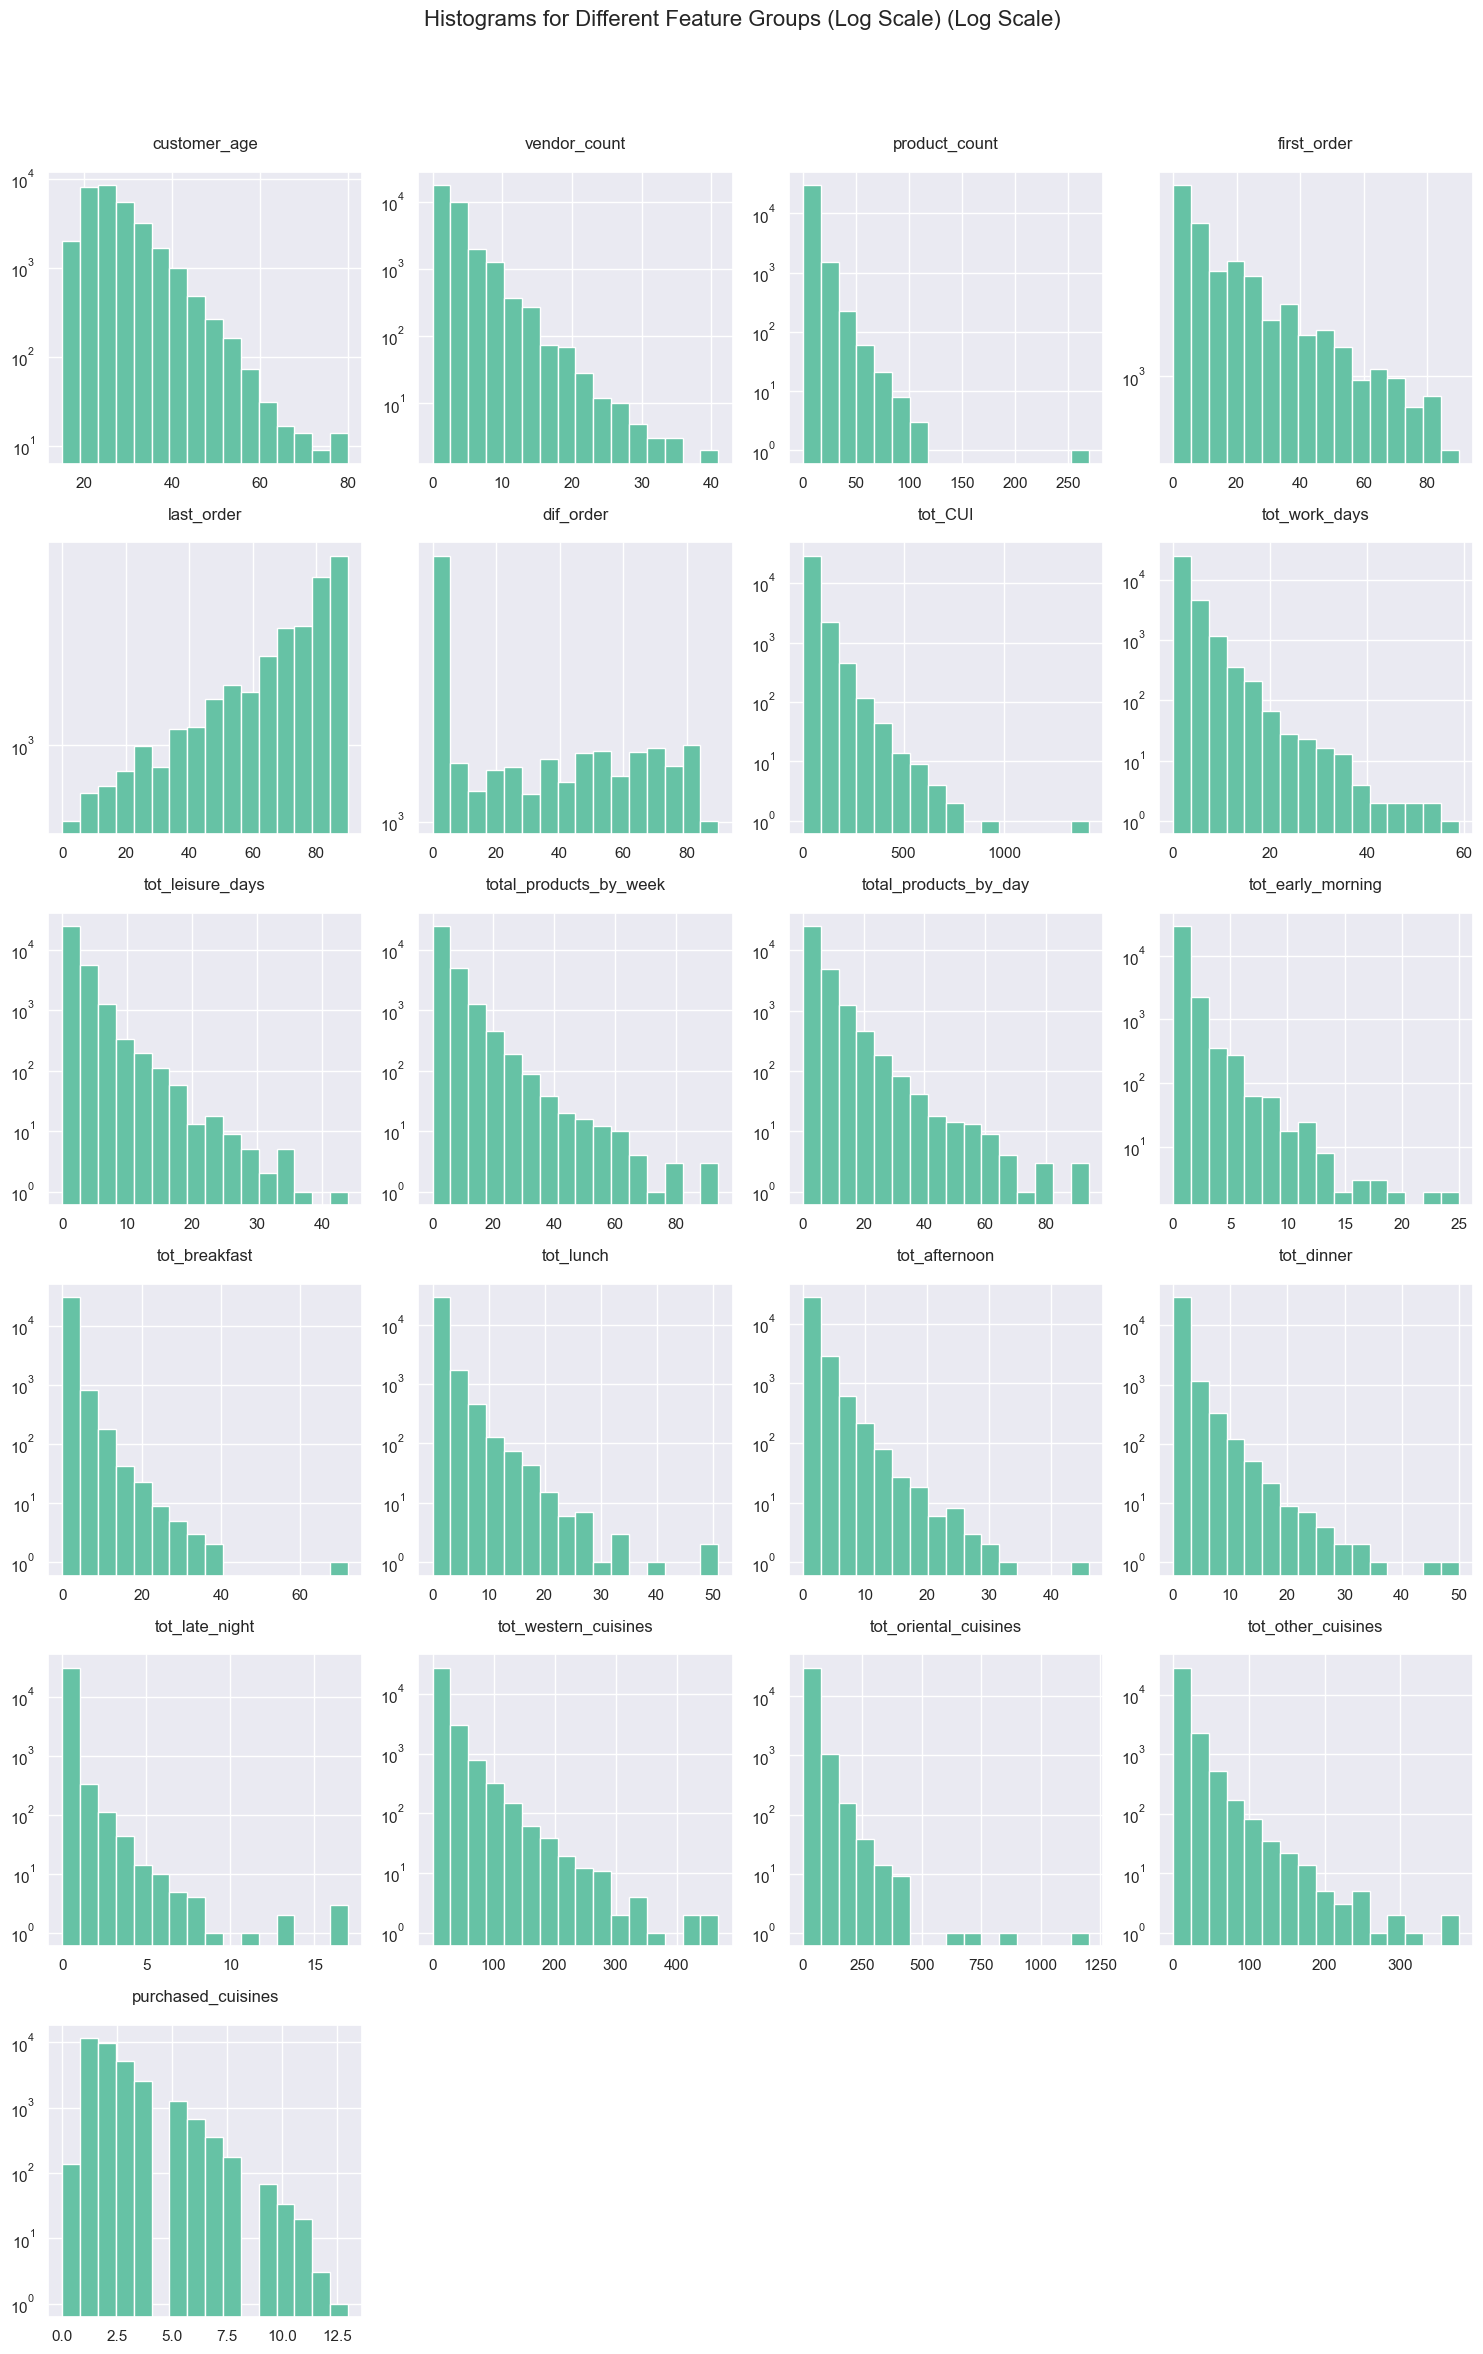

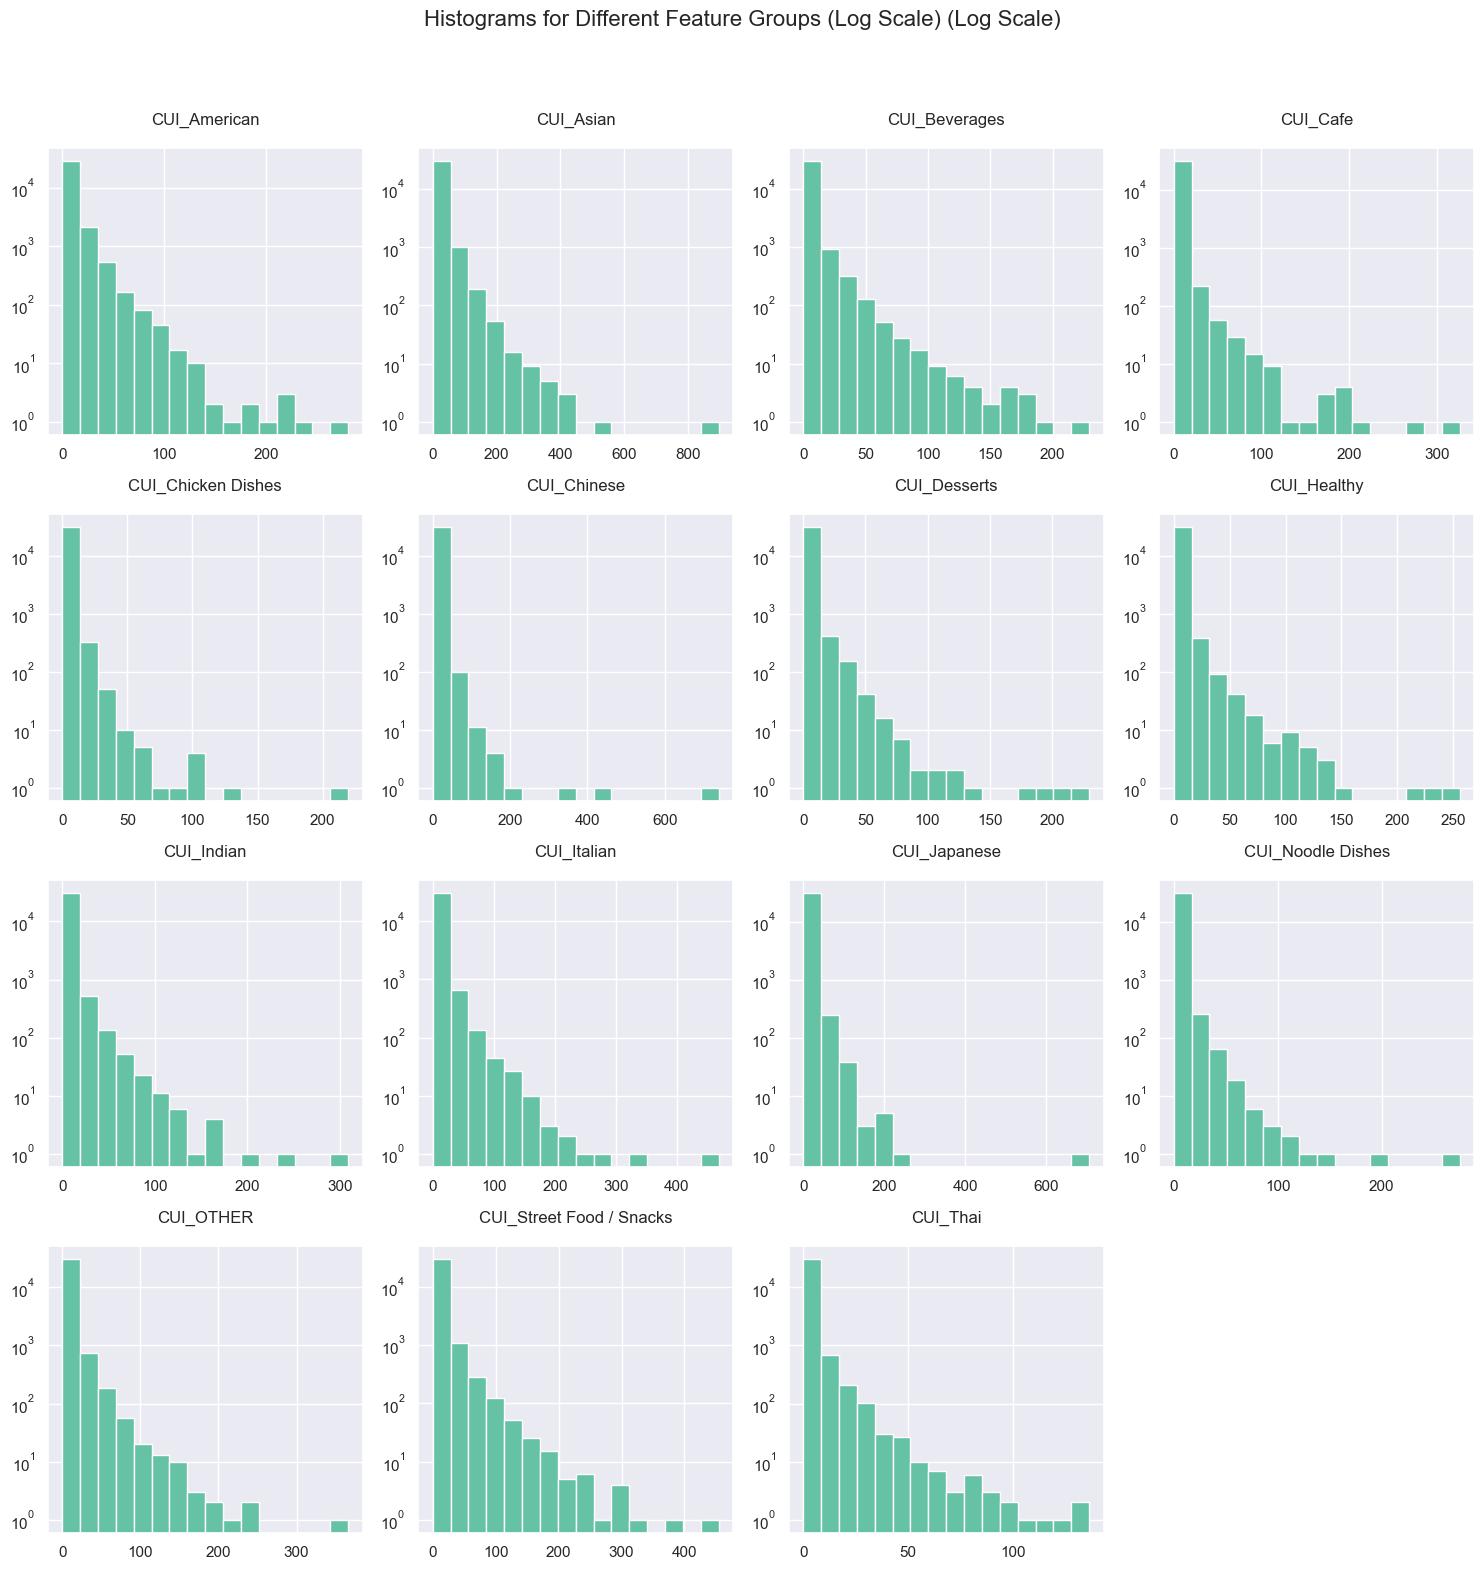

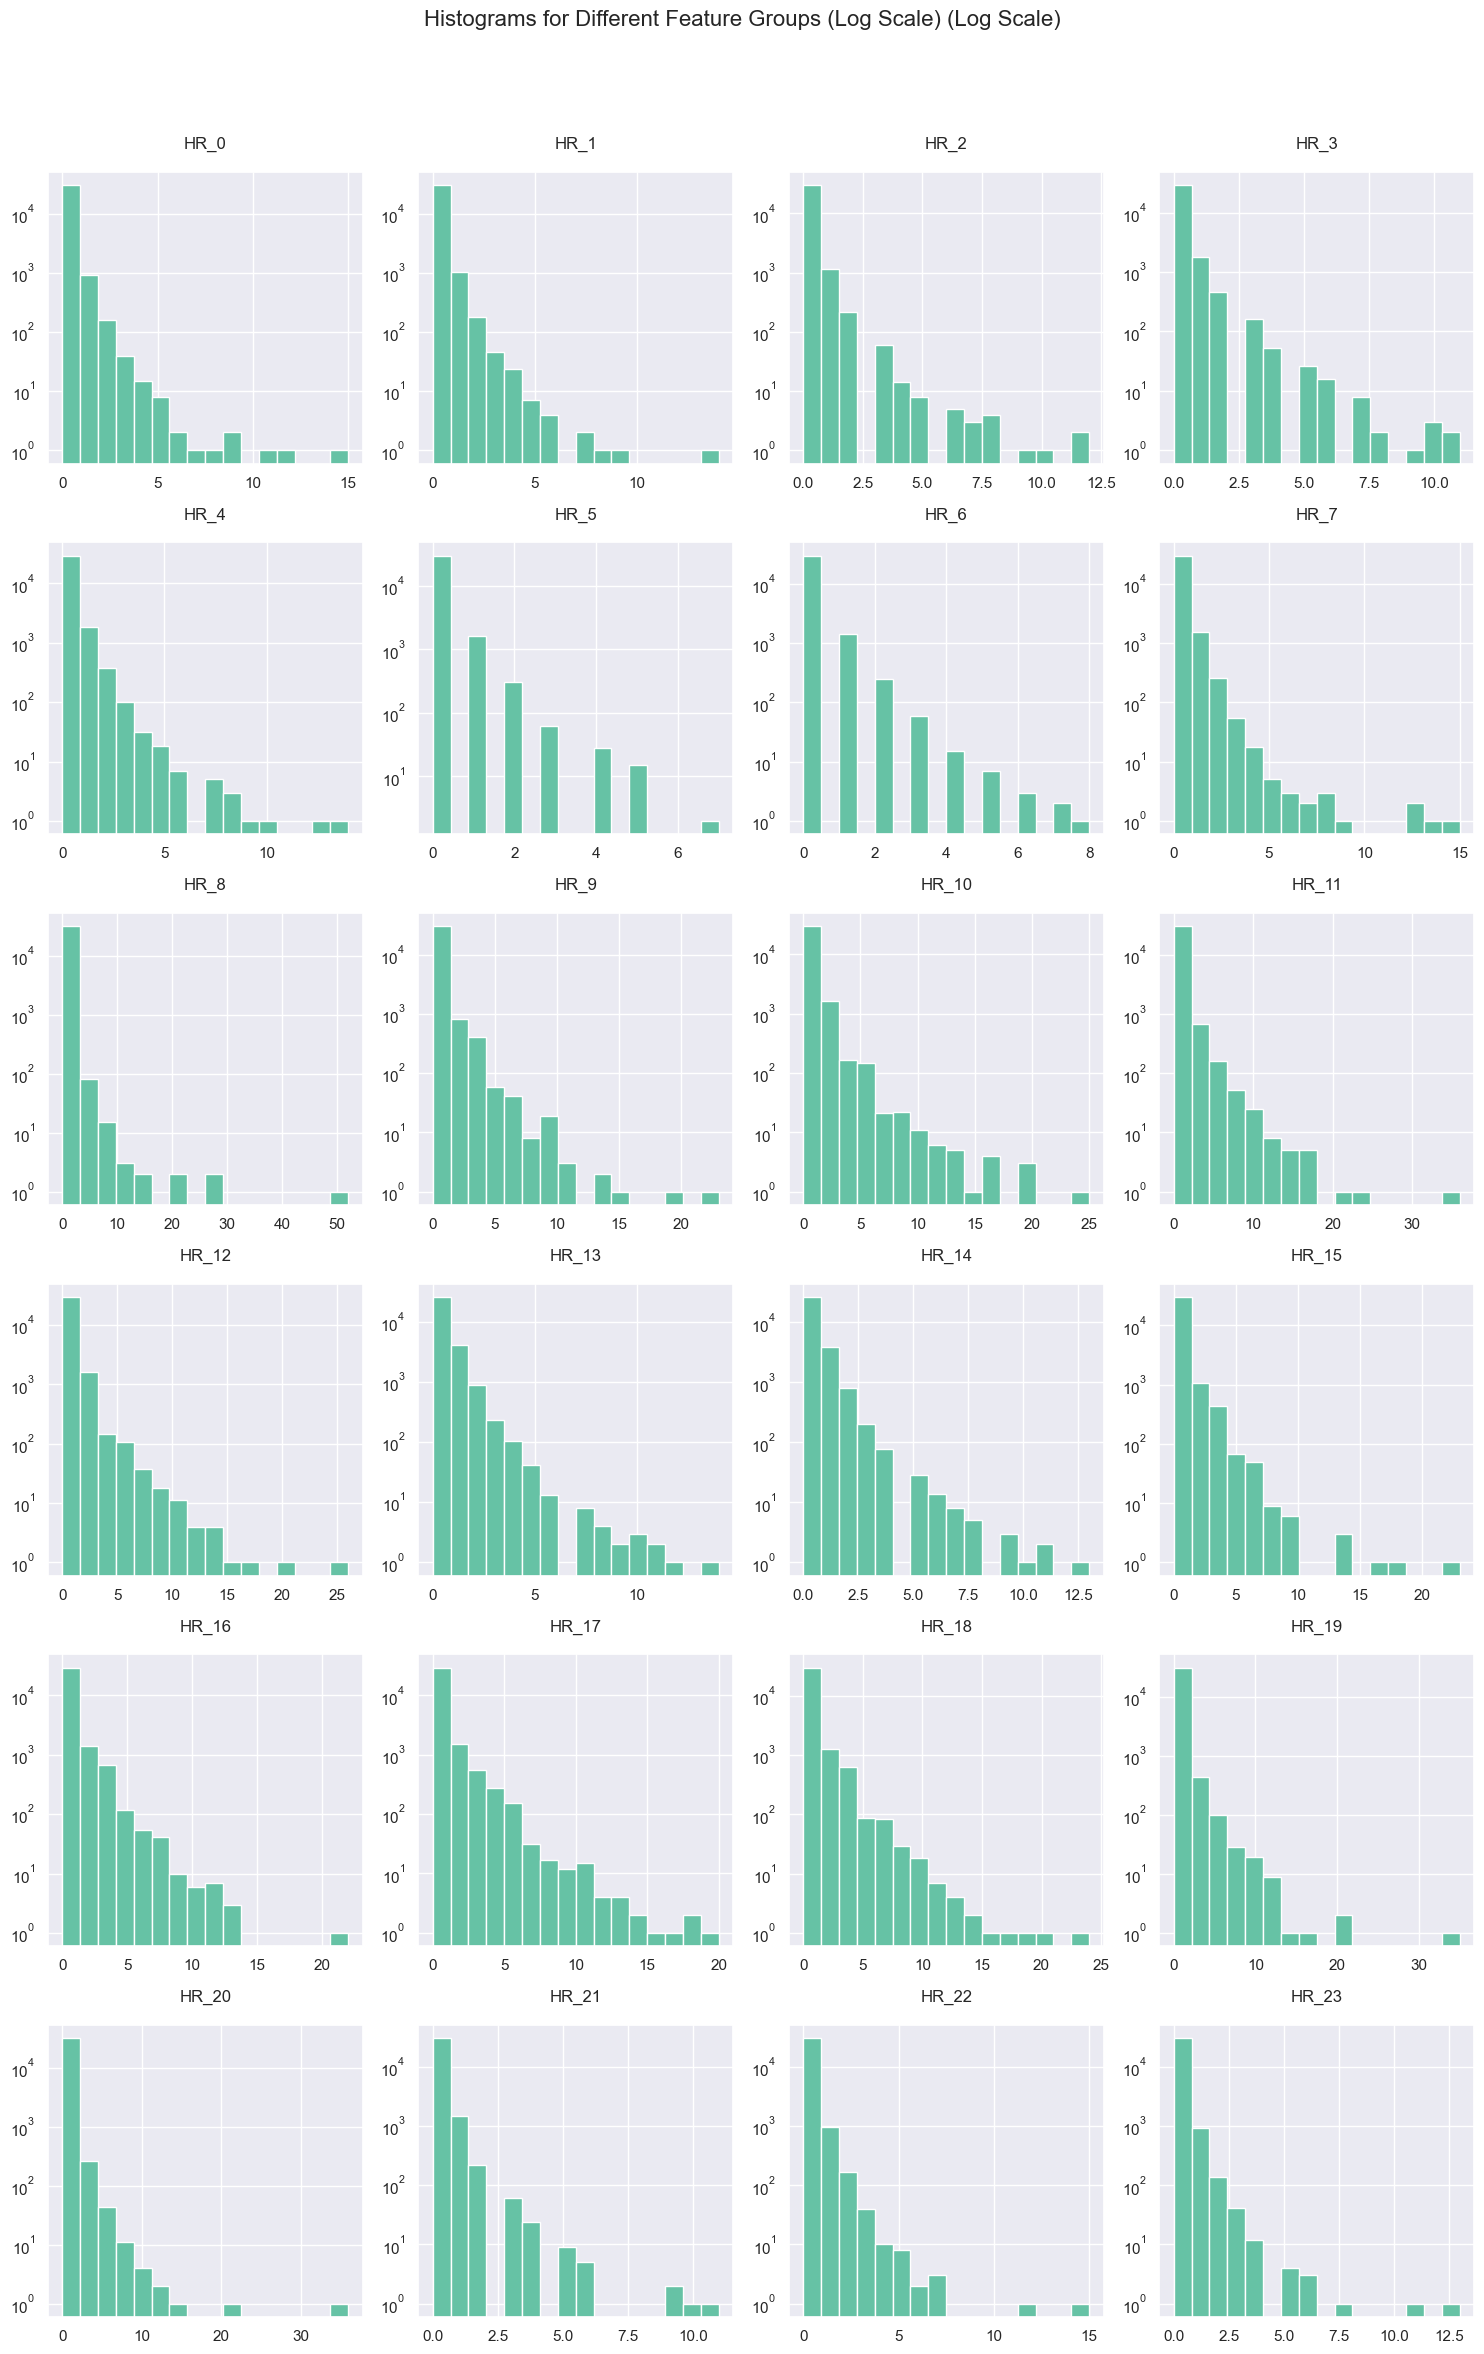

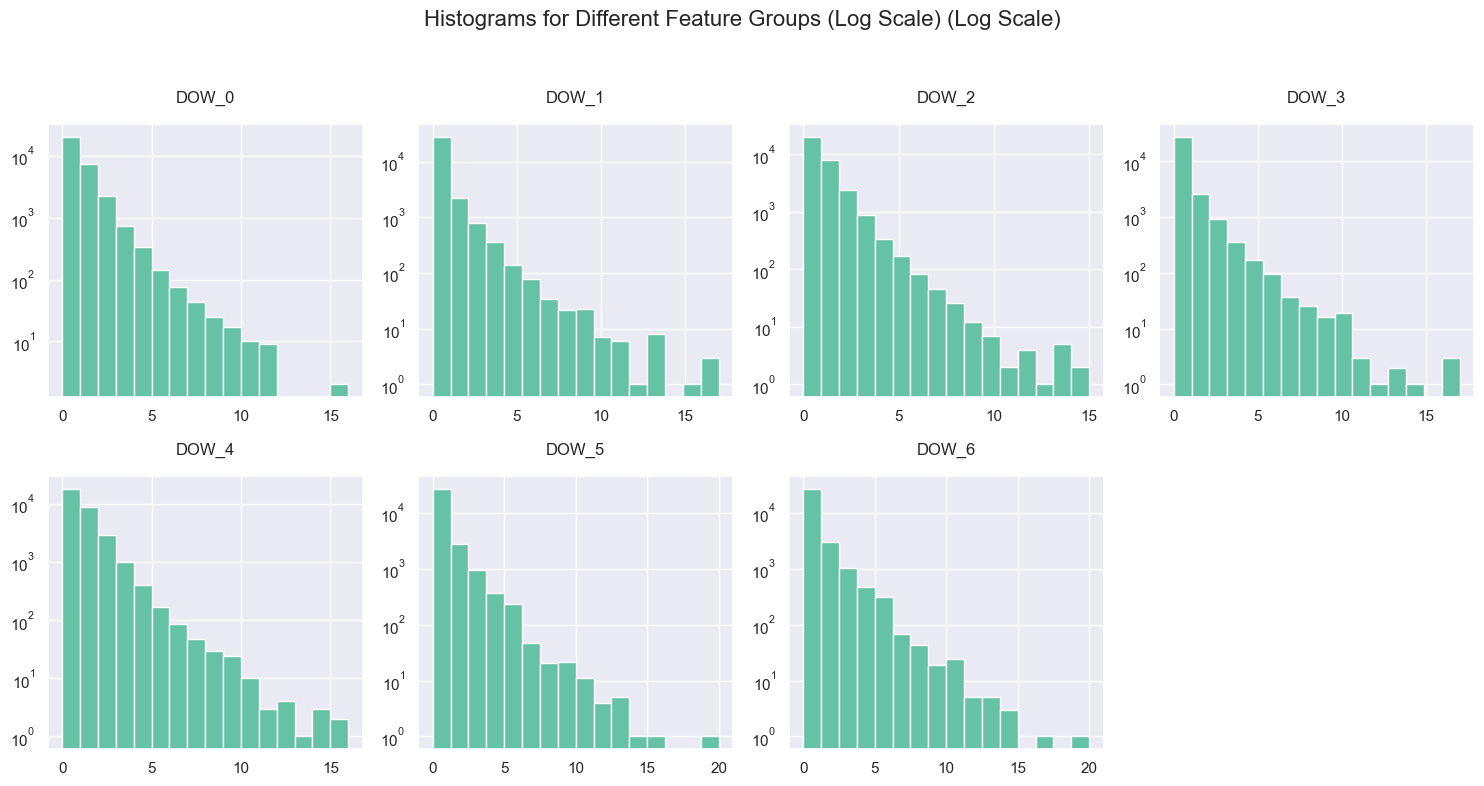

In [47]:
metric_features_histogram(df, metric_features_sep, title="Histograms for Different Feature Groups (Log Scale)", color="#66c2a5" , use_log=True)

**Conclusions from Log-Scale Histogram Analysis**

- **General Trends**: For most variables, the frequency decreases as the values on the x-axis increase, indicating a concentration of lower values and a right-skewed distribution.

- **`last_order`**: The values increase as the days progress, which aligns with previous observations from histograms on a real scale.

- **`dif_order`**: The distribution is practically uniform, as expected, since it represents the difference between the day of the last order and the day of the first order. This is consistent with the nearly symmetrical distributions of the two original variables.

- **`HR_0`**: There appear to be no orders for this variable, indicating a lack of activity during this hour.

- **Gaps in Histograms**: Several histograms exhibit gaps in the intervals, meaning no occurrences were recorded in those ranges. This is expected for:
  - **HR and DOW Variables**: As discrete variables, they naturally lack values between whole numbers.
  - **CUI Variables**: The gaps suggest that no customers spent specific amounts of money within those intervals.


<a class="anchor" id="section_6_1_2">

### 6.1.2 Box Plots

</a>

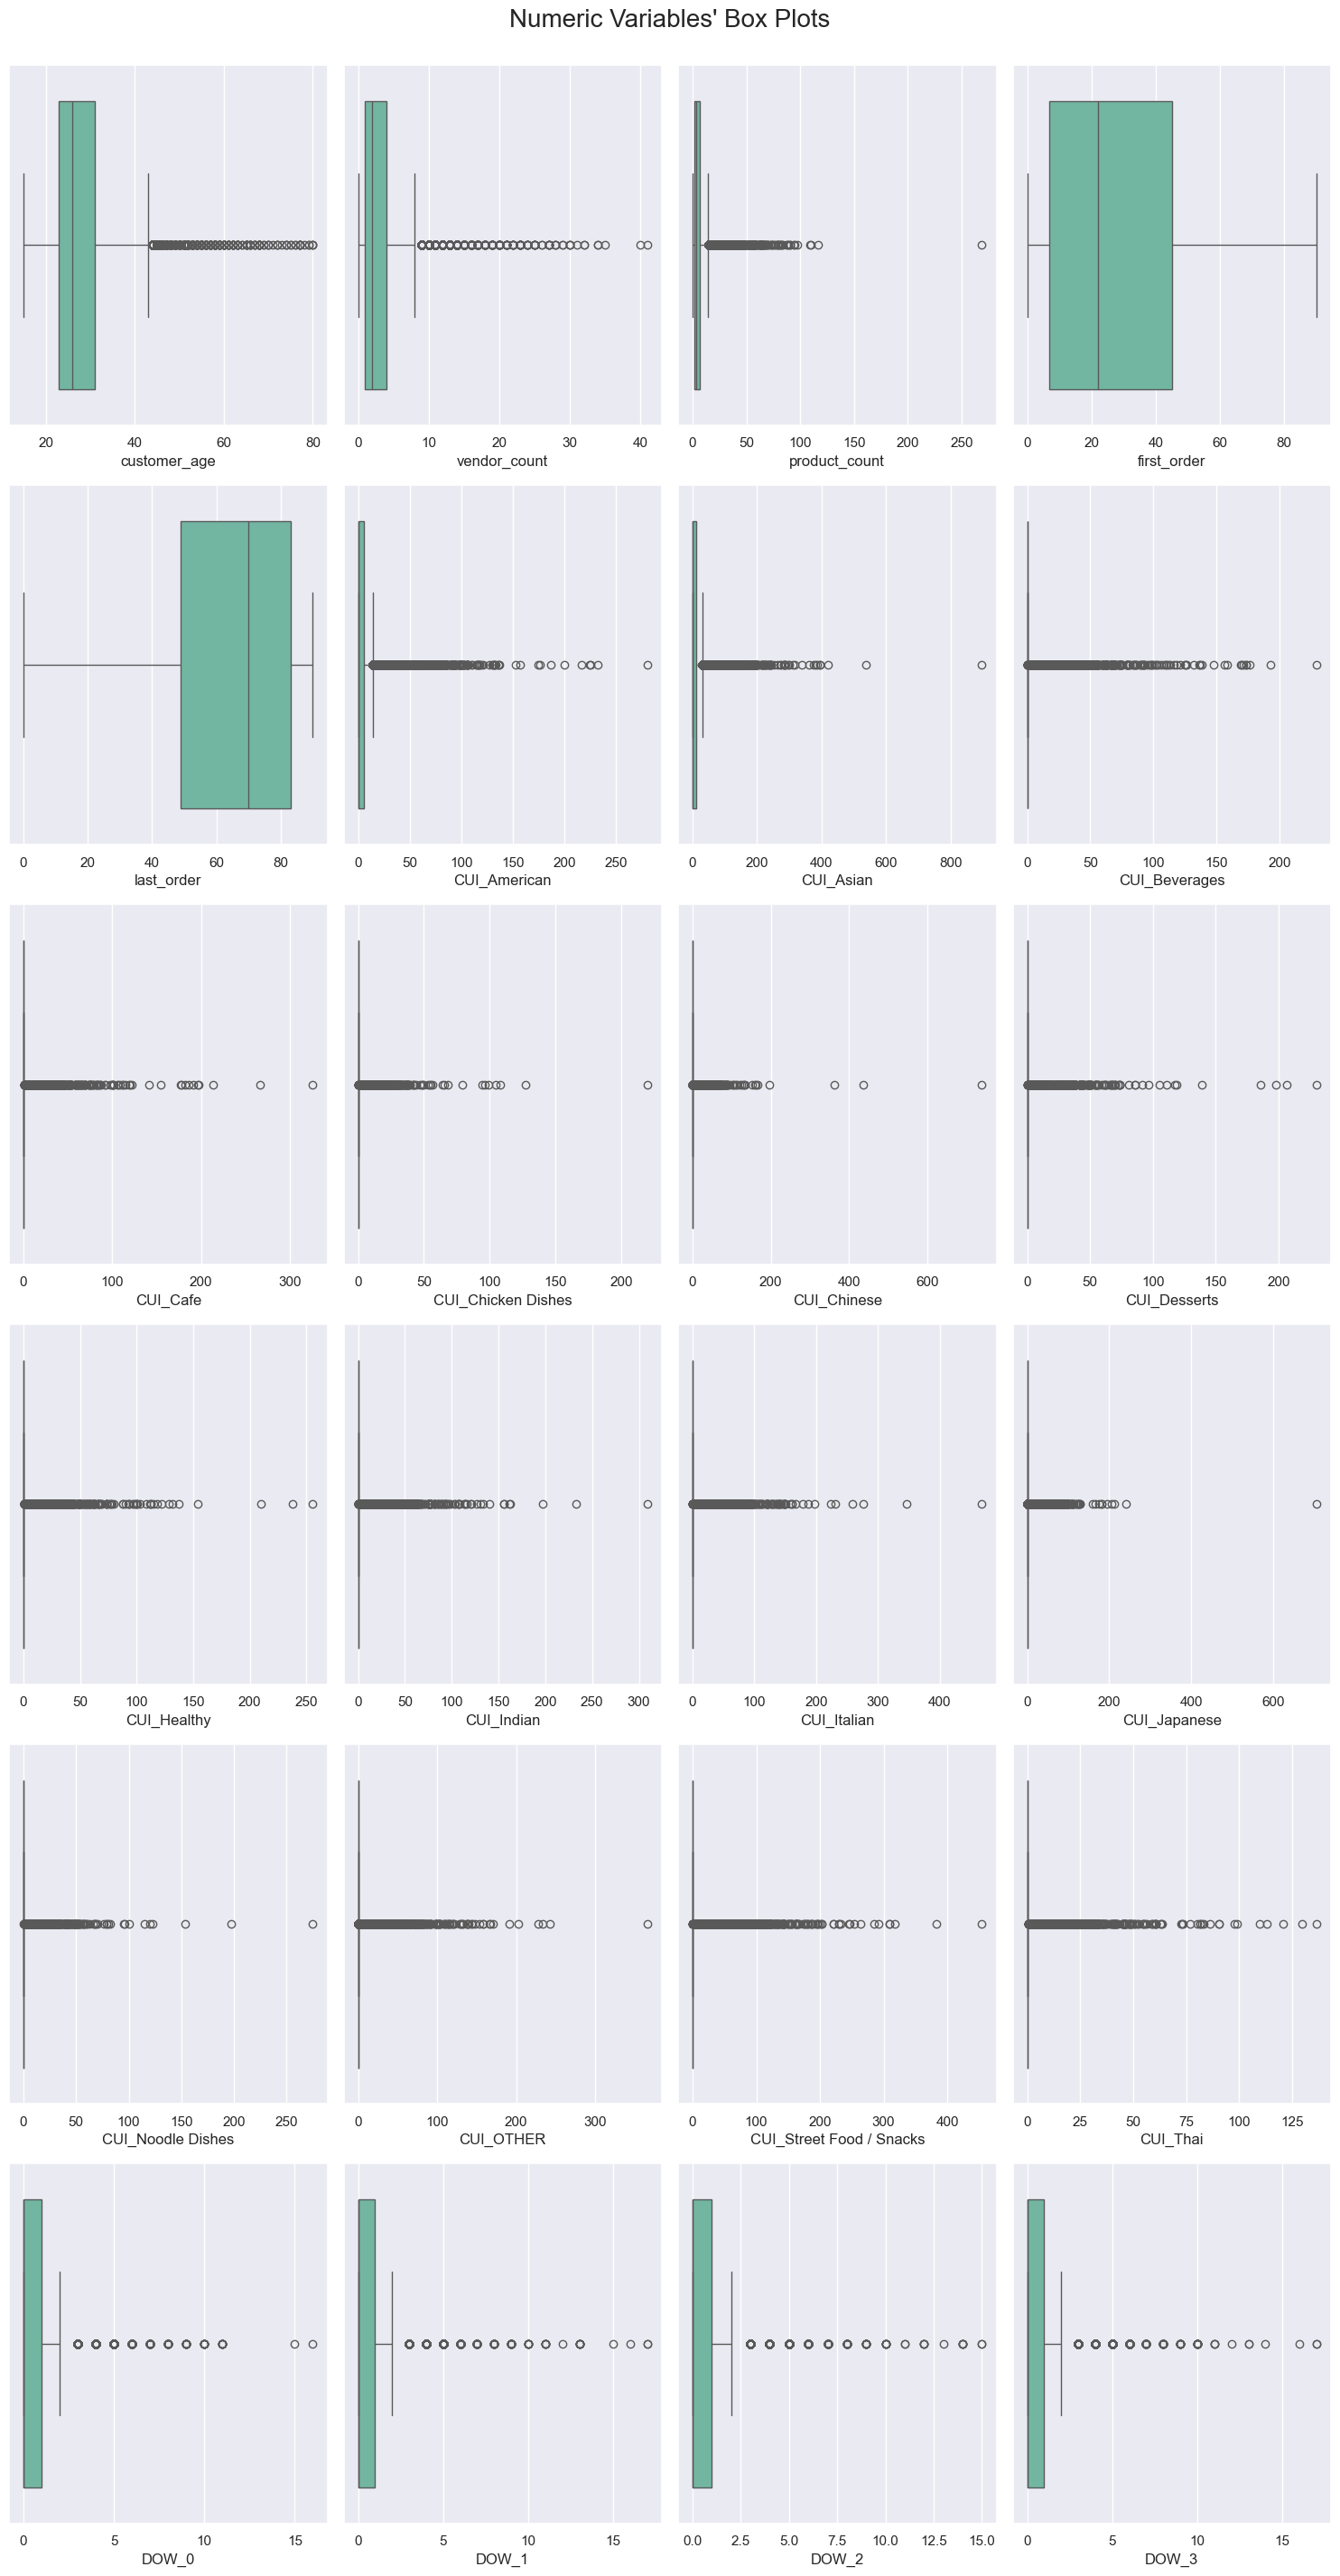

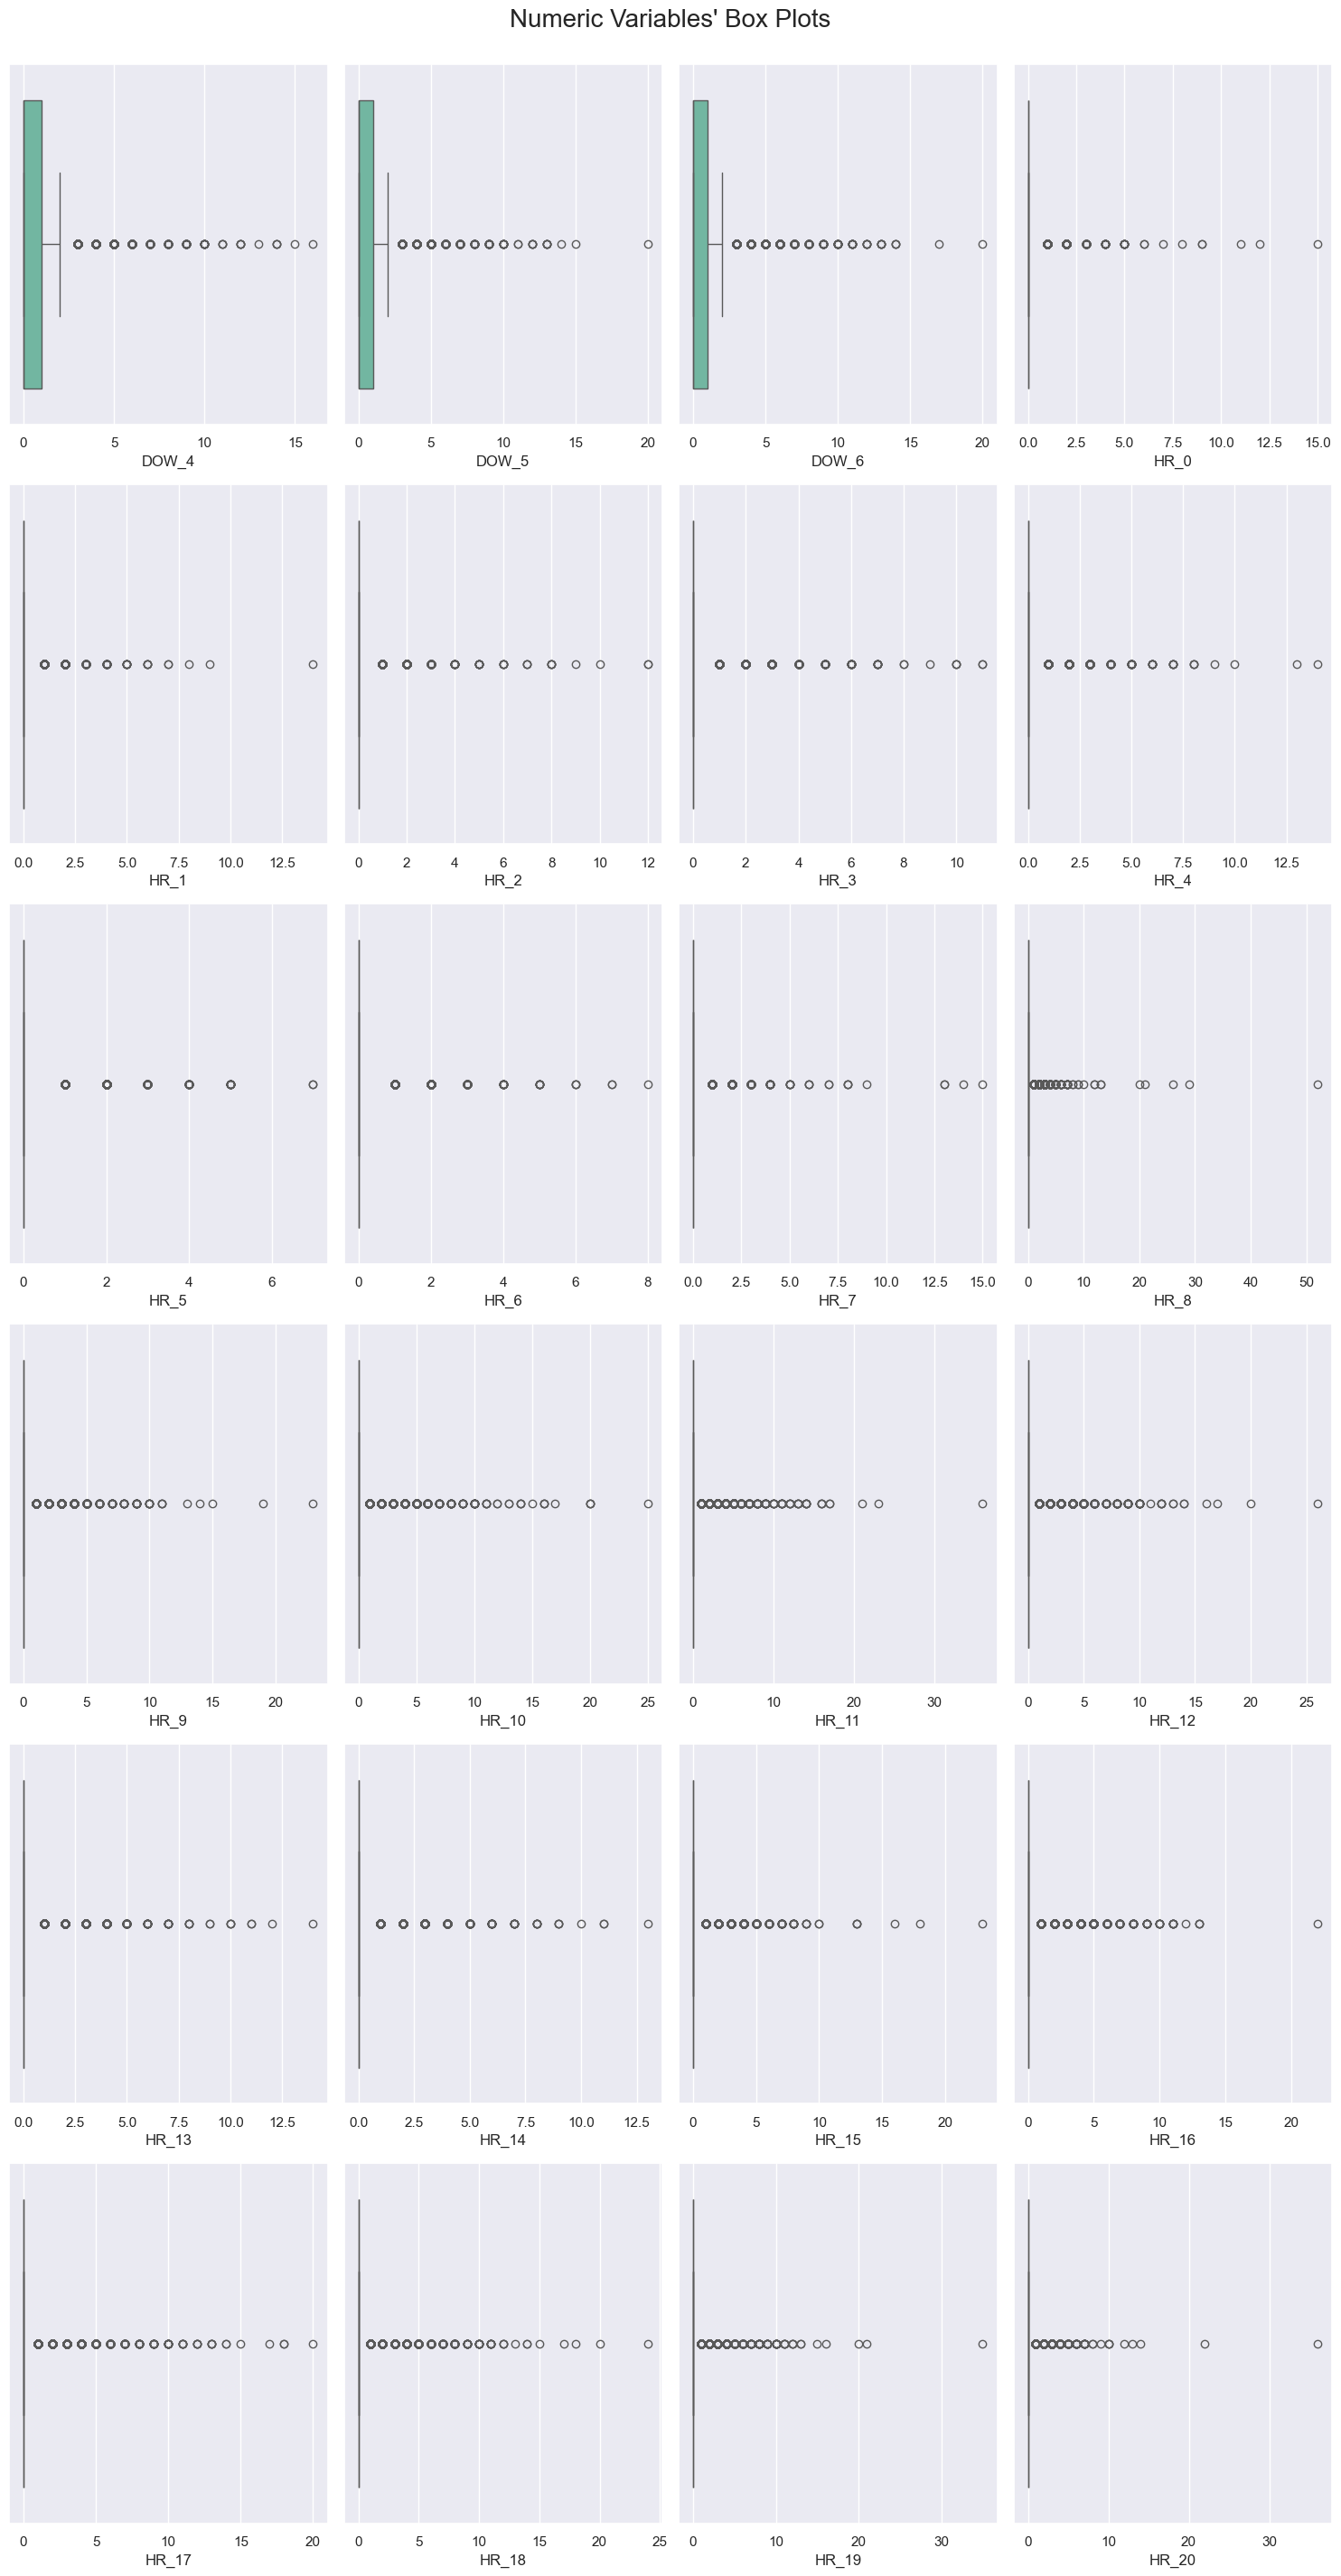

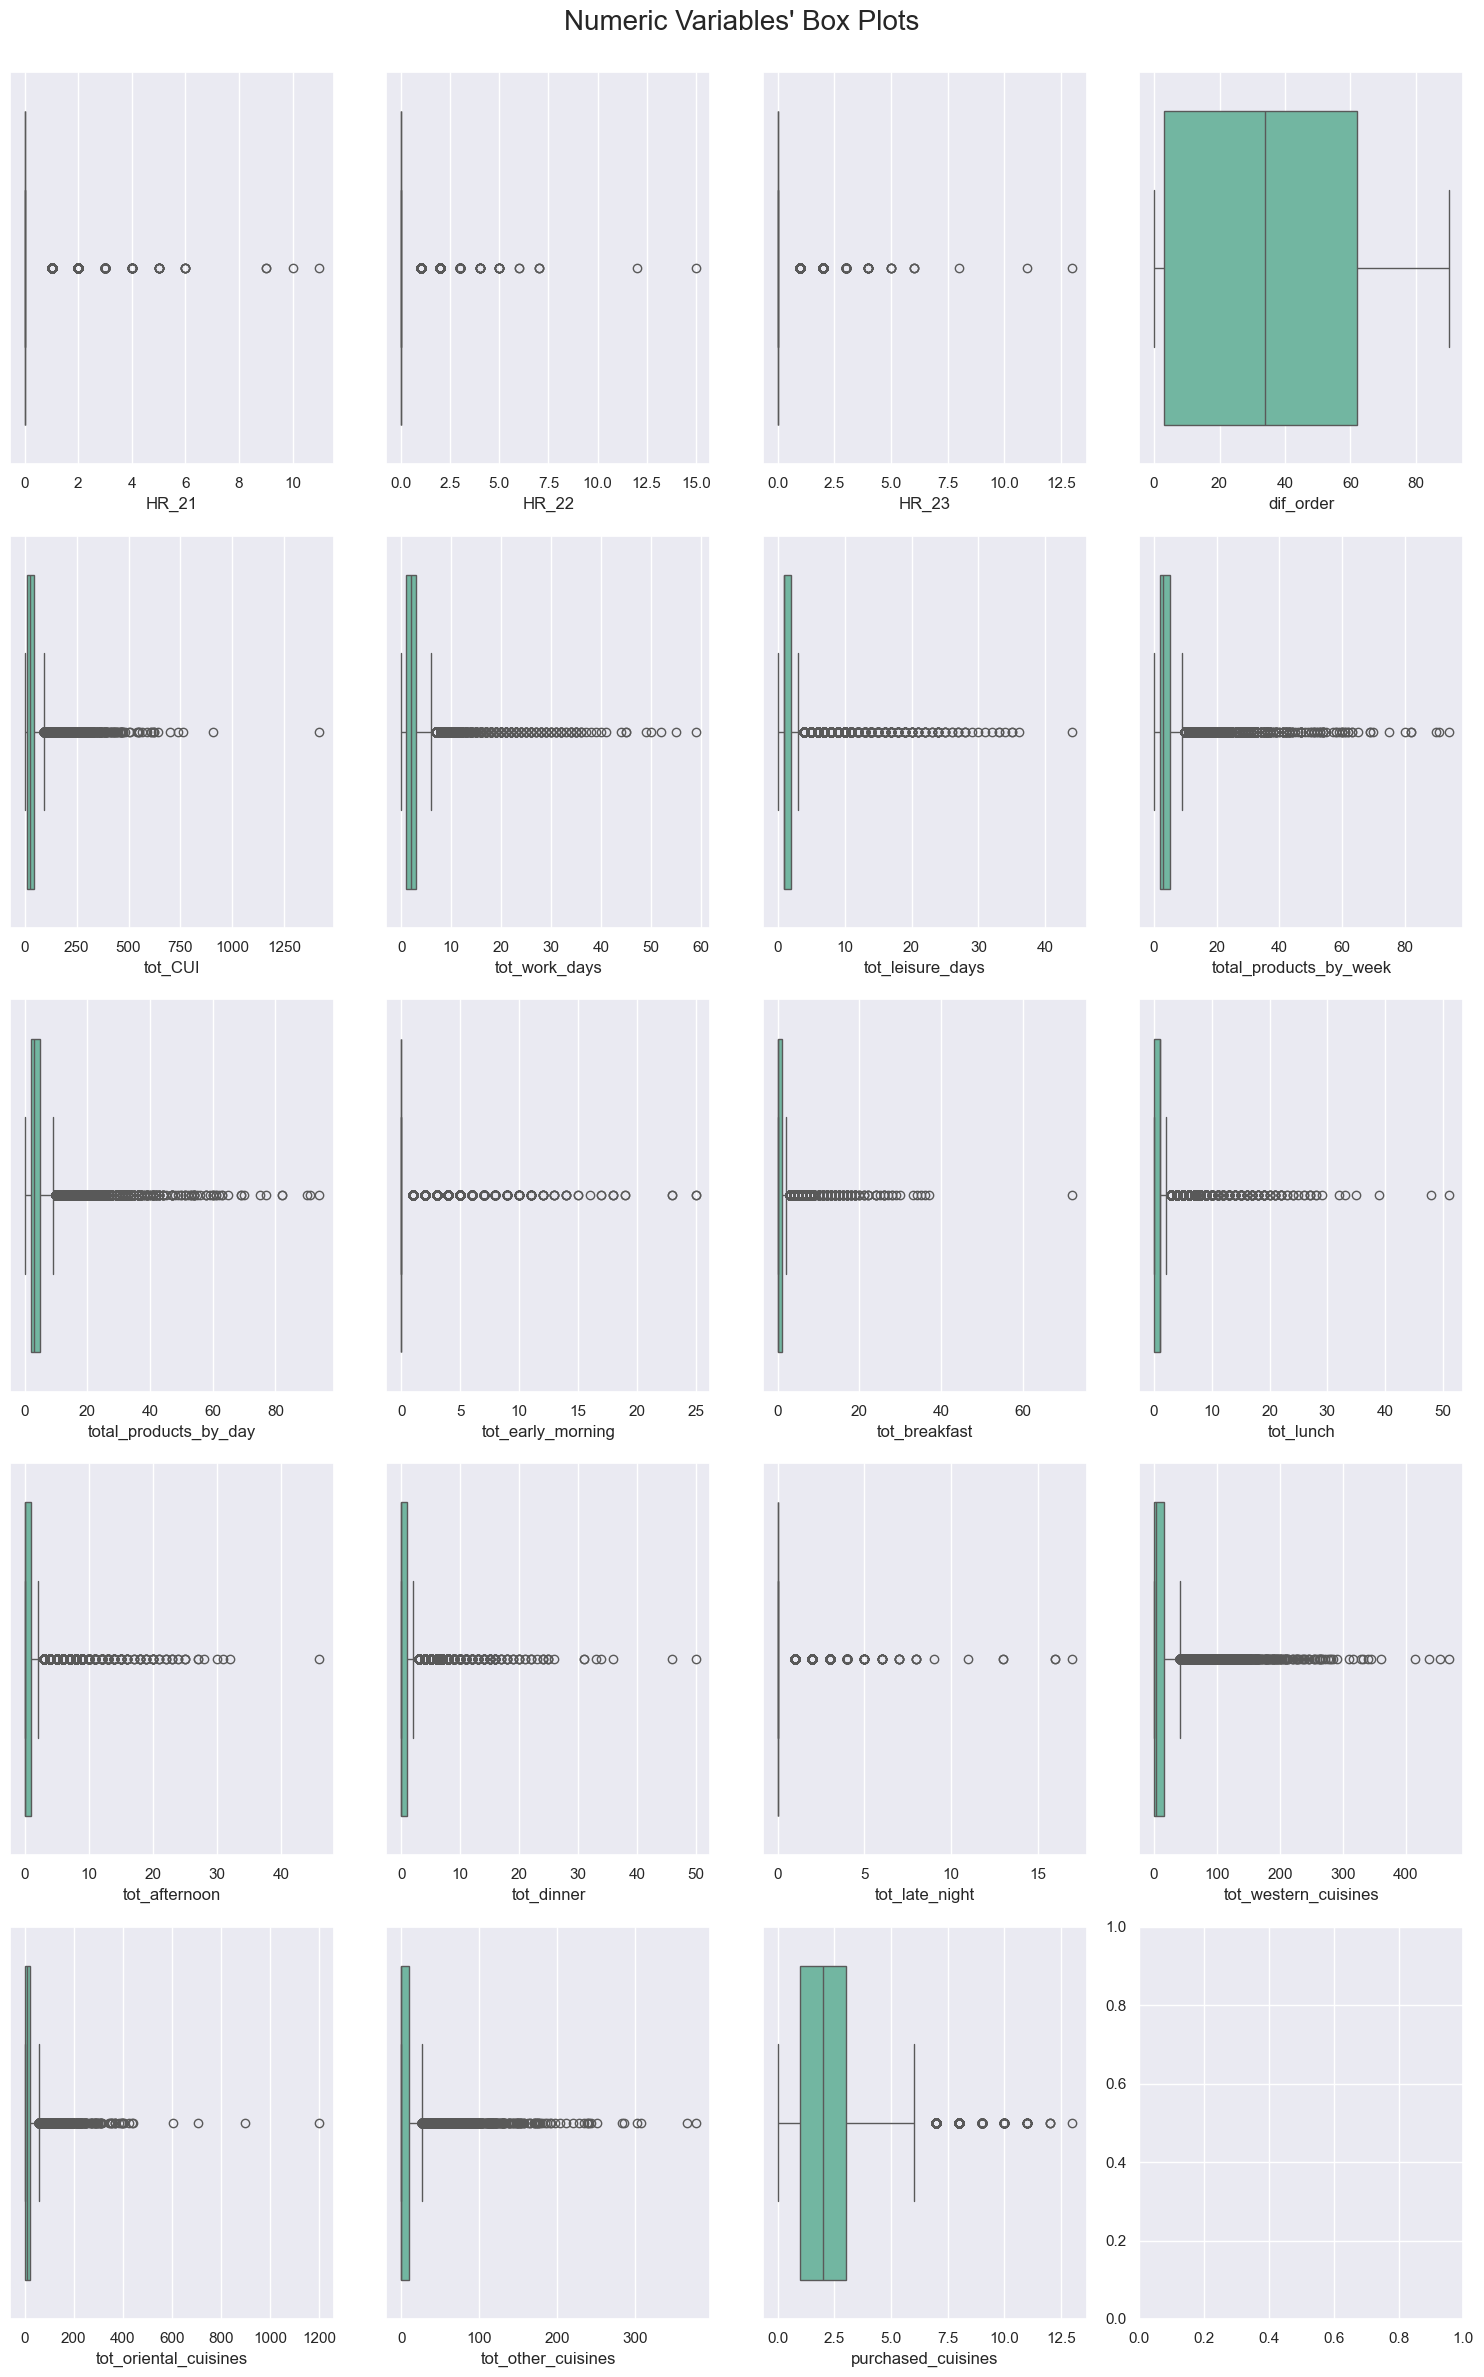

In [48]:
plot_boxplots(df,"Numeric Variables' Box Plots", metric_features)

**Observations on Variable Distributions**

Most variables exhibit **skewed distributions**, with the **median** positioned close to or at the lower limit of the box in box plots, indicating **positive skewness**. Additionally, many outliers are observed towards higher values, suggesting that while most data points for these variables are low, there are some significantly elevated values.

Notable exceptions include:
- **`first_order`**, **`last_order`**, and **`dif_order`**: These variables do not contain any outliers.
- **`HR_0`**: This variable only contains null values, indicating a lack of recorded activity during this time period.

These patterns provide insights into the underlying data, highlighting the variability and concentration of values for different variables.

<a class="anchor" id="section_6_1_3">

### 6.1.3 Bar Plots

</a>

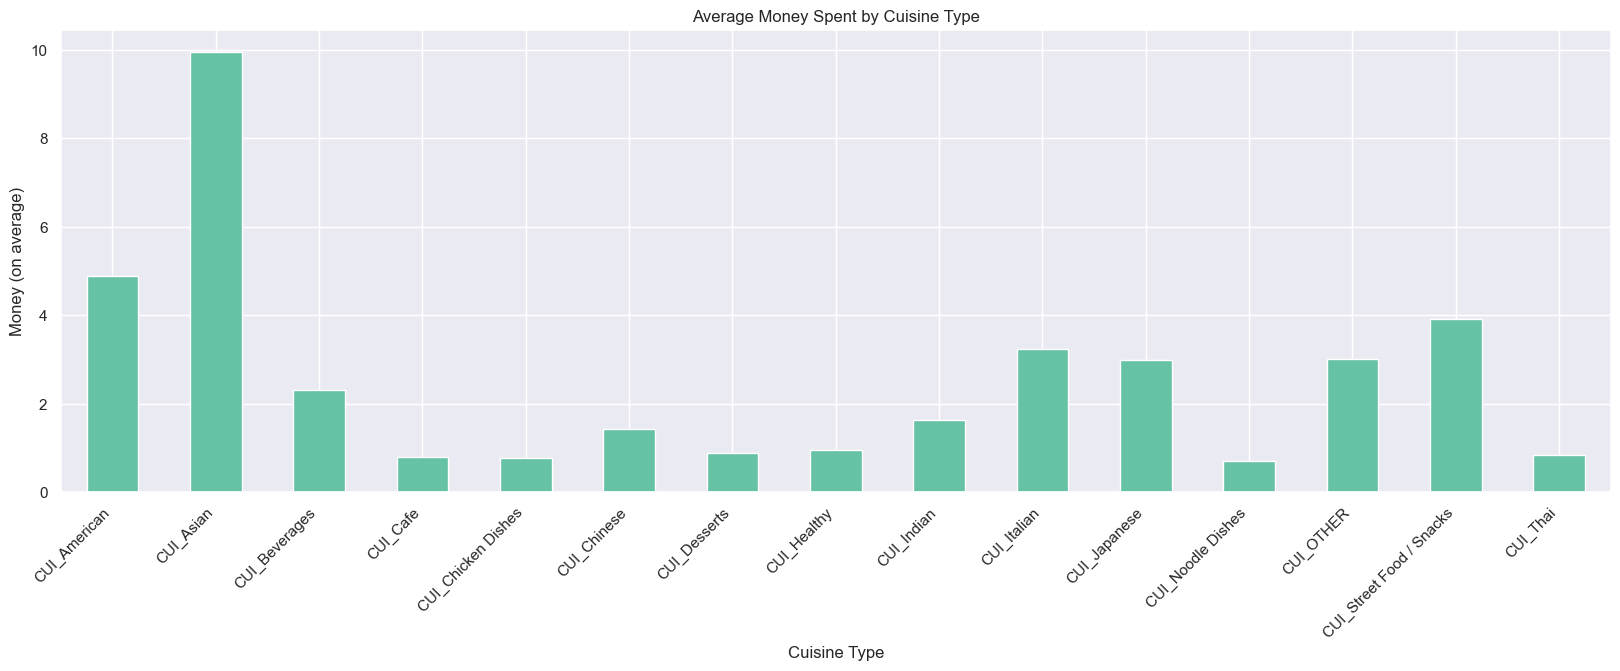

In [49]:
# Plot the average money spent on each cuisine type
plot_values(
    df,
    columns=cuisine_cols,
    title="Average Money Spent by Cuisine Type",
    xlabel="Cuisine Type",
    ylabel="Money (on average)",
    color="#66c2a5",
    figsize=(20, 6),
    rotation=45,
    ha='right',
    use_mean=True
)

**Analysis of Average Expenditure by Cuisine Category**

- **`CUI_Asian`**: This category exhibits the highest average expenditure, with a mean of approximately **10 monetary units**, indicating that customers tend to spend more in this category. 
This could be due to its popularity or higher price point.

- **`CUI_American`**: The average expenditure for this category is also relatively high, though lower than that of Asian cuisine, with a mean of around **6 monetary units**.

- **`CUI_Street Food / Snacks`** and **`CUI_Italian`**: These categories show moderately high average expenditures, both exceeding the **3 monetary unit** mark.

- **Other Categories**: 
  - Cuisine categories such as **`CUI_Cafe`**, **`CUI_Chicken Dishes`**, **`CUI_Chinese`**, **`CUI_Healthy`**, **`CUI_Desserts`**, **`CUI_Noodle Dishes`**, and **`CUI_Thai`** exhibit lower average expenditures, all below **2 monetary units**. 
  - This suggests that these cuisines may either be less popular among customers or have a lower average ticket price.

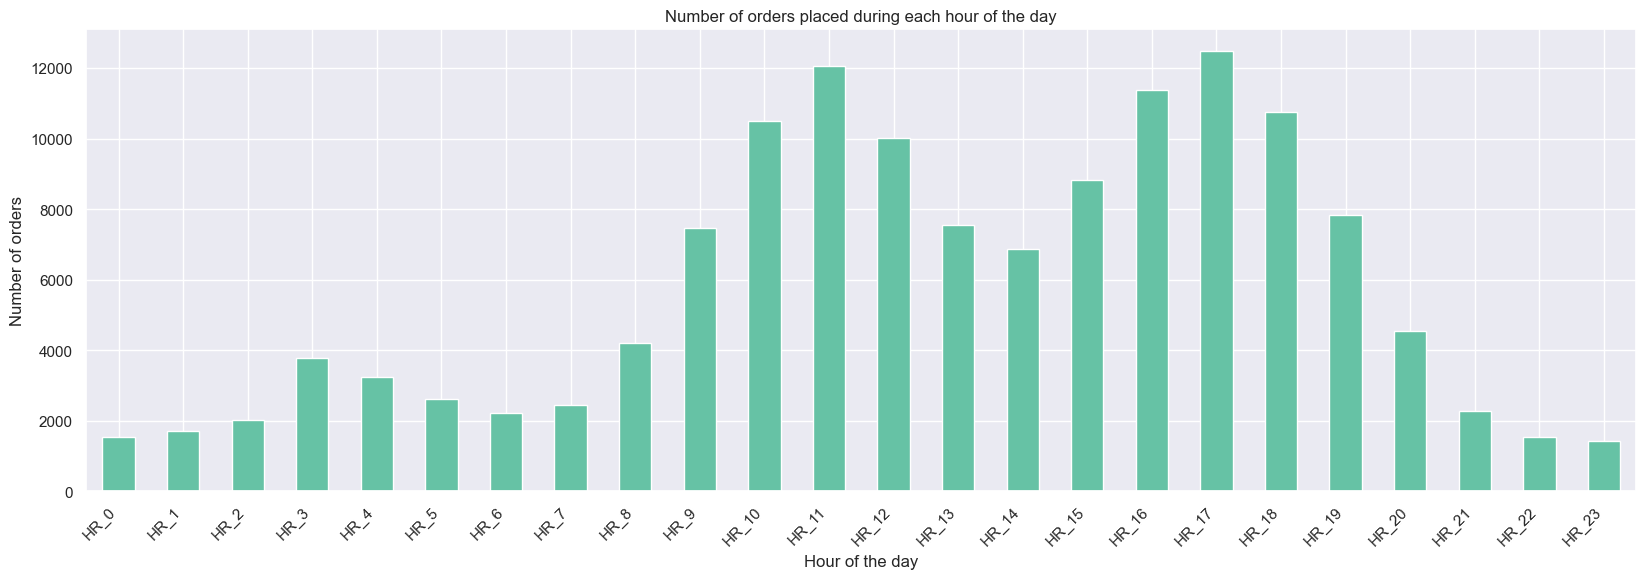

In [50]:
# Plot the number of orders placed during each hour of the day
plot_values(
    df,
    columns=hr_cols,
    title='Number of orders placed during each hour of the day',
    xlabel='Hour of the day',
    ylabel='Number of orders',
    color="#66c2a5",
    figsize=(20, 6),
    rotation=45,
    ha='right',
    use_mean=False
)

**Analysis of Activity Periods**

- **Peak Order Hours**: Orders peak at **11:00 AM (`HR_11`)** and **5:00 PM (`HR_17`)**, aligning with typical **lunch** and **dinner** times when demand naturally increases.

- **High Activity Periods**: 
  - High order volumes are observed between **9:00 AM and 1:00 PM (`HR_9` to `HR_13`)** and between **3:00 PM and 7:00 PM (`HR_15` to `HR_19`)**. These periods correspond to **morning** and **afternoon rush hours**, when customers often seek options for **breakfast**, **lunch**, or **snacks**.

- **Low Activity Periods**: 
  - There is a significant decline in orders during **early morning hours**, between **1:00 AM and 7:00 AM (`HR_1` to `HR_7`)**, when most people are asleep.
  - Another noticeable drop occurs between **9:00 PM and 11:00 PM (`HR_21` to `HR_23`)**, likely due to decreased demand after **dinner**.

- **Zero Activity Period**: There were no recorded orders at **midnight (`HR_0`)**, indicating zero customer activity during this time.

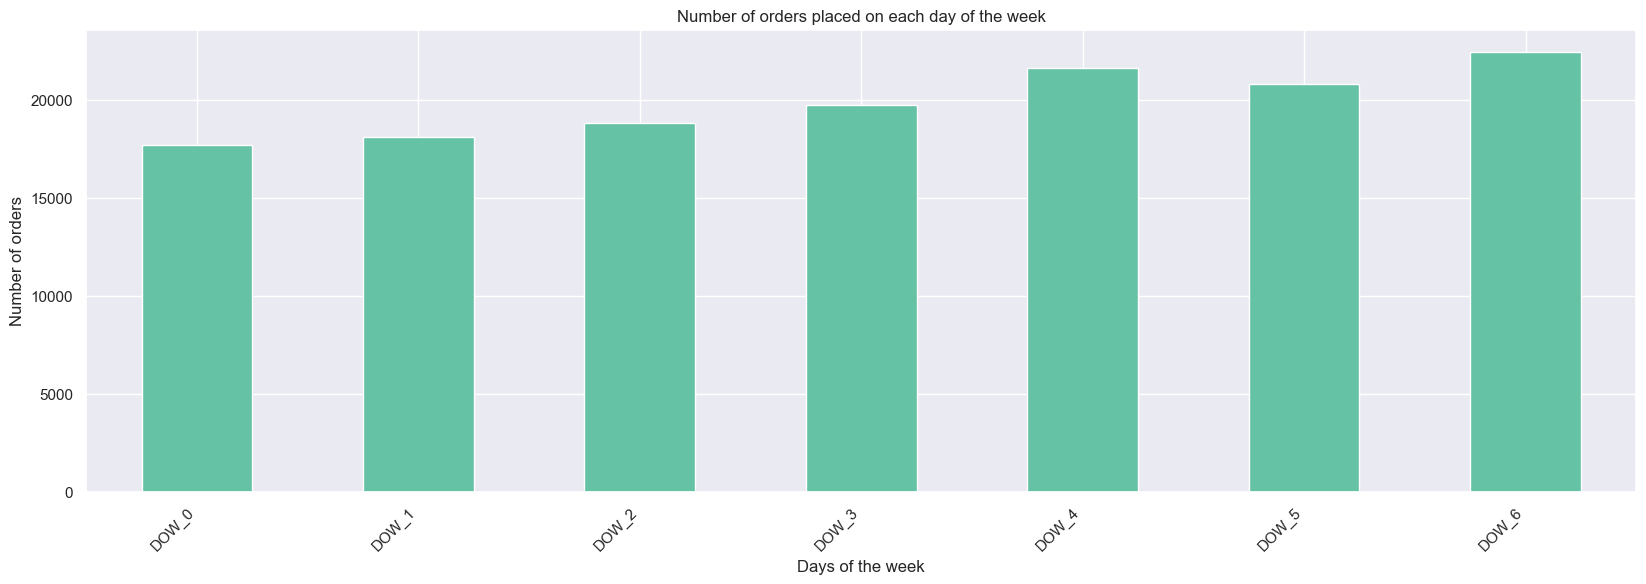

In [51]:
# Plot the number of orders placed during each day of the week
plot_values(
    df,
    columns=dow_cols,
    title='Number of orders placed on each day of the week',
    xlabel='Days of the week',
    ylabel='Number of orders',
    color="#66c2a5",
    figsize=(20, 6),
    rotation=45,
    ha='right',
    use_mean=False
)

**Analysis of Activity Periods**

Despite some variations, the difference in orders betw
een days is not substantial, indicating that orders are relatively evenly distributed throughout the week, with a slight tendency towards an increase towards the end of the week.

<a class="anchor" id="section_6_2">

## 6.2 Numeric Variables - Bivariate Analysis

</a>

[Back to 6. Visual Exploration](#section_6)

In [52]:
# Define a list of variables to remove by combining cuisine, day-of-week, and hour columns
vars_to_remove = cuisine_cols + dow_cols + hr_cols

# Create a new list of metric features, excluding the variables in vars_to_remove
new_metric_features = [var for var in metric_features if var not in vars_to_remove]

<a class="anchor" id="section_6_2_1">

### 6.2.1 Scatter Plots

</a>

In [ ]:
plot_pairwise_relationships(
    df=df,
    features=new_metric_features,
    title="Pairwise Relationship of Numerical Variables",
    diag_kind="hist",
    fontsize=30
)

**Pairwise Scatter Plot Analysis of Numerical Variables**

The pairwise scatter plot analysis provides insights into the relationships between numerical variables in the dataset, helping to identify potential correlations and patterns. Below are the key observations and insights derived from this visualization:

Absence of Strong Correlations
- Most scatter plots display randomly scattered points, indicating a lack of strong linear relationships between variables.
- While some variables exhibit slightly inclined patterns, the visual correlations are weak, suggesting that simple linear relationships may not sufficiently capture dependencies between these variables.

Presence of Clusters and Non-Linear Patterns
- Certain scatter plots reveal clusters or groupings of points, which may represent subsets of customers with similar behaviors across specific variables.
- These patterns suggest that categorical variables or derived groupings (e.g., **work vs. leisure days** or **time periods**) could be more effective for segmentation or behavior analysis than linear models.

Outliers and Value Ranges
- Some variables contain visible outliers, representing points distant from the majority of the data. For instance, variables related to order counts display extreme values, likely corresponding to high-frequency customers.
- The presence of outliers and variability in some variables highlights distinct customer behavior profiles, such as **casual vs. frequent customers**.

Univariate Distributions on the Diagonals
- The diagonal of the scatter plot matrix presents individual histograms for each variable, allowing for univariate distribution analysis.
- These histograms reveal skewed distributions for some variables, indicating that customer behavior is not uniformly distributed. This suggests that most customers tend to follow specific patterns (e.g., preferences for certain times or days).

<br>**Summary**

The scatter plot matrix highlights the relative independence of numerical variables and underscores the need for more advanced methods to capture the complexity of behavior patterns in the dataset. This analysis reinforces the importance of derived variables and predefined groupings, such as **time categories** and **consumption periods**, to gain deeper insights into customer behavior.


<a class="anchor" id="section_6_2_2">

### 6.2.2 Heatmaps

</a>

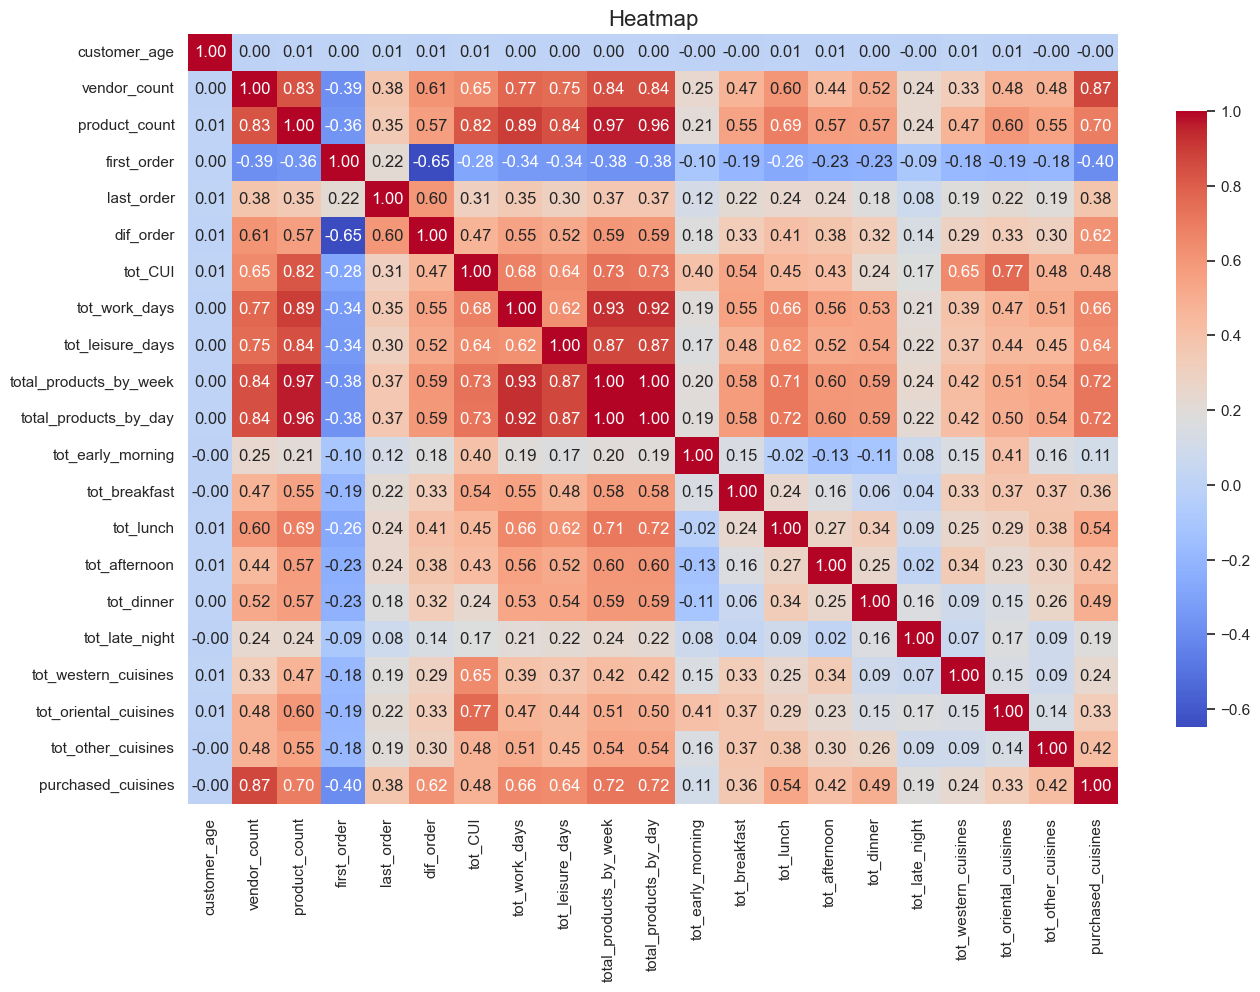

In [54]:
# Plot the heatmap for the correlation matrix of the metric features
plot_filtered_correlation_heatmap(
    df=df,
    features=new_metric_features,
    method='pearson',
    filter_expr = None,
    title='Heatmap',
    figsize=(15, 10),
    annot=True,
    fmt=".2f",
    cmap='coolwarm'
)

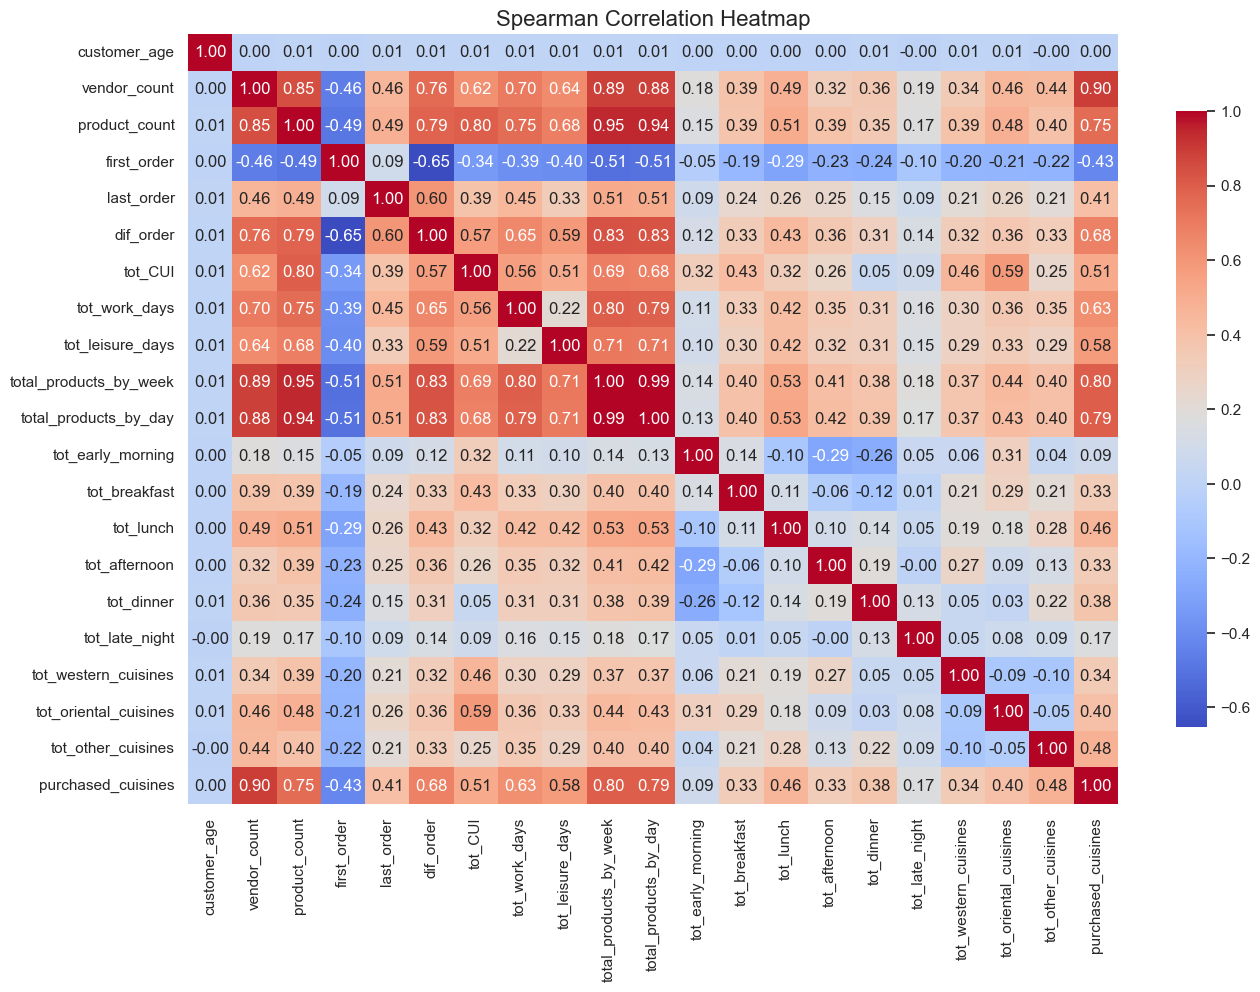

In [55]:
# Plot the heatmap for the spearman correlation matrix of the metric features
plot_filtered_correlation_heatmap(
    df=df,
    features=new_metric_features,
    method='spearman',
    filter_expr = None,
    title='Spearman Correlation Heatmap',
    figsize=(15, 10),
    annot=True,
    fmt=".2f",
    cmap='coolwarm'
)

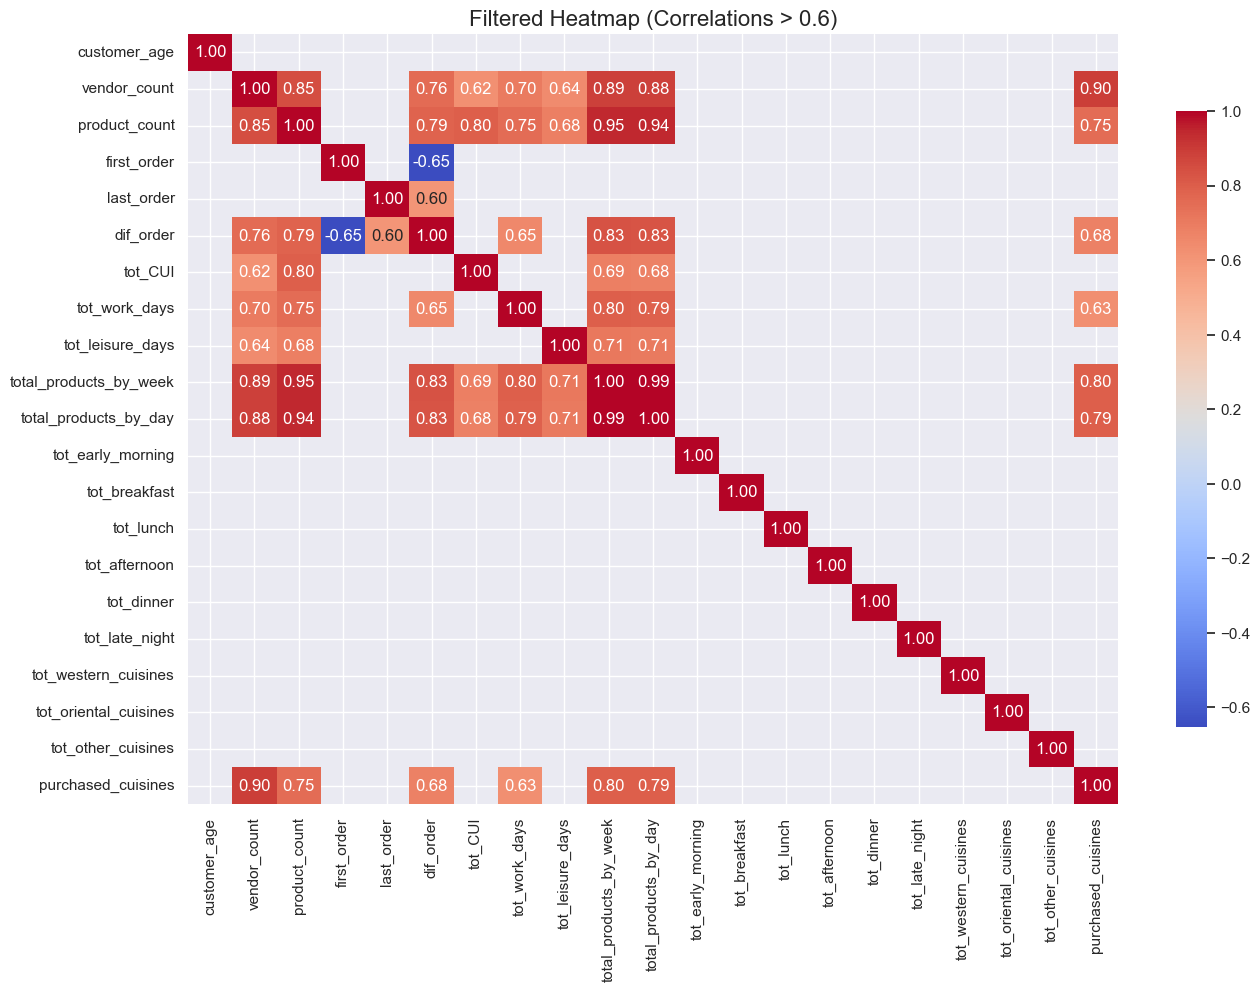

In [56]:
# Plot the heatmap for the spearman correlation matrix of the metric features (just the most correlated)
plot_filtered_correlation_heatmap(
    df=df,
    features=new_metric_features,
    method='spearman',
    filter_expr=lambda x: abs(x) > 0.6,  # Filter correlations > 0.6
    title='Filtered Heatmap (Correlations > 0.6)',
    figsize=(15, 10),
    annot=True,
    fmt=".2f",
    cmap='coolwarm'
)

**Observations from the Heatmap Analysis: Pearson and Spearman Comparison**

**1. High Correlation Among Product Count Variables**
- Variables such as **`product_count`**, **`total_products_by_week`**, and **`total_products_by_day`** consistently show strong correlations in both Pearson and Spearman matrices. This is expected, as these metrics measure product counts over different time intervals.
- These correlations highlight **stable purchasing behavior over time**, reinforcing the idea that customers maintain consistent ordering patterns across weekly and daily scales.

**2. Impact of Day Types on Product Consumption**
- Variables representing **`tot_work_days`** and **`tot_leisure_days`** show moderate to high correlations with product metrics like **`vendor_count`** and **`product_count`**, suggesting a relationship between day type and ordering behavior.
- In both Pearson and Spearman matrices, correlations above **0.5** indicate that ordering habits differ between **workdays** and **leisure days**, potentially reflecting changes in routines or lifestyle patterns.

**3. Correlation Between Meal Periods and Product Count**
- Meal-time variables, such as **`tot_lunch`** and **`tot_dinner`**, have moderate correlations with **`product_count`** and **`vendor_count`**, indicating that orders peak around these periods.
- Both Pearson and Spearman matrices confirm that **lunch** and **dinner** are key times for food ordering, while periods like **`tot_early_morning`** and **`tot_late_night`** show minimal correlations, suggesting reduced activity during these times.

**4. Culinary Preferences and Independence Across Groups**
- Grouped cuisine variables (**`tot_western_cuisines`**, **`tot_oriental_cuisines`**, and **`tot_other_cuisines`**) exhibit low correlations with each other in both matrices, indicating **distinct customer preferences** for cuisine types.
- Spearman correlation further emphasizes this independence, suggesting that preferences don’t follow a linear or strongly monotonic pattern. Customers favoring one cuisine group are unlikely to order significantly from others.

**5. Additional Relationships Observed**
- **`customer_age`** shows minimal correlations with most variables across both Pearson and Spearman analyses, indicating that age does not significantly influence ordering patterns.
- **`dif_order`**, which represents the time difference between a customer's first and last orders, has moderate correlations with **`product_count`** and **`vendor_count`**, suggesting that customers with longer ordering histories tend to have more diverse and frequent orders.

<br>**General Conclusion**

The heatmaps, leveraging both Pearson and Spearman correlations, reveal robust patterns in customer ordering behavior:
- Product count metrics and culinary preferences are generally independent, yet they align with specific behavioral patterns tied to meal periods and day types.
- Spearman correlation highlights non-linear relationships, confirming the stability of these trends across different customer segments.

<a class="anchor" id="section_6_3">

## 6.3 Categorical Variables - Univariate Analysis

</a>

[Back to 6. Visual Exploration](#section_6)

c:\Users\Rafael\Desktop\DM project 9-12-2024\functions.py:1081: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
c:\Users\Rafael\Desktop\DM project 9-12-2024\functions.py:1081: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
c:\Users\Rafael\Desktop\DM project 9-12-2024\functions.py:1081: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
c:\Users\Rafael\Desktop\DM project 9-12-2024\functions.py:1081: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rot

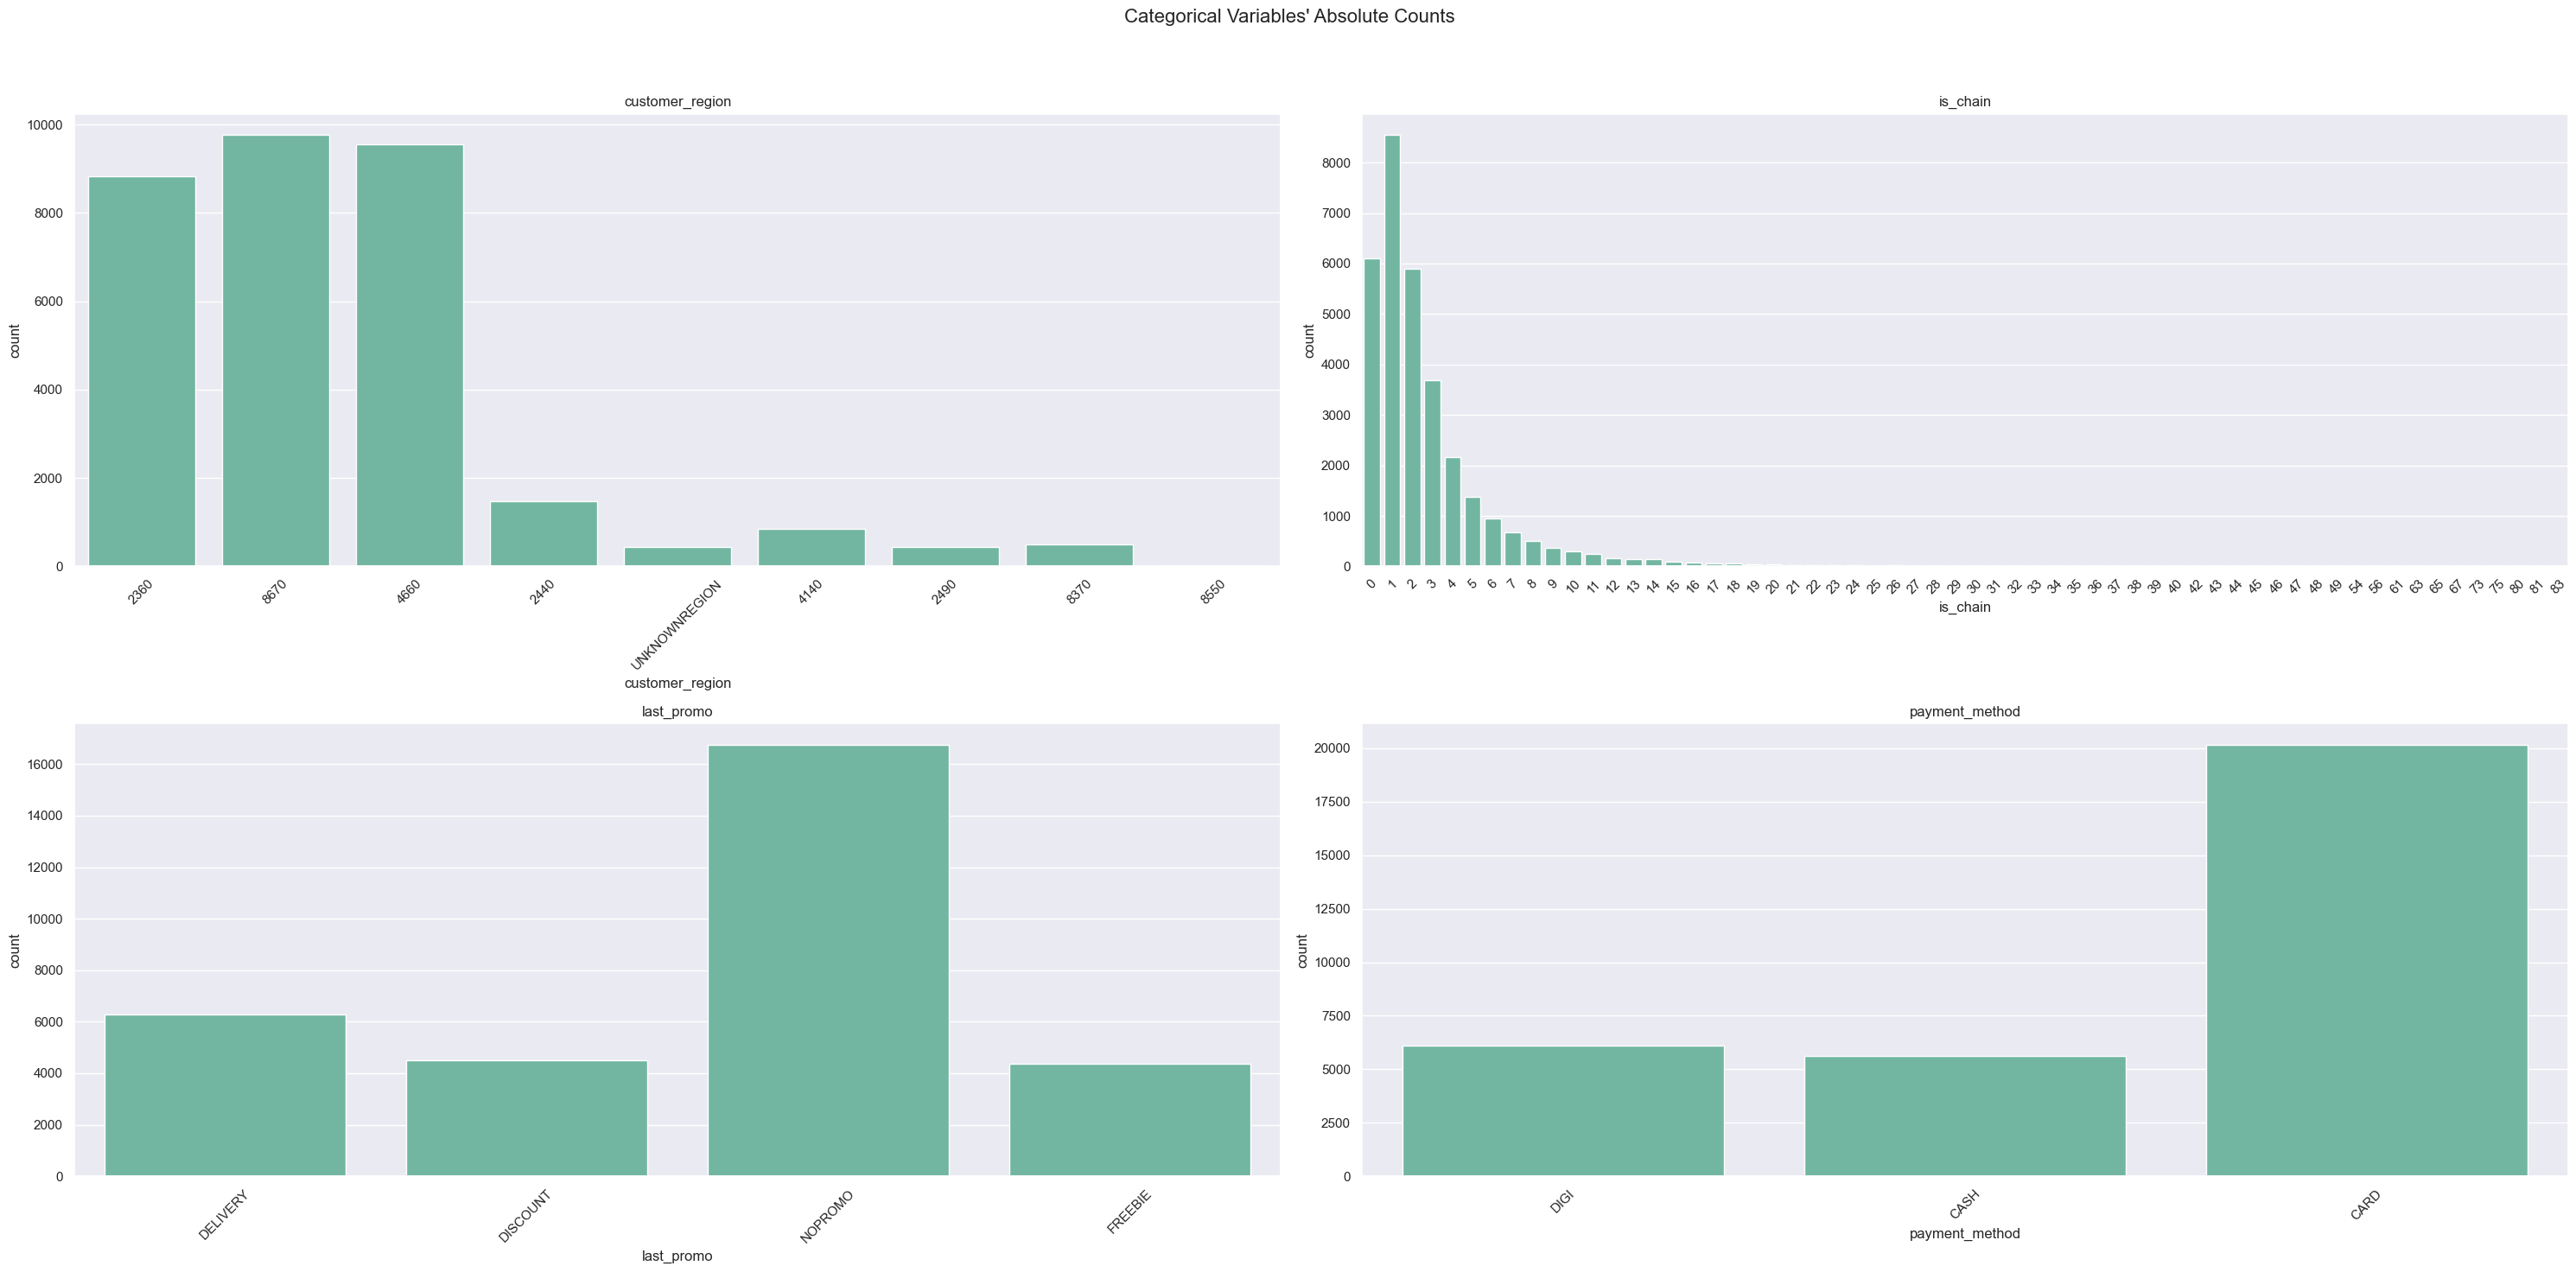

In [57]:
# Plot bar plots of absolute frequencies for categorical variables using a specific color
plot_categorical_frequencies(
    df=df,
    features=non_metric_features,
    title="Categorical Variables' Absolute Counts",
    color_or_palette="#66c2a5",
    figsize=(30, 15),
    rotation=45
)

**Count Plot Analysis: Insights into Customer Behavior**

- **`customer_region`**: 
  - The top three customer regions with the highest number of clients are **"8670"**, **"4660"**, and **"2360"**.
  - Notably, region **"8550"** has a frequency very close to zero, indicating minimal customer activity in this area.

- **`is_chain`**: 
  - The dominant chain is clearly **chain 1**, followed by **chain 0** and **chain 2**.
  - Several chains are relatively infrequent, with values close to zero, suggesting limited customer preference for these chains.

- **`last_promo`**: 
  - The majority of records fall under the **"NOPROMO"** category, indicating that, in most cases, no promotion was offered.
  - Promotions such as **"FREEBIE"** and **"DISCOUNT"** appear less frequently, reflecting limited usage of these promotional types.

- **`payment_method`**: 
  - The **"CARD"** payment method is the most popular among customers.
  - **"DIGI"** and **"CASH"** follow with relatively similar frequencies, indicating a balanced usage of these methods compared to the dominance of card payments.

<a class="anchor" id="section_6_4">

## 6.4 Categorical Variables - Bivariate Analysis

</a>

[Back to 6. Visual Exploration](#section_6)

<a class="anchor" id="section_5_4_1">

### 6.4.1 Customer Region vs Payment Method

</a>

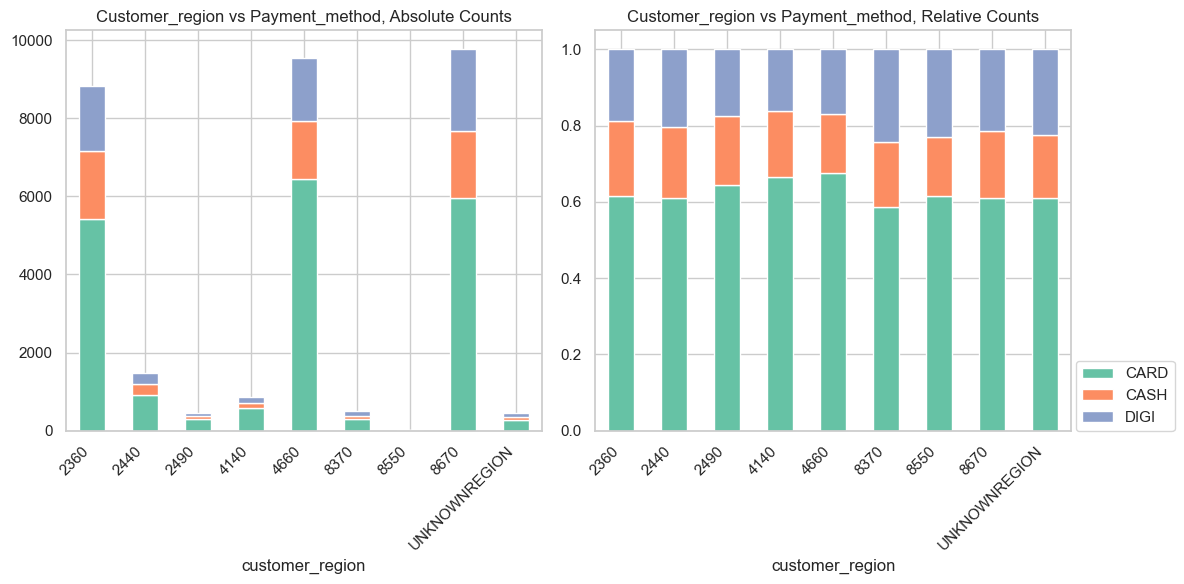

In [58]:
# Plot the relationship between "Customer Region" e "Payment Method" as stacked bar charts (absolute and relative counts)
plot_categorical_relationships(
    df=df,
    cat1="customer_region",
    cat2="payment_method",
    colors=sns.color_palette("Set2"),
    figsize=(12, 6)
)

**Payment Method vs Customer Region Analysis: Absolute and Relative Counts**

**Absolute Count**
- The payment method **"CARD"** is the most frequently used across all regions, maintaining a significant lead over the other two methods.
- Both **"CASH"** and **"DIGI"** have lower absolute counts but are present in all regions.
- Notably, the regions **"UNKNOWNREGION"** and **"8550"** have relatively few transactions compared to other regions, highlighting their lower customer activity.

**Relative Count**
- Across all regions, the payment method **"CARD"** consistently ranks as the most frequently used, followed by **"DIGI"** and then **"CASH"**.
- The relative preference for the **"CARD"** method is both high and consistent, indicating a uniform trend among customers across regions in favor of this payment method.
- These findings suggest that **geographic location** does not significantly influence the preference for **"CARD"**, as customers in all regions show a strong inclination towards this payment method.


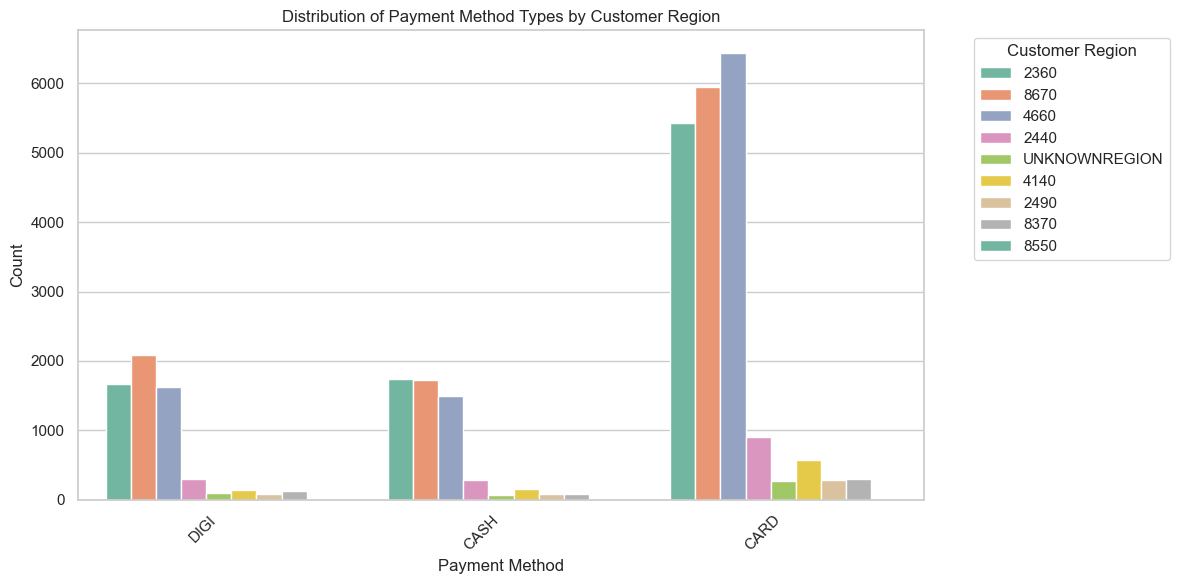

In [59]:
# Plot the countplot for 'Payment Method' with 'Customer Region' as a hue
plot_countplot_with_hue(
    df=df,
    x_column='payment_method',
    hue_column='customer_region',
    title='Distribution of Payment Method Types by Customer Region',
    xlabel='Payment Method',
    ylabel='Count',
    palette='Set2',  # Seaborn palette
    figsize=(12, 6),
    rotation=45,
    ha='right',
    legend_title='Customer Region',
    legend_bbox_to_anchor=(1.05, 1),
    legend_loc='upper left'
)

**Key Findings**

1. **Card Dominance (`CARD`)**
- **"CARD"** is the most frequently used payment method, particularly in regions **4660**, **2360**, and **8670**.
- This dominance suggests a strong customer preference for the **convenience** and **security** offered by card payments.

2. **Digital Payments (`DIGI`)**
- Digital payments are significant but less frequent than card payments.
- Regions **8670** and **2360** lead in the use of digital methods, reflecting the growing **acceptance of digital payment technologies** in these areas.

3. **Low Cash Usage (`CASH`)**
- Cash payments are the least common across all regions, indicating a **shift towards digital transactions**.
- The **`UNKNOWNREGION`** category, which represents customers from unspecified locations, shows a low frequency of cash payments. Similarly, regions **2490**, **4140**, and **8370** also have minimal cash usage.

4. **Regional Differences**
- Regions **2360**, **8670**, and **4660** report high transaction volumes, suggesting **strong economic activity** or a **larger customer base**.
- Smaller regions, such as **2440** and the unspecified **`UNKNOWNREGION`**, exhibit a more **diversified distribution** of payment methods, with no single method dominating.

<a class="anchor" id="section_6_4_2">

### 6.4.2 Customer Region vs Last Promo
[Back to 6.4. Categorical Variables-Bivariate Analysis](#section_6_4)<br>

</a>

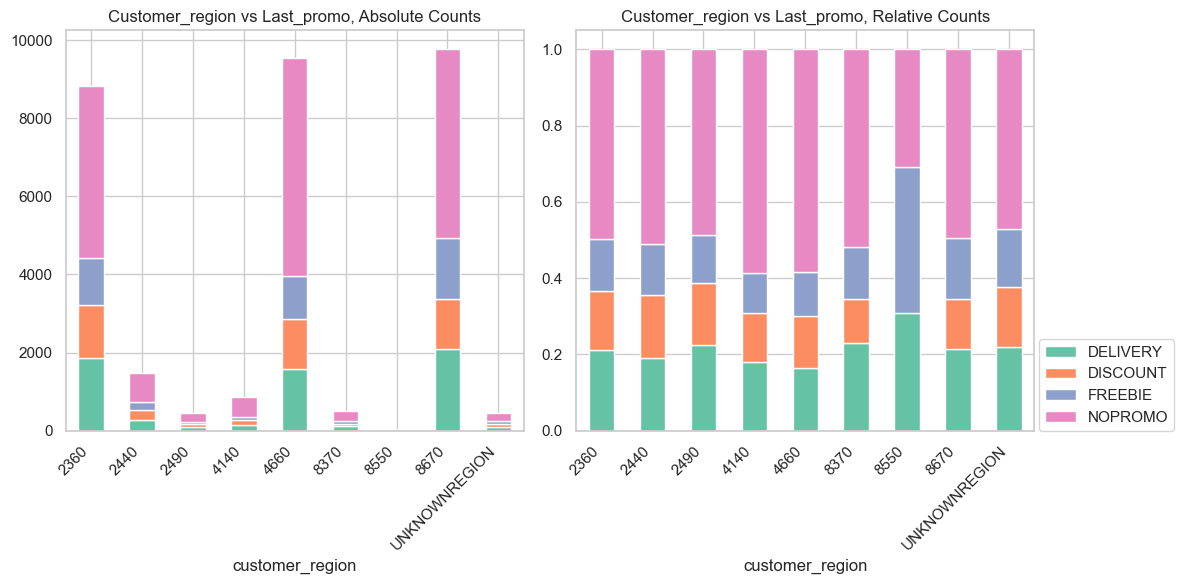

In [60]:
# Plot the relationship between "Customer Region" e "Last Promotion" as stacked bar charts (absolute and relative counts)
plot_categorical_relationships(
    df=df,
    cat1 = 'customer_region',
    cat2 = 'last_promo',
    colors=sns.color_palette("Set2"),
    figsize=(12, 6)
)

**Last Promotion vs Customer Region Analysis: Absolute and Relative Counts**

**Absolute Count:**
- The majority of transactions fall under the **"NOPROMO"** category, with regions **"2360"** and **"4660"** reporting the highest number of these transactions.

**Relative Count:**
- Across all regions, **NOPROMO** transactions dominate, representing a significant proportion of total transactions. The relative distribution is consistent across regions, with **NOPROMO** (highlighted in red) being the most common, followed by **DELIVERY** (blue), and **FREEBIE** (green) transactions.
- This consistency suggests that most transactions in each region do not involve promotions, but when promotions are applied, they follow a similar distribution pattern across regions.


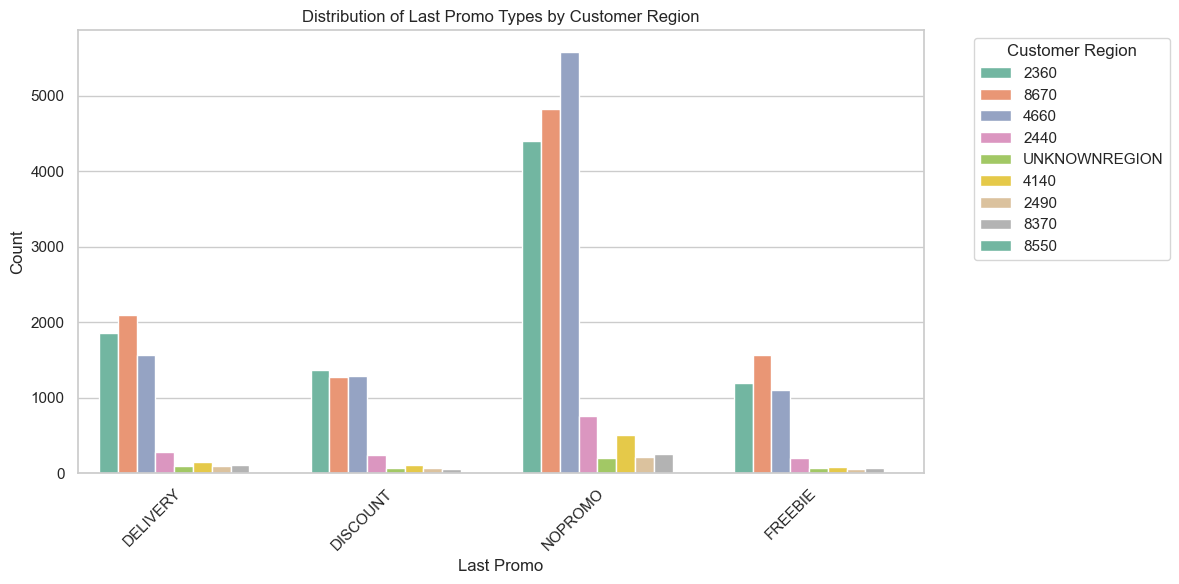

In [61]:
# Plot the countplot for 'Last Promotion' with 'Customer Region' as a hue
plot_countplot_with_hue(
    df=df,
    x_column='last_promo',
    hue_column='customer_region',
    title='Distribution of Last Promo Types by Customer Region',
    xlabel='Last Promo',
    ylabel='Count',
    palette='Set2',  # Seaborn palette
    figsize=(12, 6),
    rotation=45,
    ha='right',
    legend_title='Customer Region',
    legend_bbox_to_anchor=(1.05, 1),
    legend_loc='upper left'
)

**Key Findings**

1. **High Frequency of No Promotion (`NOPROMO`)**
    - The **"NOPROMO"** category is the most common across all regions, particularly in **4660**, **8670**, and **2360**.
    - This suggests that a significant portion of customers are either not motivated by recent promotions or have not been targeted with promotional offers.

2. **Delivery Promotion (`DELIVERY`)**
    - Delivery-based promotions are widely used, especially in regions **8670**, **2360**, and **4660**.
    - This indicates that customers in these regions value delivery services as a key promotional incentive.

3. **Discount Promotion (`DISCOUNT`)**
    - Discount promotions have moderate usage, particularly in regions **2360** and **4660**.
    - This suggests that discounts are an effective promotional tool in these areas, though they are less prevalent compared to **"NOPROMO"** or **`DELIVERY`** promotions.

4. **Freebie Promotion (`FREEBIE`)**
    - Freebie promotions are less common but are notable in regions **2360**, **8670**, and **4660**.
    - Their lower frequency suggests they are used more selectively, likely targeting specific customer segments as part of a strategic promotional approach.

5. **Unspecified Customer Region (`UNKNOWNREGION`)**
    - The **`UNKNOWNREGION`** category shows low counts across all promotion types, similar to regions with smaller customer bases, such as **2490** and **4140**.
    - This could reflect fewer customers from unspecified locations or less promotional targeting in these areas.

6. **Regional Differences**
    - Regions **2360**, **8670**, and **4660** report higher transaction volumes across all promotion types, indicating larger or more active customer bases.
    - In contrast, smaller regions like **2440** and **2490** display lower and more varied use of promotions, suggesting differences in customer demographics or promotional strategies.


<a class="anchor" id="section_6_5">

## 6.5 Numeric Variables vs Categorical Variables

</a>

[Back to 6. Visual Exploration](#section_6)

<a class="anchor" id="section_6_5_1">

### 6.5.1 Histograms

</a>

[Back to 6. Visual Exploration](#section_6)

c:\Users\Rafael\Desktop\DM project 9-12-2024\functions.py:1218: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


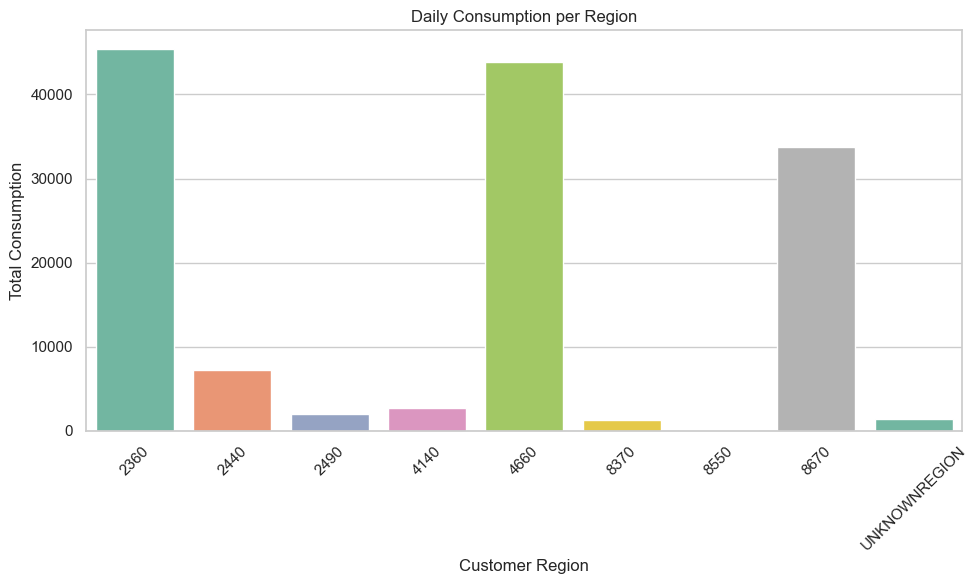

In [62]:
# Plot the daily consumption per region using aggregated data
plot_aggregated_values_by_category(
    df=df,
    group_by_column='customer_region',
    value_column='total_products_by_day',
    aggregation='sum',
    title='Daily Consumption per Region',
    xlabel='Customer Region',
    ylabel='Total Consumption',
    palette='Set2',
    figsize=(10, 6),
    rotation=45
)

**Daily consumption per Region**

The analysis of the chart highlights the following key points:

1. **Regions with Highest Consumption**
- Three main regions stand out for their high daily consumption levels: **Region 2360**, **Region 4660**, and **Region 8670**.
  - **Region 2360** and **Region 4660** both report daily consumption values exceeding **40,000**.
  - **Region 8670** follows with a daily consumption value slightly above **30,000**.
- A significant gap exists between these top-consuming regions and the lower-consuming ones, suggesting notable **regional disparities** in consumption patterns.

2. **Other Regions (2440, 2490, 4160, 8370, 8550)**
- The remaining regions exhibit much lower consumption levels, all below **10,000**.
- Several potential factors could explain these low values:
  1. **Operational Challenges**: The company may face issues in these areas, leading to a lower frequency of orders.
  2. **Customer Base**: These regions might have fewer customers or a lower average consumption volume per customer.

3. **UNKNOWNREGION**
- The region labeled **"UNKNOWNREGION"** also shows a low daily consumption value.
- This label likely represents transactions that cannot be linked to a specific region due to **data errors** or ustomers who are not categorized **geographically**.

<br>**Conclusion**

The chart reveals that **Region 2360** and **Region 4660** are critical markets, showcasing the highest total consumption levels. **Region 8670**, with its moderate consumption, represents a market with growth potential and may benefit from further investment. Conversely, the regions with very low consumption values might warrant strategic decisions like **Scaling back operations** in these areas, or **Exploring opportunities for market expansion**, depending on the company's long-term objectives.


c:\Users\Rafael\Desktop\DM project 9-12-2024\functions.py:1218: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


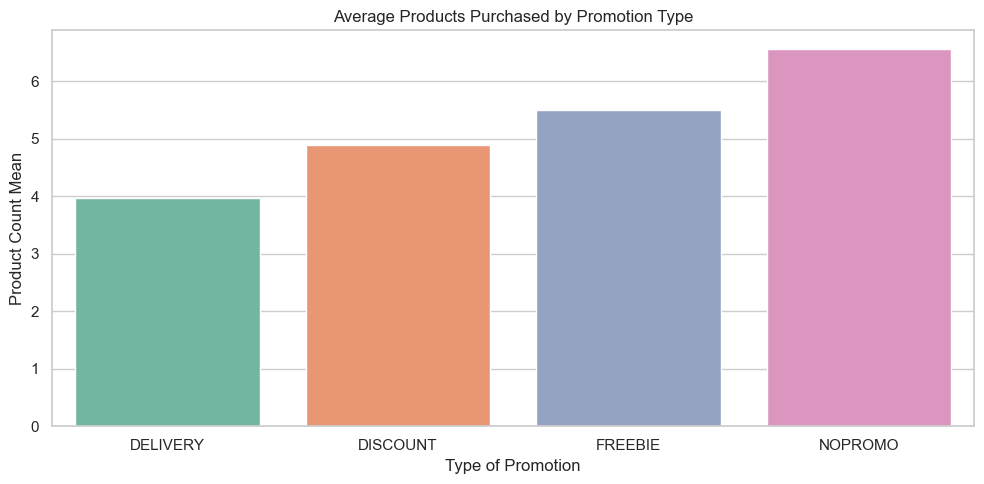

In [63]:
# Plot the average number of products purchased by promotion type using aggregated data
plot_aggregated_values_by_category(
    df=df,
    group_by_column='last_promo',
    value_column='product_count',
    aggregation='mean',
    title='Average Products Purchased by Promotion Type',
    xlabel='Type of Promotion',
    ylabel='Product Count Mean',
    palette='Set2',
    figsize=(10, 5),
    rotation=0
)

**Average Products Purchased by Promotion Type**

The analysis of the bar plot reveals that **NOPROMO** stands out significantly in terms of purchase volumes. This behavior can be attributed to several factors:

1. **Customer Loyalty**: Consumers may be loyal to specific products or cuisine types that are not currently on promotion, leading them to make regular purchases without discounts.

2. **Limited Appeal of Promotions**: Existing promotions might not resonate with all customers. For example the promotions may target **group orders** or require purchasing multiple items (e.g., combo meals), which may not suit individual preferences.

3. **Popularity of Non-Promotional Items**: Highly-rated cuisines or popular chains might not offer promotions, encouraging customers to buy from them at full price due to their perceived value or reputation.

4. **Smaller Orders with Promotions**: Customers who use promotions like **FREEBIE** might place **smaller, more frequent orders**, reducing their average purchase volume compared to those not using promotions.

This behavior suggests that while promotions generate interest, a substantial segment of customers continues to make regular purchases without discounts. This is likely driven by **product preference**, **brand loyalty**, or the **perceived value** of the items, indicating that promotions alone may not be the primary driver of customer behavior.

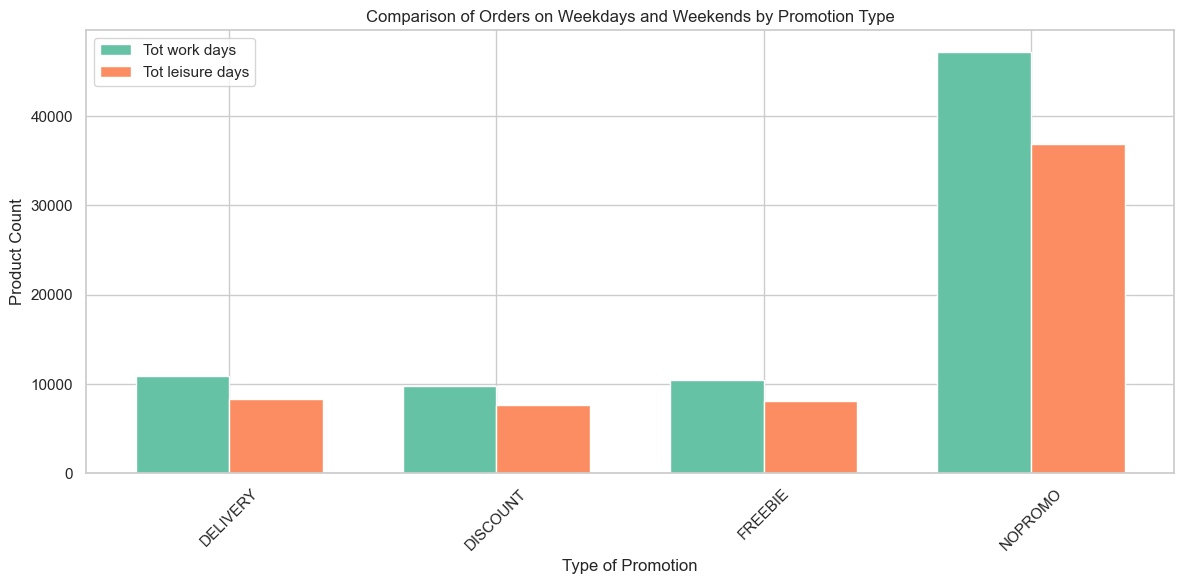

The most used promotion on work days is : NOPROMO
The most used promotion on leisure days is: NOPROMO


In [64]:
plot_grouped_bar_chart(
    df=df,
    group_by_column='last_promo',
    value_columns=['tot_work_days', 'tot_leisure_days'],
    bar_width=0.35,
    title="Comparison of Orders on Weekdays and Weekends by Promotion Type",
    xlabel="Type of Promotion",
    ylabel="Product Count",
    colors=['#66c2a5', '#fc8d62'],
    figsize=(12, 6),
    rotation=45
)

# Find the most used promotion for weekdays and weekends
max_results = calculate_max_by_group(
    df=df,
    group_by_column='last_promo',
    value_columns=['tot_work_days', 'tot_leisure_days']
)

# # Print the results
print(f"The most used promotion on work days is : {max_results['tot_work_days']}")
print(f"The most used promotion on leisure days is: {max_results['tot_leisure_days']}")


**Comparison of Orders on Weekdays and Weekends by Promotion Type** <br>

The analysis of the chart reveals the following insights:

1. **Larger Order Volumes on Weekdays**
   - Across all promotion categories (**DELIVERY**, **DISCOUNT**, **FREEBIE**, and **NOPROMO**), order volumes are consistently higher on **weekdays** compared to weekends. This suggests that customers are more likely to place orders during the workweek, potentially driven by routines related to work, convenience, or weekday schedules.

2. **Relatively Low Impact of Specific Promotions**
   - Promotion-specific categories such as **DELIVERY**, **DISCOUNT**, and **FREEBIE** exhibit significantly lower order volumes compared to **NOPROMO**, both on weekdays and weekends. This may indicate that these promotions are less appealing to customers than anticipated, or that many customers prefer ordering independently of promotional offers.

3. **Higher Appeal of Promotions on Weekdays**
   - The difference in order volumes between weekdays and weekends is noticeable across all promotion types but is particularly pronounced for the **NOPROMO** category. This suggests that weekdays are generally more favorable for orders, regardless of promotions, and that promotional strategies may be more effective when targeted at weekday customers.

<br>**Marketing Solutions**

1. **Reevaluate Promotions**
   - The low engagement with current promotions suggests a need to reassess their appeal. Consider introducing alternative campaigns that better resonate with customer preferences, particularly for **weekends**, where order volumes are lower.

2. **Focus on Weekdays**
   - To maximize order volumes, direct marketing efforts and promotions toward **weekdays**, when customers are more likely to engage with your campaigns. Examples include offering **lunch specials** or **quick delivery discounts** that align with customers' weekday routines, encouraging more frequent orders and increasing overall engagement.

<a class="anchor" id="section_6_5_2">

### 6.5.2 Boxplots

</a>

[Back to 6. Visual Exploration](#section_6)

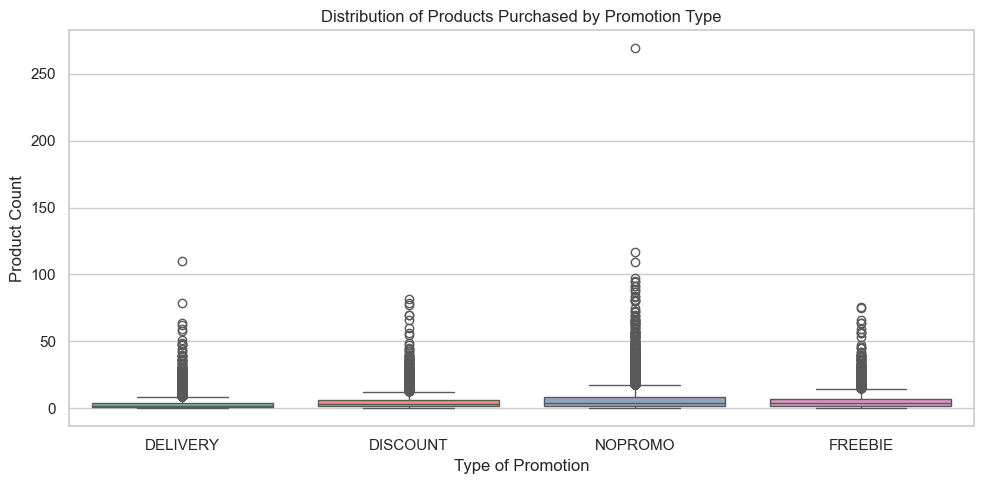

F-Statistic: 242.1103194796198, P-Value: 2.386800213994077e-155


In [65]:
# Plot a boxplot for the specified columns
plot_boxplot(
    df=df,
    x_column='last_promo',
    y_column='product_count',
    hue_column='last_promo',
    palette='Set2',
    figsize=(10, 5),
    title='Distribution of Products Purchased by Promotion Type',
    xlabel='Type of Promotion',
    ylabel='Product Count',
    rotation=0
)

#  Perform statistical analysis using ANOVA test
f_stat, p_value = perform_anova(df=df, group_column='last_promo', value_column='product_count')

# Print the results
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

**Distribution of Products Purchased by Promotion Type**

The analysis of the box plot provides the following insights:

1. **Outliers**: Individual points outside the whiskers represent **outliers**. The whiskers typically extend up to **1.5 times the interquartile range (IQR)**, so values beyond this range are classified as outliers. Outliers are present in all promotion categories but are particularly prominent in the **NOPROMO** category.

2. **Median**: The **median**, representing the central value of the data, is less influenced by outliers compared to the mean. Across all promotion categories, the median is located in the **lower zone of the distributions**, indicating that most orders contain a **low quantity of products**.

3. **Quantiles**: In all categories, the first quartile (**Q1**) and third quartile (**Q3**) have **low values**, meaning that 75% of orders consist of a small number of products; the values exceeding the third quartile are classified as **outliers**, representing larger orders. These outliers suggest that while large orders occur occasionally, they constitute a **minority** of the total orders.

4. **ANOVA Test**: The **F statistic** obtained was **242.11**, measuring the difference in the average quantities of products purchased between promotion groups relative to the variation within each group, this result indicates a **significant difference** between the means of the groups, suggesting that the type of promotion **influences the number of products purchased**. The **p-value** was extremely low (approximately **0**), indicating that it is highly unlikely the observed differences between group means are due to random variation.

c:\Users\Rafael\Desktop\DM project 9-12-2024\functions.py:1396: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_column, y=filter_column, data=concatenated_data, palette=palette)


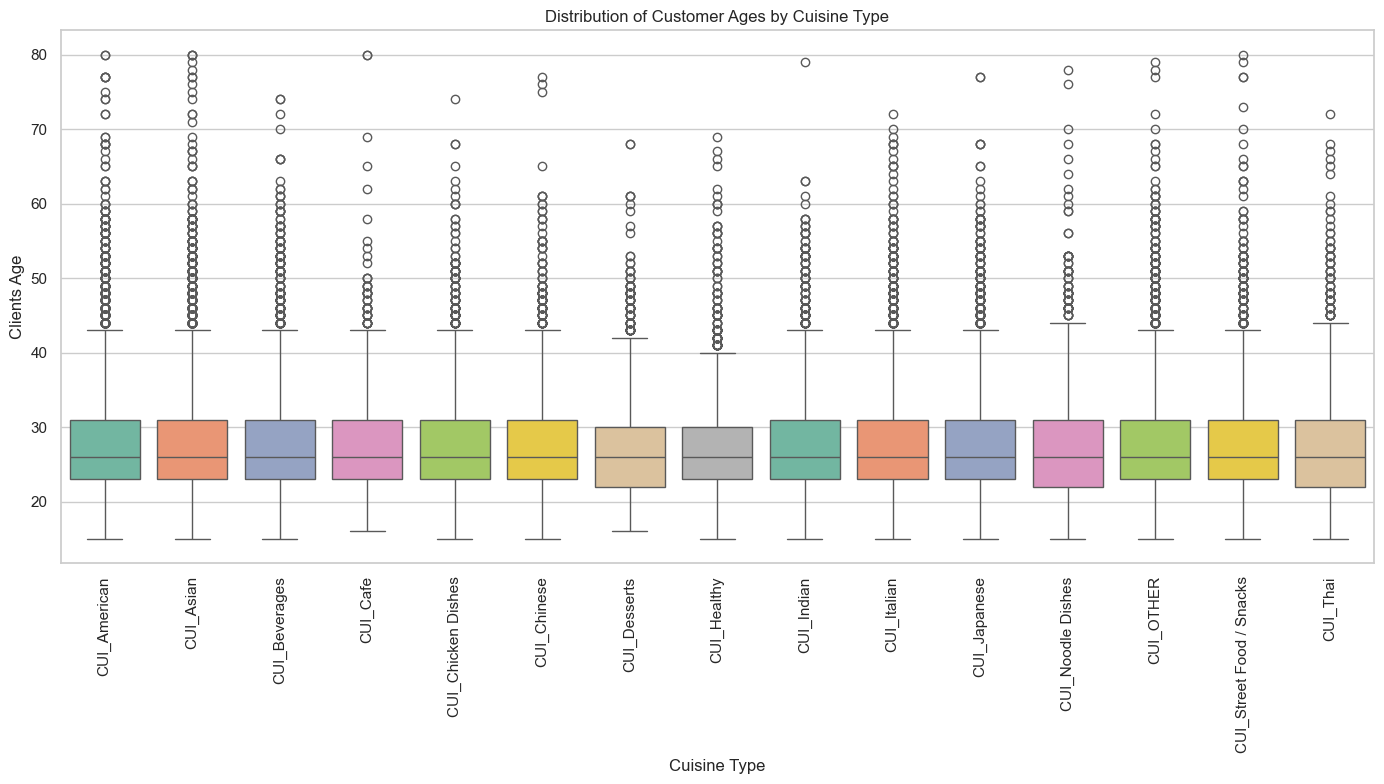

In [66]:
# Plot the distribution of Customer Ages by Cuisine Type
plot_boxplot_by_grouped_columns(
    df=df,
    columns=cuisine_cols,
    filter_column='customer_age',
    y_column='cuisine',
    figsize=(14, 8),
    palette="Set2",
    title='Distribution of Customer Ages by Cuisine Type',
    xlabel='Cuisine Type',
    ylabel='Clients Age',
    rotation=90
)

**Distribution of Customer Ages by Cuisine Type**

1. The **median** customer age across nearly all cuisine categories is between **25 and 35 years**, indicating that most customers fall within this age range regardless of cuisine type.

2. The **quantiles** show that the height of the boxes is relatively consistent across categories, suggesting a uniform age distribution among customers of different cuisines.

3. The **whiskers** extend from approximately **18 years to 50 years** across all cuisine types, highlighting that the majority of customers are within this age range.

4. Regarding outliers, each cuisine category includes customers exceeding 60 or 70 years of age. Although most customers are between **20 and 40 years old**, these outliers reveal a smaller but notable older demographic that engages with various cuisine types.

c:\Users\Rafael\Desktop\DM project 9-12-2024\functions.py:1330: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x_column, y=y_column, data=df, hue=hue_column, palette=palette, legend=False)


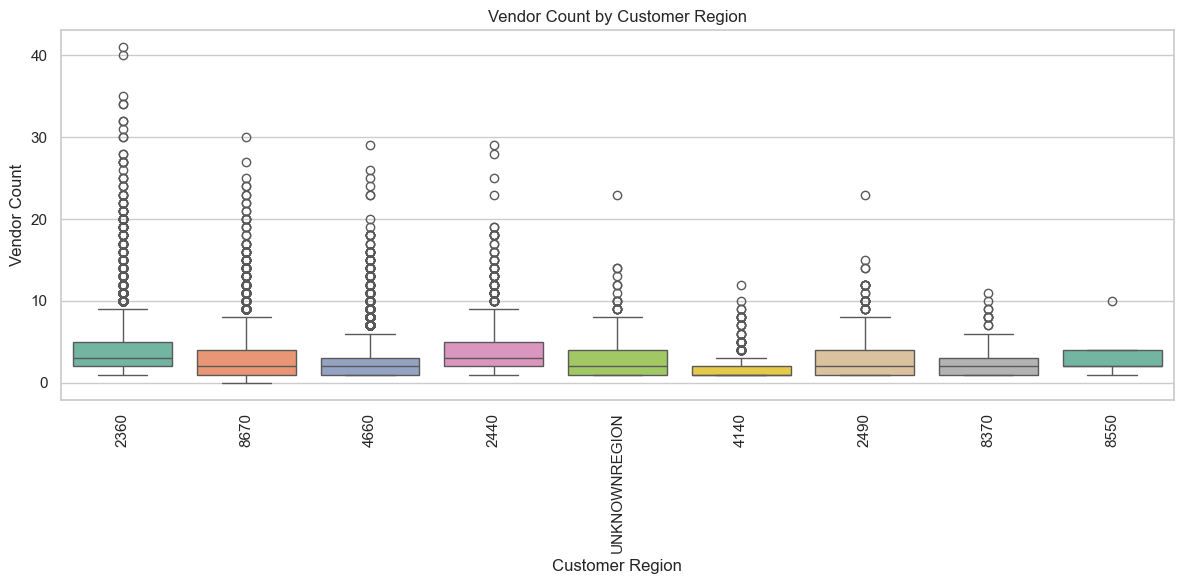

In [67]:
# Box plot to analyze the vendor count across different customer regions
plot_boxplot(
    df=df,
    x_column='customer_region',
    y_column='vendor_count',
    hue_column=None,
    palette='Set2',
    figsize=(12, 6),
    title='Vendor Count by Customer Region',
    xlabel='Customer Region',
    ylabel='Vendor Count',
    rotation=90
)

 **Vendor Count by Customer Region**
1. The **median** vendor count across all regions is approximately **5**, indicating that most customers have access to around five vendors in their respective regions.

2. The **quantiles** (Q1 to Q3) show a similar range across all regions, reflecting a relatively consistent distribution of vendors among the different areas.

3. Analyzing the **whiskers**, we observe that in regions **2360 and 8670**, they extend up to about **10 vendors**, suggesting that most customers in these regions have access to fewer than **10 vendors**.

4. Regarding outliers, individual points beyond the whisker limits are visible in all regions. However, regions **2360 and 8670** show a higher number of outliers, with some reaching up to 30 or 40 vendors. This indicates that a subset of customers in these areas has access to a significantly greater number of vendors compared to the majority.

<div class="alert alert-block alert-success">
<a class="anchor" id="section_7">

# 7. Preprocessing

</a>

[Back to ToC](#toc)<br>

</div>

<a class="anchor" id="section_7_1">

## 7.1 Processing decisions for `is_chain` Variable (second part)

</a>

[Back to 7. Preprocessing](#section_7)

In [68]:
# Grouping rare values in the 'is_chain' feature with a threshold of 10 into the category 'Other Chains'
group_rare_values(df, column='is_chain', threshold=10, new_category='Other Chains')

In [69]:
# Verify the new frequency distribution of 'is_chain'
df['is_chain'].value_counts()

is_chain
1               8543
0               6099
2               5892
3               3696
4               2165
5               1380
6                946
7                679
8                500
9                373
10               291
11               248
12               169
13               152
14               138
15                89
Other Chains      87
16                68
18                65
17                55
19                35
20                34
21                29
22                26
24                23
23                20
26                20
27                16
25                14
28                13
29                10
Name: count, dtype: int64

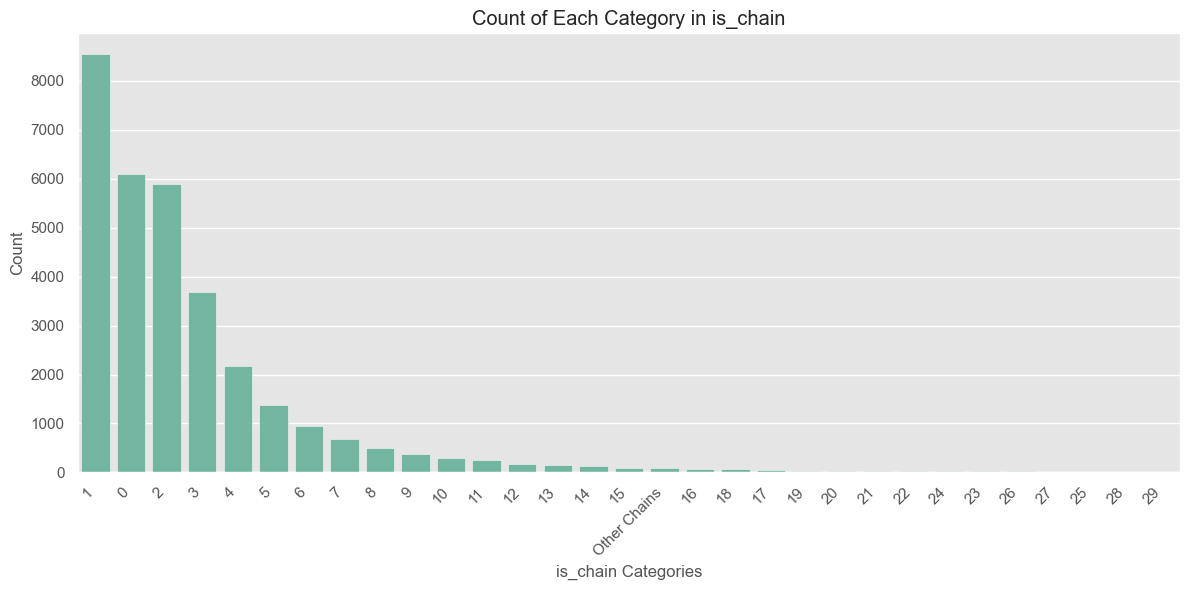

In [70]:
# Plot the distribution of the 'is_chain' feature
plot_category_distribution(
    df, 
    column='is_chain', 
    title='Count of Each Category in is_chain', 
    figsize=(12, 6), 
    rotation=45, 
    color="#66c2a5"
)

To better analyze the `is_chain` variable, categories with fewer than 10 occurrences were grouped under a single category called "Other Chains." This adjustment simplifies the dataset, allowing for a sharper focus on chain preferences while retaining key insights. By spotlighting the most popular chains, the analysis provides actionable insights for targeted strategies.

**Key Observations:**
- **Popularity Concentration:** A small number of chains, specifically `0`, `1`, `2`, and `3`, dominate customer orders. This highlights a clear preference for familiar, well-known options.
- **Streamlined Analysis:** Consolidating rare chains into "Other Chains" reduced the dataset's complexity, making it easier to focus on the major players.
- **Long Tail Dynamics:** The data follows a long-tail distribution, with a few chains capturing the majority of orders while many others have minimal activity. This justifies prioritizing the most popular chains for future marketing efforts.

**Summary:**
This reclassification emphasizes customer loyalty to leading chains and simplifies the analysis without losing important details. By balancing clarity and detail, this approach not only sharpens the focus on high-demand chains but also creates opportunities for refined marketing strategies targeting these top performers.


<a class="anchor" id="section_7_2">

## 7.2 Missing Values Imputation

</a>

[Back to 7. Preprocessing](#section_7)

<a class="anchor" id="section_7_2_1">

### 7.2.1 Numeric Features

</a>

In [71]:
df_original = df.copy()

In [72]:
df_original.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'dif_order', 'tot_CUI',
       'tot_work_days', 'tot_leisure_days', 'total_products_by_week',
       'total_products_by_day', 'tot_early_morning', 'tot_breakfast',
       'tot_lunch', 'tot_afternoon', 'tot_dinner', 'tot_late_night',
       'tot_western_cuisines', 'tot_orient

In [73]:
non_metric_features

['customer_region', 'is_chain', 'last_promo', 'payment_method']

In [74]:
# Define metric and non-metric features.
metric_features = ['customer_age',
 'vendor_count',
 'product_count',
 'first_order',
 'last_order',
 'dif_order',
 'tot_CUI',
 'tot_work_days',
 'tot_leisure_days',
 'total_products_by_week',
 'total_products_by_day',
 'tot_early_morning',
 'tot_breakfast',
 'tot_lunch',
 'tot_afternoon',
 'tot_dinner',
 'tot_late_night',
 'tot_western_cuisines',
 'tot_oriental_cuisines',
 'tot_other_cuisines',
 'purchased_cuisines']

non_metric_features= ['customer_region',
 'is_chain',
 'last_promo',
 'payment_method']

unused_features = [i for i in df.columns if i not in (metric_features+non_metric_features) ]

In [75]:
# Identify columns with NaN values
columns_with_nan = df.columns[df.isna().any()].tolist()
columns_with_nan

['customer_age', 'first_order', 'dif_order']

In [76]:
# Calculate the means of the columns with NaN values
df[columns_with_nan].mean()

customer_age    27.507545
first_order     28.469924
dif_order       35.414901
dtype: Float64

In [77]:
# Calculate the medians of the columns with NaN values
df[columns_with_nan].median()

customer_age    26.0
first_order     22.0
dif_order       34.0
dtype: Float64

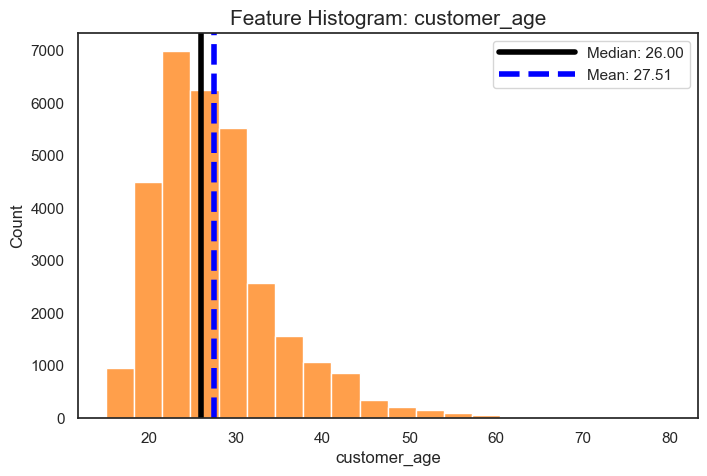

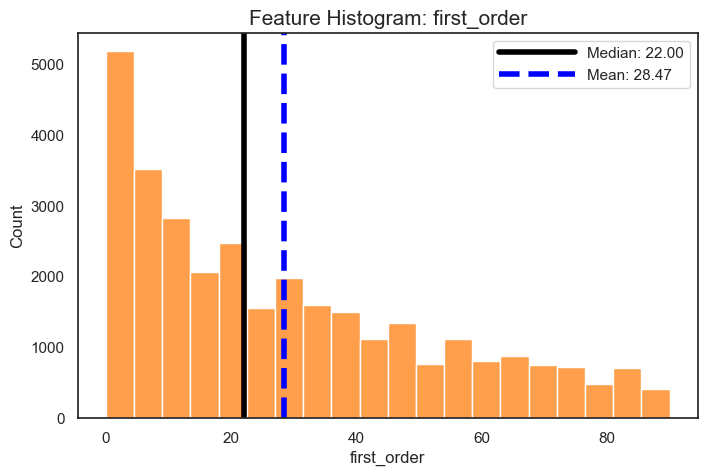

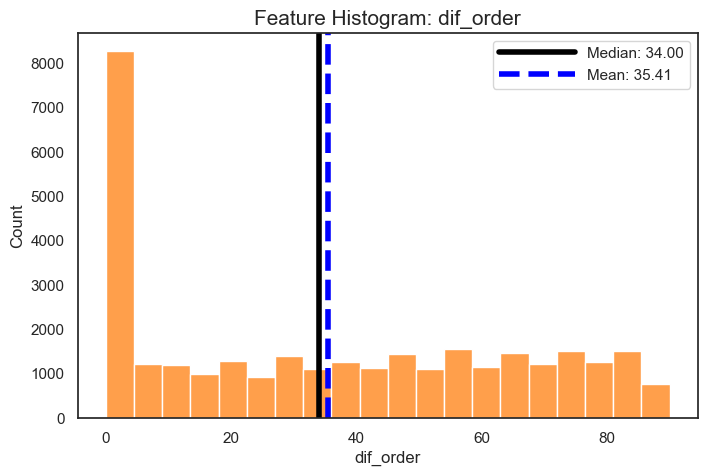

In [78]:
plot_histograms_with_mean_median(df, columns_with_nan, "Feature Histogram")

**Missing Value Imputation Strategy**

To address missing values in the variables **`customer_age`**, **`first_order`**, and **`dif_order`**, specific strategies were employed based on each variable's distribution and characteristics. Below are the details and justifications for these decisions:

1. **`customer_age`**: The distribution is slightly skewed, with most values concentrated between **20 and 30 years**, while the difference between the mean (**27.51**) and median (**26**) is small, the **median** was chosen for imputation as it is more robust to outliers (e.g., older customers) and better reflects the central tendency of the data.

2. **`first_order`**: This variable is highly skewed, with a large concentration of values in the **first 20 days** and a gradual spread for higher values. The mean (**28.47**) is influenced by larger values, while the **median** (**22**) aligns better with the majority of the data. The median was selected as it represents the central tendency more effectively for this skewed distribution.

3. **`dif_order`**: This variable represents the difference in days between the last and the first order. Missing values in this variable correspond to missing values in the variables from which it is derived. As such, **`dif_order`** will be recalculated based on the available data for **`first_order`** and **`last_order`**. This ensures accurate imputation without introducing arbitrary values.

In [79]:
fill_missing_values(df, column_name='customer_age', method='median')
fill_missing_values(df, column_name='first_order', method='median')

In [80]:
# Recalculate the difference between last order and first order
df['dif_order'] = (df['last_order'] - df['first_order'])

<a class="anchor" id="section_7_2_2">

### 7.2.2 Categorical Features

</a>

In [81]:
# Replace value "UNKNOWNREGION" with nan.
clean_and_fill_with_mode(df=df, column='customer_region', replace_values=["UNKNOWNREGION"], mode_fill=True)

print(df['customer_region'].mode())

0    8670
Name: customer_region, dtype: object


<a class="anchor" id="section_7_3">

## 7.3 Outlier removal

</a>

[Back to 7. Preprocessing](#section_7)

<a class="anchor" id="section_7_3_1">

### 7.3.1 Using the IQR method

</a>

In [82]:
# Compute the IQR
# Calculate Q1, Q3, IQR

q1 = df[metric_features].quantile(.25)
q3 = df[metric_features].quantile(.75)
iqr = (q3 - q1)

# Compute upper and lower limit 

# lower_limit = Q1 -1.5*IQR
lower_lim = q1 - (1.5 * iqr)

# upper_limit = Q3 + 1.5*IQR
upper_lim = q3 + (1.5 * iqr)

limits_table = create_limits_table(q1, q3, iqr, lower_lim, upper_lim)
limits_table

Q1 (25%)  Q3 (75%)    IQR  Lower Limit  Upper Limit
customer_age                23.0      31.0    8.0         11.0         43.0
vendor_count                 1.0       4.0    3.0         -3.5          8.5
product_count                2.0       7.0    5.0         -5.5         14.5
first_order                  7.0      45.0   38.0        -50.0        102.0
last_order                  49.0      83.0   34.0         -2.0        134.0
dif_order                    3.0      62.0   59.0        -85.5        150.5
tot_CUI                    12.88     44.97  32.09      -35.255       93.105
tot_work_days                1.0       3.0    2.0         -2.0          6.0
tot_leisure_days             1.0       2.0    1.0         -0.5          3.5
total_products_by_week       2.0       5.0    3.0         -2.5          9.5
total_products_by_day        2.0       5.0    3.0         -2.5          9.5
tot_early_morning            0.0       0.0    0.0          0.0          0.0
tot_breakfast                0.0       1.0    1.0         -1.5          2.5
tot_lunch                    0.0       1.0    1.0         -1.5          2.5
tot_afternoon                0.0       1.0    1.0         -1.5          2.5
tot_dinner                   0.0       1.0    1.0         -1.5          2.5
tot_late_night               0.0       0.0    0.0          0.0          0.0
tot_western_cuisines         0.0     16.36  16.36       -24.54         40.9
tot_oriental_cuisines        0.0     23.29  23.29      -34.935       58.225
tot_other_cuisines           0.0     10.57  10.57      -15.855       26.425
purchased_cuisines           1.0       3.0    2.0         -2.0          6.0

In [83]:
# def remove_outliers_iqr(df, features):
#     for feature in features:
#         Q1 = df[feature].quantile(0.25)  # First quartile (25%)
#         Q3 = df[feature].quantile(0.75)  # Third quartile (75%)
#         IQR = Q3 - Q1  # Interquartile range

#         # Calculate the boundaries
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Filter values within the boundaries
#         df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
#     return df

# # Apply the function to the dataframe
# df_cleaned = remove_outliers_iqr(df, metric_features)

# # Exibe o resultado
# print(f"Percentage of data remaining: {(len(df_cleaned) / len(df)) * 100} %")

Initially, the **IQR method** was applied for outlier removal. However, this approach led to a significant loss of data, excluding valuable observations that carried critical insights. Recognizing that many of these outliers represent meaningful trends or rare phenomena, we revised our strategy. A **manual approach** was adopted to handle missing values and outliers. This method allowed us to preserve more data while maintaining the integrity and relevance of our analysis. By balancing statistical rigor with domain-specific insights, this approach ensured that key trends and unique patterns were not overlooked, enabling a more comprehensive understanding of the dataset.

<a class="anchor" id="section_7_3_2">

### 7.3.2 Manual Removel

</a>

In [84]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'dif_order', 'tot_CUI',
       'tot_work_days', 'tot_leisure_days', 'total_products_by_week',
       'total_products_by_day', 'tot_early_morning', 'tot_breakfast',
       'tot_lunch', 'tot_afternoon', 'tot_dinner', 'tot_late_night',
       'tot_western_cuisines', 'tot_orient

In [85]:
df

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360            18             2              5   
5d272b9dcb             8670            17             2              2   
f6d1b2ba63             4660            38             1              2   
180c632ed8             4660            26             2              3   
4eb37a6705             4660            20             2              5   
...                     ...           ...           ...            ...   
f4e366c281             8670            30             1              1   
f6b6709018             8670            26             1              1   
f74ad8ce3f             8670            24             1              1   
f7b19c0241             8670            34             1              1   
fd40d3b0e0             4660            30             1              1   

            is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                               
1b8f824d5e         1            0           1   DELIVERY           DIGI   
5d272b9dcb         2            0           1   DISCOUNT           DIGI   
f6d1b2ba63         2            0           1   DISCOUNT           CASH   
180c632ed8         1            0           2   DELIVERY           DIGI   
4eb37a6705         0            0           2    NOPROMO           DIGI   
...              ...          ...         ...        ...            ...   
f4e366c281         1           22           0    FREEBIE           DIGI   
f6b6709018         0           22           0   DELIVERY           DIGI   
f74ad8ce3f         1           22           0    NOPROMO           DIGI   
f7b19c0241         0           22           0   DISCOUNT           DIGI   
fd40d3b0e0         0           22           0    NOPROMO           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00           0.00       0.0   
5d272b9dcb          12.82       6.39           0.00       0.0   
f6d1b2ba63           9.20       0.00           0.00       0.0   
180c632ed8           0.00      13.70           0.00       0.0   
4eb37a6705          14.57      40.87           0.00       0.0   
...                   ...        ...            ...       ...   
f4e366c281           0.00       0.00          18.04       0.0   
f6b6709018          18.04       0.00           0.00       0.0   
f74ad8ce3f           0.00       0.00           0.00       0.0   
f7b19c0241           0.00      12.03           0.00       0.0   
fd40d3b0e0           0.00       0.00           0.00       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0          0.00          0.0   
5d272b9dcb                  0.0          0.0          0.00          0.0   
f6d1b2ba63                  0.0          0.0          0.00          0.0   
180c632ed8                  0.0          0.0          0.00          0.0   
4eb37a6705                  0.0          0.0          0.00          0.0   
...                         ...          ...           ...          ...   
f4e366c281                  0.0          0.0          0.00          0.0   
f6b6709018                  0.0          0.0          0.00          0.0   
f74ad8ce3f                  0.0          0.0         17.79          0.0   
f7b19c0241                  0.0          0.0          0.00          0.0   
fd40d3b0e0                  0.0          0.0          0.00          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88         0.00           0.0                0.0   
5d272b9dcb         0.00         

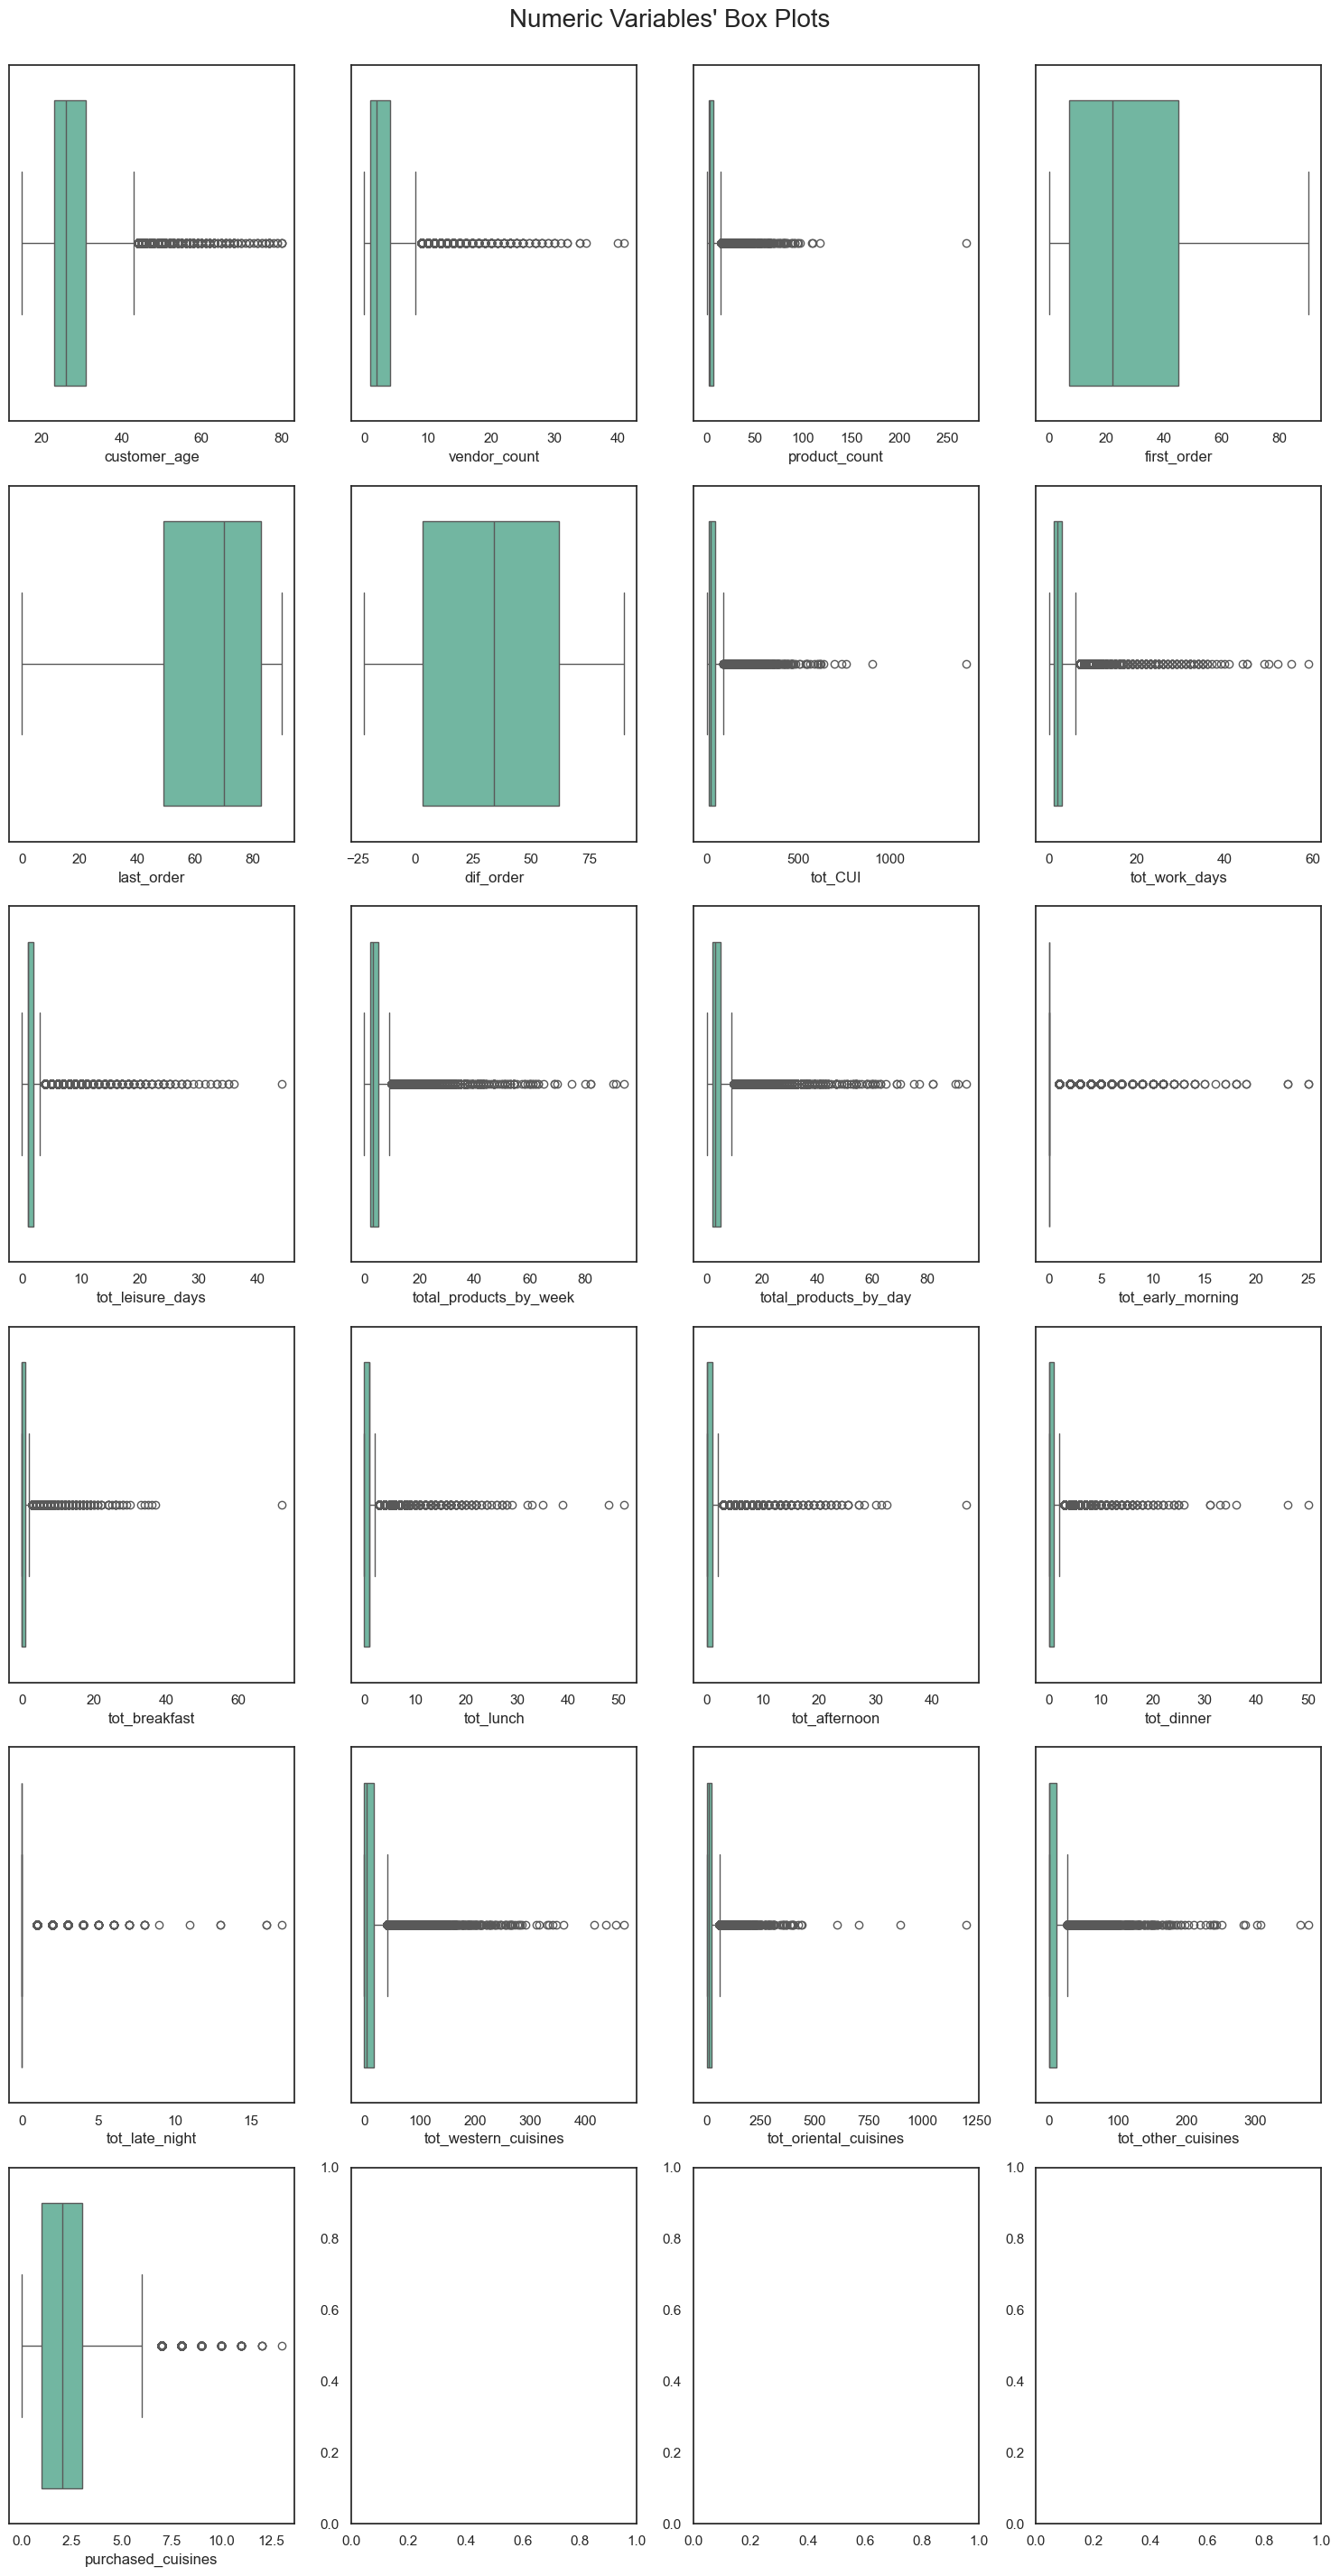

In [86]:
# Plot the boxplots of the new metric features
plot_boxplots(df,"Numeric Variables' Box Plots", metric_features)

In [87]:
df_man = apply_manual_filters(df)

In [88]:
print('Percentage of data kept after removing outliers:', 100*np.round(df_man.shape[0] / df_original.shape[0], 4))

Percentage of data kept after removing outliers: 97.61


In [89]:
print(f"Original data: {df.shape[0]} rows")
print(f"Data after removing values above the 90th percentile: {df_man.shape[0]} rows")

Original data: 31875 rows
Data after removing values above the 90th percentile: 31113 rows


In [90]:
df[new_metric_features].describe()

customer_age  vendor_count  product_count  first_order    last_order  \
count       31875.0  31875.000000   31875.000000      31875.0  31875.000000   
mean      27.473161      3.102714       5.668424    28.448408     63.672376   
std        7.083258      2.771753       6.957933    24.067394     23.227992   
min            15.0      0.000000       0.000000          0.0      0.000000   
25%            23.0      1.000000       2.000000          7.0     49.000000   
50%            26.0      2.000000       3.000000         22.0     70.000000   
75%            31.0      4.000000       7.000000         45.0     83.000000   
max            80.0     41.000000     269.000000         90.0     90.000000   

       dif_order       tot_CUI  tot_work_days  tot_leisure_days  \
count    31875.0  31875.000000   31875.000000      31875.000000   
mean   35.223969     38.295857       2.455749          1.913286   
std    29.552161     46.410657       3.192346          2.443901   
min        -22.0      0.000000       0.000000          0.000000   
25%          3.0     12.880000       1.000000          1.000000   
50%         34.0     24.140000       2.000000          1.000000   
75%         62.0     44.970000       3.000000          2.000000   
max         90.0   1418.330000      59.000000         44.000000   

       total_products_by_week  total_products_by_day  tot_early_morning  \
count            31875.000000                31875.0            31875.0   
mean                 4.369035               4.320345           0.418918   
std                  5.084780               5.049923            1.15975   
min                  0.000000                    0.0                0.0   
25%                  2.000000                    2.0                0.0   
50%                  3.000000                    3.0                0.0   
75%                  5.000000                    5.0                0.0   
max                 94.000000                   94.0               25.0   

       tot_breakfast     tot_lunch  tot_afternoon    tot_dinner  \
count   31875.000000  31875.000000   31875.000000  31875.000000   
mean        0.841757      1.144627       1.024753      0.796831   
std         1.822053      2.036109       1.904752      1.792844   
min         0.000000      0.000000       0.000000      0.000000   
25%         0.000000      0.000000       0.000000      0.000000   
50%         0.000000      1.000000       0.000000      0.000000   
75%         1.000000      1.000000       1.000000      1.000000   
max        72.000000     51.000000      46.000000     50.000000   

       tot_late_night  tot_western_cuisines  tot_oriental_cuisines  \
count    31875.000000          31875.000000           31875.000000   
mean         0.093459             12.823815              17.568962   
std          0.462586             24.209546              29.900524   
min          0.000000              0.000000               0.000000   
25%          0.000000              0.000000               0.000000   
50%          0.000000              3.510000               8.110000   
75%          0.000000             16.360000              23.290000   
max         17.000000            468.330000            1201.270000   

       tot_other_cuisines  purchased_cuisines  
count        31875.000000        31875.000000  
mean             7.903080            2.275263  
std             16.172452            1.484889  
min              0.000000            0.000000  
25%              0.000000            1.000000  
50%              0.000000            2.000000  
75%             10.570000            3.000000  
max            377.320000           13.000000

In [91]:
df_man[new_metric_features].describe()

customer_age  vendor_count  product_count  first_order    last_order  \
count       31113.0  31113.000000   31113.000000      31113.0  31113.000000   
mean      27.470704      2.864623       5.075756    28.986404     63.196767   
std        7.077255      2.191068       5.075036    24.066485     23.271170   
min            15.0      0.000000       0.000000          0.0      0.000000   
25%            23.0      1.000000       2.000000          8.0     49.000000   
50%            26.0      2.000000       3.000000         23.0     70.000000   
75%            31.0      4.000000       6.000000         46.0     83.000000   
max            80.0     24.000000      63.000000         90.0     90.000000   

       dif_order       tot_CUI  tot_work_days  tot_leisure_days  \
count    31113.0  31113.000000   31113.000000      31113.000000   
mean   34.210362     35.673923       2.203195          1.731366   
std    29.116509     38.638122       2.465808          1.954769   
min        -22.0      0.000000       0.000000          0.000000   
25%          2.0     12.660000       1.000000          0.000000   
50%         32.0     23.790000       1.000000          1.000000   
75%         60.0     43.150000       3.000000          2.000000   
max         90.0    474.100000      26.000000         29.000000   

       total_products_by_week  total_products_by_day  tot_early_morning  \
count            31113.000000                31113.0            31113.0   
mean                 3.934561               3.889371           0.410761   
std                  3.778112               3.750337           1.099809   
min                  0.000000                    0.0                0.0   
25%                  2.000000                    2.0                0.0   
50%                  3.000000                    3.0                0.0   
75%                  5.000000                    5.0                0.0   
max                 44.000000                   44.0               19.0   

       tot_breakfast     tot_lunch  tot_afternoon    tot_dinner  \
count   31113.000000  31113.000000   31113.000000  31113.000000   
mean        0.762897      1.011731       0.932151      0.690483   
std         1.490282      1.608715       1.628089      1.426764   
min         0.000000      0.000000       0.000000      0.000000   
25%         0.000000      0.000000       0.000000      0.000000   
50%         0.000000      0.000000       0.000000      0.000000   
75%         1.000000      1.000000       1.000000      1.000000   
max        25.000000     19.000000      20.000000     20.000000   

       tot_late_night  tot_western_cuisines  tot_oriental_cuisines  \
count    31113.000000          31113.000000           31113.000000   
mean         0.081349             12.213314              16.433745   
std          0.384228             21.814527              25.600506   
min          0.000000              0.000000               0.000000   
25%          0.000000              0.000000               0.000000   
50%          0.000000              3.160000               7.590000   
75%          0.000000             15.810000              21.730000   
max          8.000000            246.720000             299.370000   

       tot_other_cuisines  purchased_cuisines  
count        31113.000000        31113.000000  
mean             7.026864            2.152059  
std             13.247921            1.246796  
min              0.000000            0.000000  
25%              0.000000            1.000000  
50%              0.000000            2.000000  
75%              9.600000            3.000000  
max            149.940000            6.000000

In [92]:
df= df_man.copy()

<a class="anchor" id="section_7_4">

## 7.4 Variable selection: Redundancy

</a>

[Back to 7. Preprocessing](#section_7)

<a class="anchor" id="section_7_4_1">

### 7.4.1 Numeric Variables

</a>

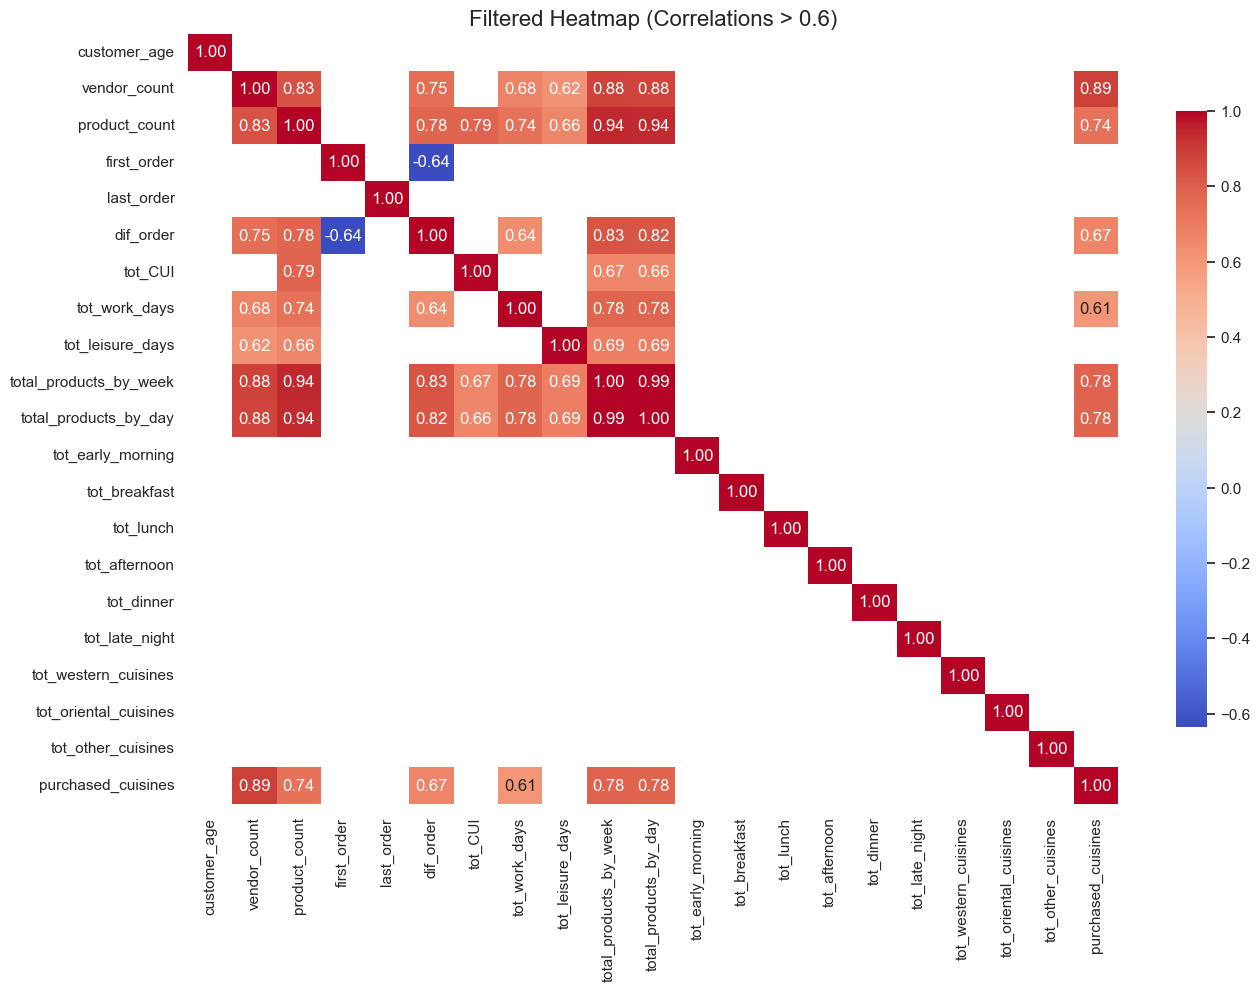

In [93]:
# Plot the heatmap for the spearman correlation matrix of the metric features
plot_filtered_correlation_heatmap(
    df=df,
    features=metric_features,
    method="spearman",
    filter_expr=lambda x: abs(x) > 0.6,
    title="Filtered Heatmap (Correlations > 0.6)",
    figsize=(15, 10),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

To avoid redundancy caused by highly correlated variables, a few features will be removed to ensure the dataset remains balanced and meaningful. The features being removed are `vendor_count`, `product_count`, `total_products_by_day`, and `total_products_by_week`. This approach reduces duplication, simplifies the dataset, and retains the most relevant variables for analysis.

In [94]:
new_metric_features.remove("vendor_count")
new_metric_features.remove("product_count")
new_metric_features.remove("total_products_by_day")
new_metric_features.remove("total_products_by_week")

new_metric_features

['customer_age',
 'first_order',
 'last_order',
 'dif_order',
 'tot_CUI',
 'tot_work_days',
 'tot_leisure_days',
 'tot_early_morning',
 'tot_breakfast',
 'tot_lunch',
 'tot_afternoon',
 'tot_dinner',
 'tot_late_night',
 'tot_western_cuisines',
 'tot_oriental_cuisines',
 'tot_other_cuisines',
 'purchased_cuisines']

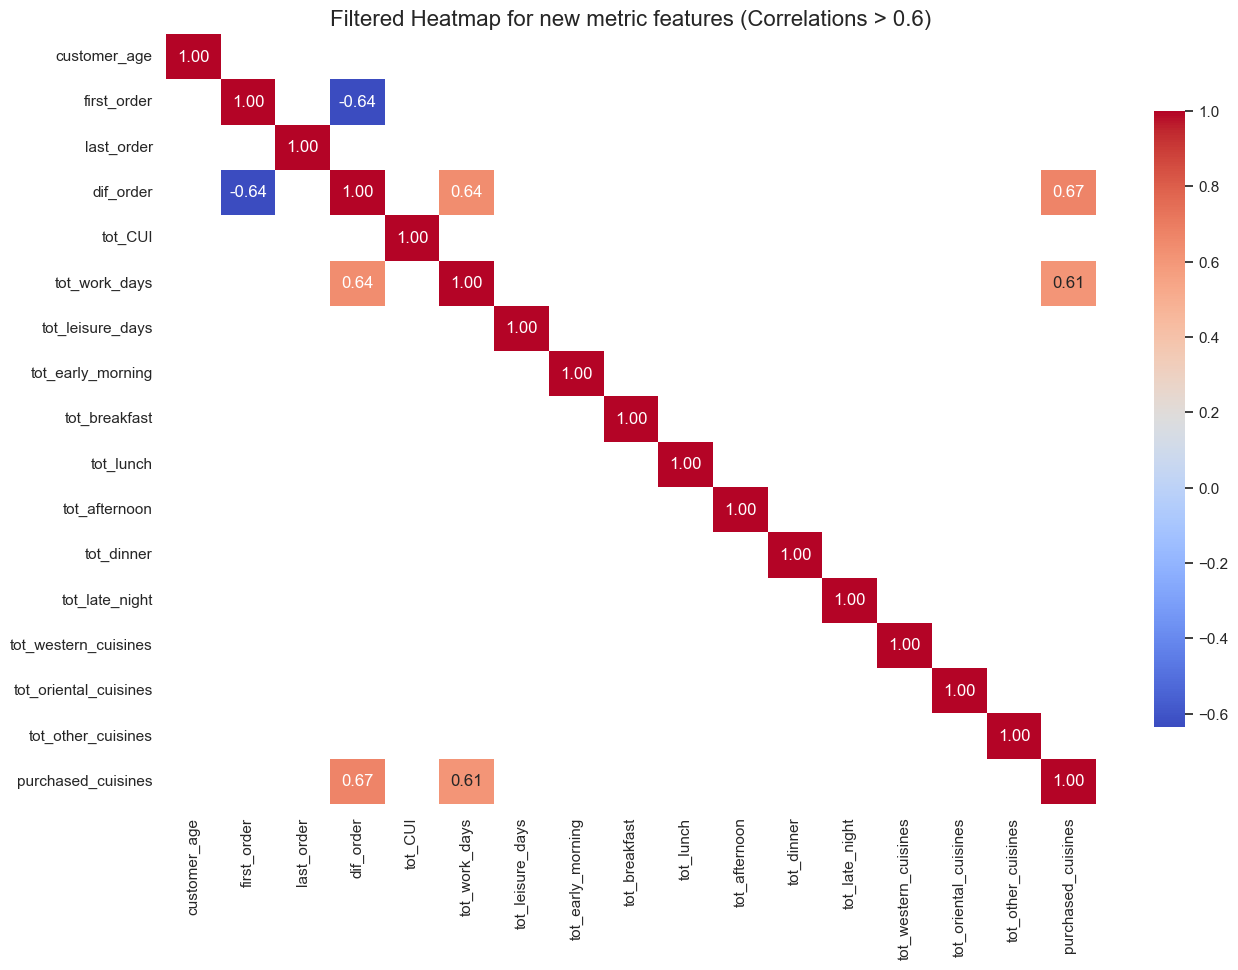

In [95]:
# Plot the heatmap for the spearman correlation matrix of the new metric features
plot_filtered_correlation_heatmap(
    df=df,
    features=new_metric_features,
    method="spearman",
    filter_expr=lambda x: abs(x) > 0.6,
    title="Filtered Heatmap for new metric features (Correlations > 0.6)",
    figsize=(15, 10),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

<a class="anchor" id="section_7_4_2">

### 7.4.2 Categorical Variables

</a>

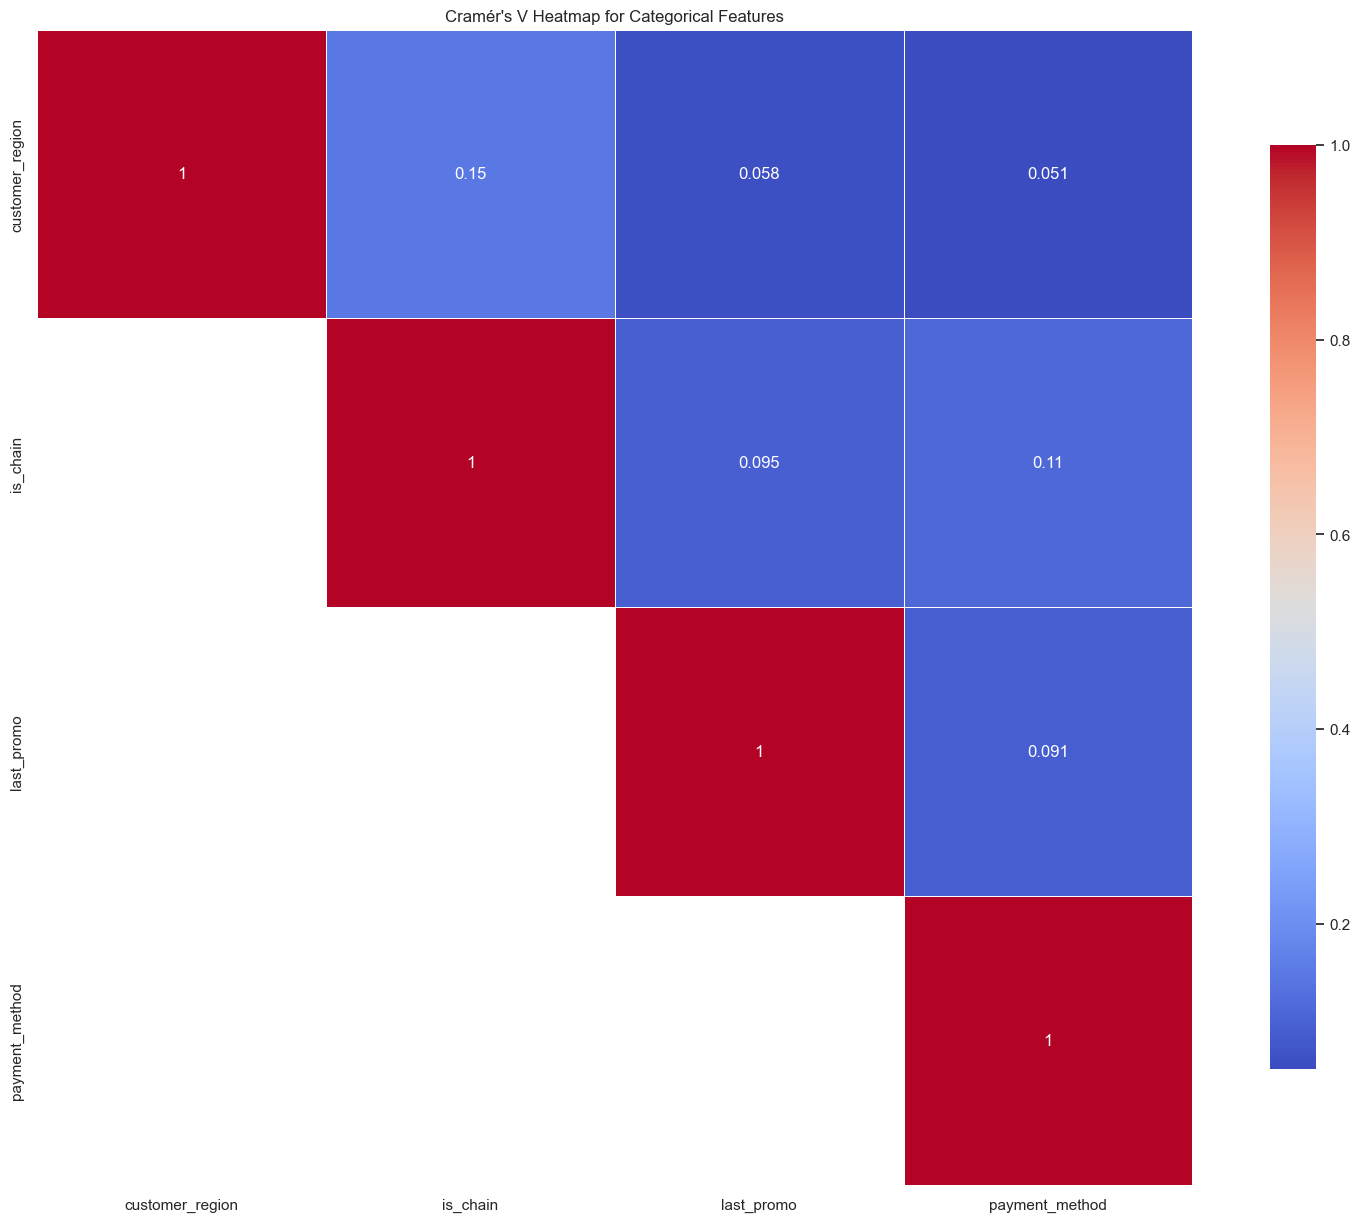

In [96]:
# Plot the Cramer's V heatmap for the categorical features
plot_cramers_v_heatmap(df, categorical_features=non_metric_features, figsize=(20, 15), cmap="coolwarm", annot=True)

The analysis of the Cramér's V matrix indicates that there are no significant associations between the variables, making it difficult to draw meaningful conclusions. After analyzing the charts, we concluded that all remaining variables are significant, and there is no need to remove any additional features beyond those already excluded.

<a class="anchor" id="section_7_5">

## 7.5 Data Normalization

</a>

[Back to 7. Preprocessing](#section_7)

In [97]:
# Standardize the selected metric features directly in the dataframe
df_standard = df.copy()
df_standard[metric_features] = StandardScaler().fit_transform(df_standard[metric_features])

# Display the first few rows of the standardized dataframe
df_standard.head()


customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360     -1.338210     -0.394619      -0.014927   
5d272b9dcb             8670     -1.479510     -0.394619      -0.606066   
f6d1b2ba63             4660      1.487789     -0.851025      -0.606066   
180c632ed8             4660     -0.207810     -0.394619      -0.409020   
4eb37a6705             4660     -1.055610     -0.394619      -0.014927   

            is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                               
1b8f824d5e         1     -1.20445   -2.672739   DELIVERY           DIGI   
5d272b9dcb         2     -1.20445   -2.672739   DISCOUNT           DIGI   
f6d1b2ba63         2     -1.20445   -2.672739   DISCOUNT           CASH   
180c632ed8         1     -1.20445   -2.629767   DELIVERY           DIGI   
4eb37a6705         0     -1.20445   -2.629767    NOPROMO           DIGI   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00            0.0       0.0   
5d272b9dcb          12.82       6.39            0.0       0.0   
f6d1b2ba63           9.20       0.00            0.0       0.0   
180c632ed8           0.00      13.70            0.0       0.0   
4eb37a6705          14.57      40.87            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0           0.0          0.0   
5d272b9dcb                  0.0          0.0           0.0          0.0   
f6d1b2ba63                  0.0          0.0           0.0          0.0   
180c632ed8                  0.0          0.0           0.0          0.0   
4eb37a6705                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88          0.0           0.0                0.0   
5d272b9dcb         0.00          0.0           0.0                0.0   
f6d1b2ba63         0.00          0.0           0.0                0.0   
180c632ed8        17.86          0.0           0.0                0.0   
4eb37a6705         0.00          0.0           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  DOW_1  \
customer_id                                                                
1b8f824d5e         0.0                       0.0       0.0      1      0   
5d272b9dcb         0.0                       0.0       0.0      1      0   
f6d1b2ba63         0.0                       0.0       0.0      1      0   
180c632ed8         0.0                       0.0       0.0      0      1   
4eb37a6705         0.0                       0.0       0.0      0      1   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_2  HR_3  HR_4  \
customer_id                                                                    
1b8f824d5e       0      0      0      0      1     0     0     0     0     0   
5d272b9dcb       0      0      0      0      1     0     0     0     0     0   
f6d1b2ba63       0      0      0      0      1     0     0     0     0     0   
180c632ed8       0      0      0      0      1     0     0     0     0     0   
4eb37a6705       0      0      0      0      1     0     0     0     0     0   

             HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  \
customer_id                                                                    
1b8f824d5e      0     0     0     0     0      0      0      0      0      0   
5d272b9dcb      0     0     0     0     0      1      1      0      0      0   
f6d1b2ba63      0     0     0     0     1      0      1    

In [99]:
# Normalize the selected metric features directly in the dataframe
df_minmax = df.copy()
df_minmax[metric_features] = MinMaxScaler().fit_transform(df_minmax[metric_features])

# Display the first few rows of the normalized dataframe
df_minmax.head()

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360      0.046154      0.083333       0.079365   
5d272b9dcb             8670      0.030769      0.083333       0.031746   
f6d1b2ba63             4660      0.353846      0.041667       0.031746   
180c632ed8             4660      0.169231      0.083333       0.047619   
4eb37a6705             4660      0.076923      0.083333       0.079365   

            is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                               
1b8f824d5e         1          0.0    0.011111   DELIVERY           DIGI   
5d272b9dcb         2          0.0    0.011111   DISCOUNT           DIGI   
f6d1b2ba63         2          0.0    0.011111   DISCOUNT           CASH   
180c632ed8         1          0.0    0.022222   DELIVERY           DIGI   
4eb37a6705         0          0.0    0.022222    NOPROMO           DIGI   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00            0.0       0.0   
5d272b9dcb          12.82       6.39            0.0       0.0   
f6d1b2ba63           9.20       0.00            0.0       0.0   
180c632ed8           0.00      13.70            0.0       0.0   
4eb37a6705          14.57      40.87            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0           0.0          0.0   
5d272b9dcb                  0.0          0.0           0.0          0.0   
f6d1b2ba63                  0.0          0.0           0.0          0.0   
180c632ed8                  0.0          0.0           0.0          0.0   
4eb37a6705                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88          0.0           0.0                0.0   
5d272b9dcb         0.00          0.0           0.0                0.0   
f6d1b2ba63         0.00          0.0           0.0                0.0   
180c632ed8        17.86          0.0           0.0                0.0   
4eb37a6705         0.00          0.0           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  DOW_1  \
customer_id                                                                
1b8f824d5e         0.0                       0.0       0.0      1      0   
5d272b9dcb         0.0                       0.0       0.0      1      0   
f6d1b2ba63         0.0                       0.0       0.0      1      0   
180c632ed8         0.0                       0.0       0.0      0      1   
4eb37a6705         0.0                       0.0       0.0      0      1   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_2  HR_3  HR_4  \
customer_id                                                                    
1b8f824d5e       0      0      0      0      1     0     0     0     0     0   
5d272b9dcb       0      0      0      0      1     0     0     0     0     0   
f6d1b2ba63       0      0      0      0      1     0     0     0     0     0   
180c632ed8       0      0      0      0      1     0     0     0     0     0   
4eb37a6705       0      0      0      0      1     0     0     0     0     0   

             HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  \
customer_id                                                                    
1b8f824d5e      0     0     0     0     0      0      0      0      0      0   
5d272b9dcb      0     0     0     0     0      1      1      0      0      0   
f6d1b2ba63      0     0     0     0     1      0      1    

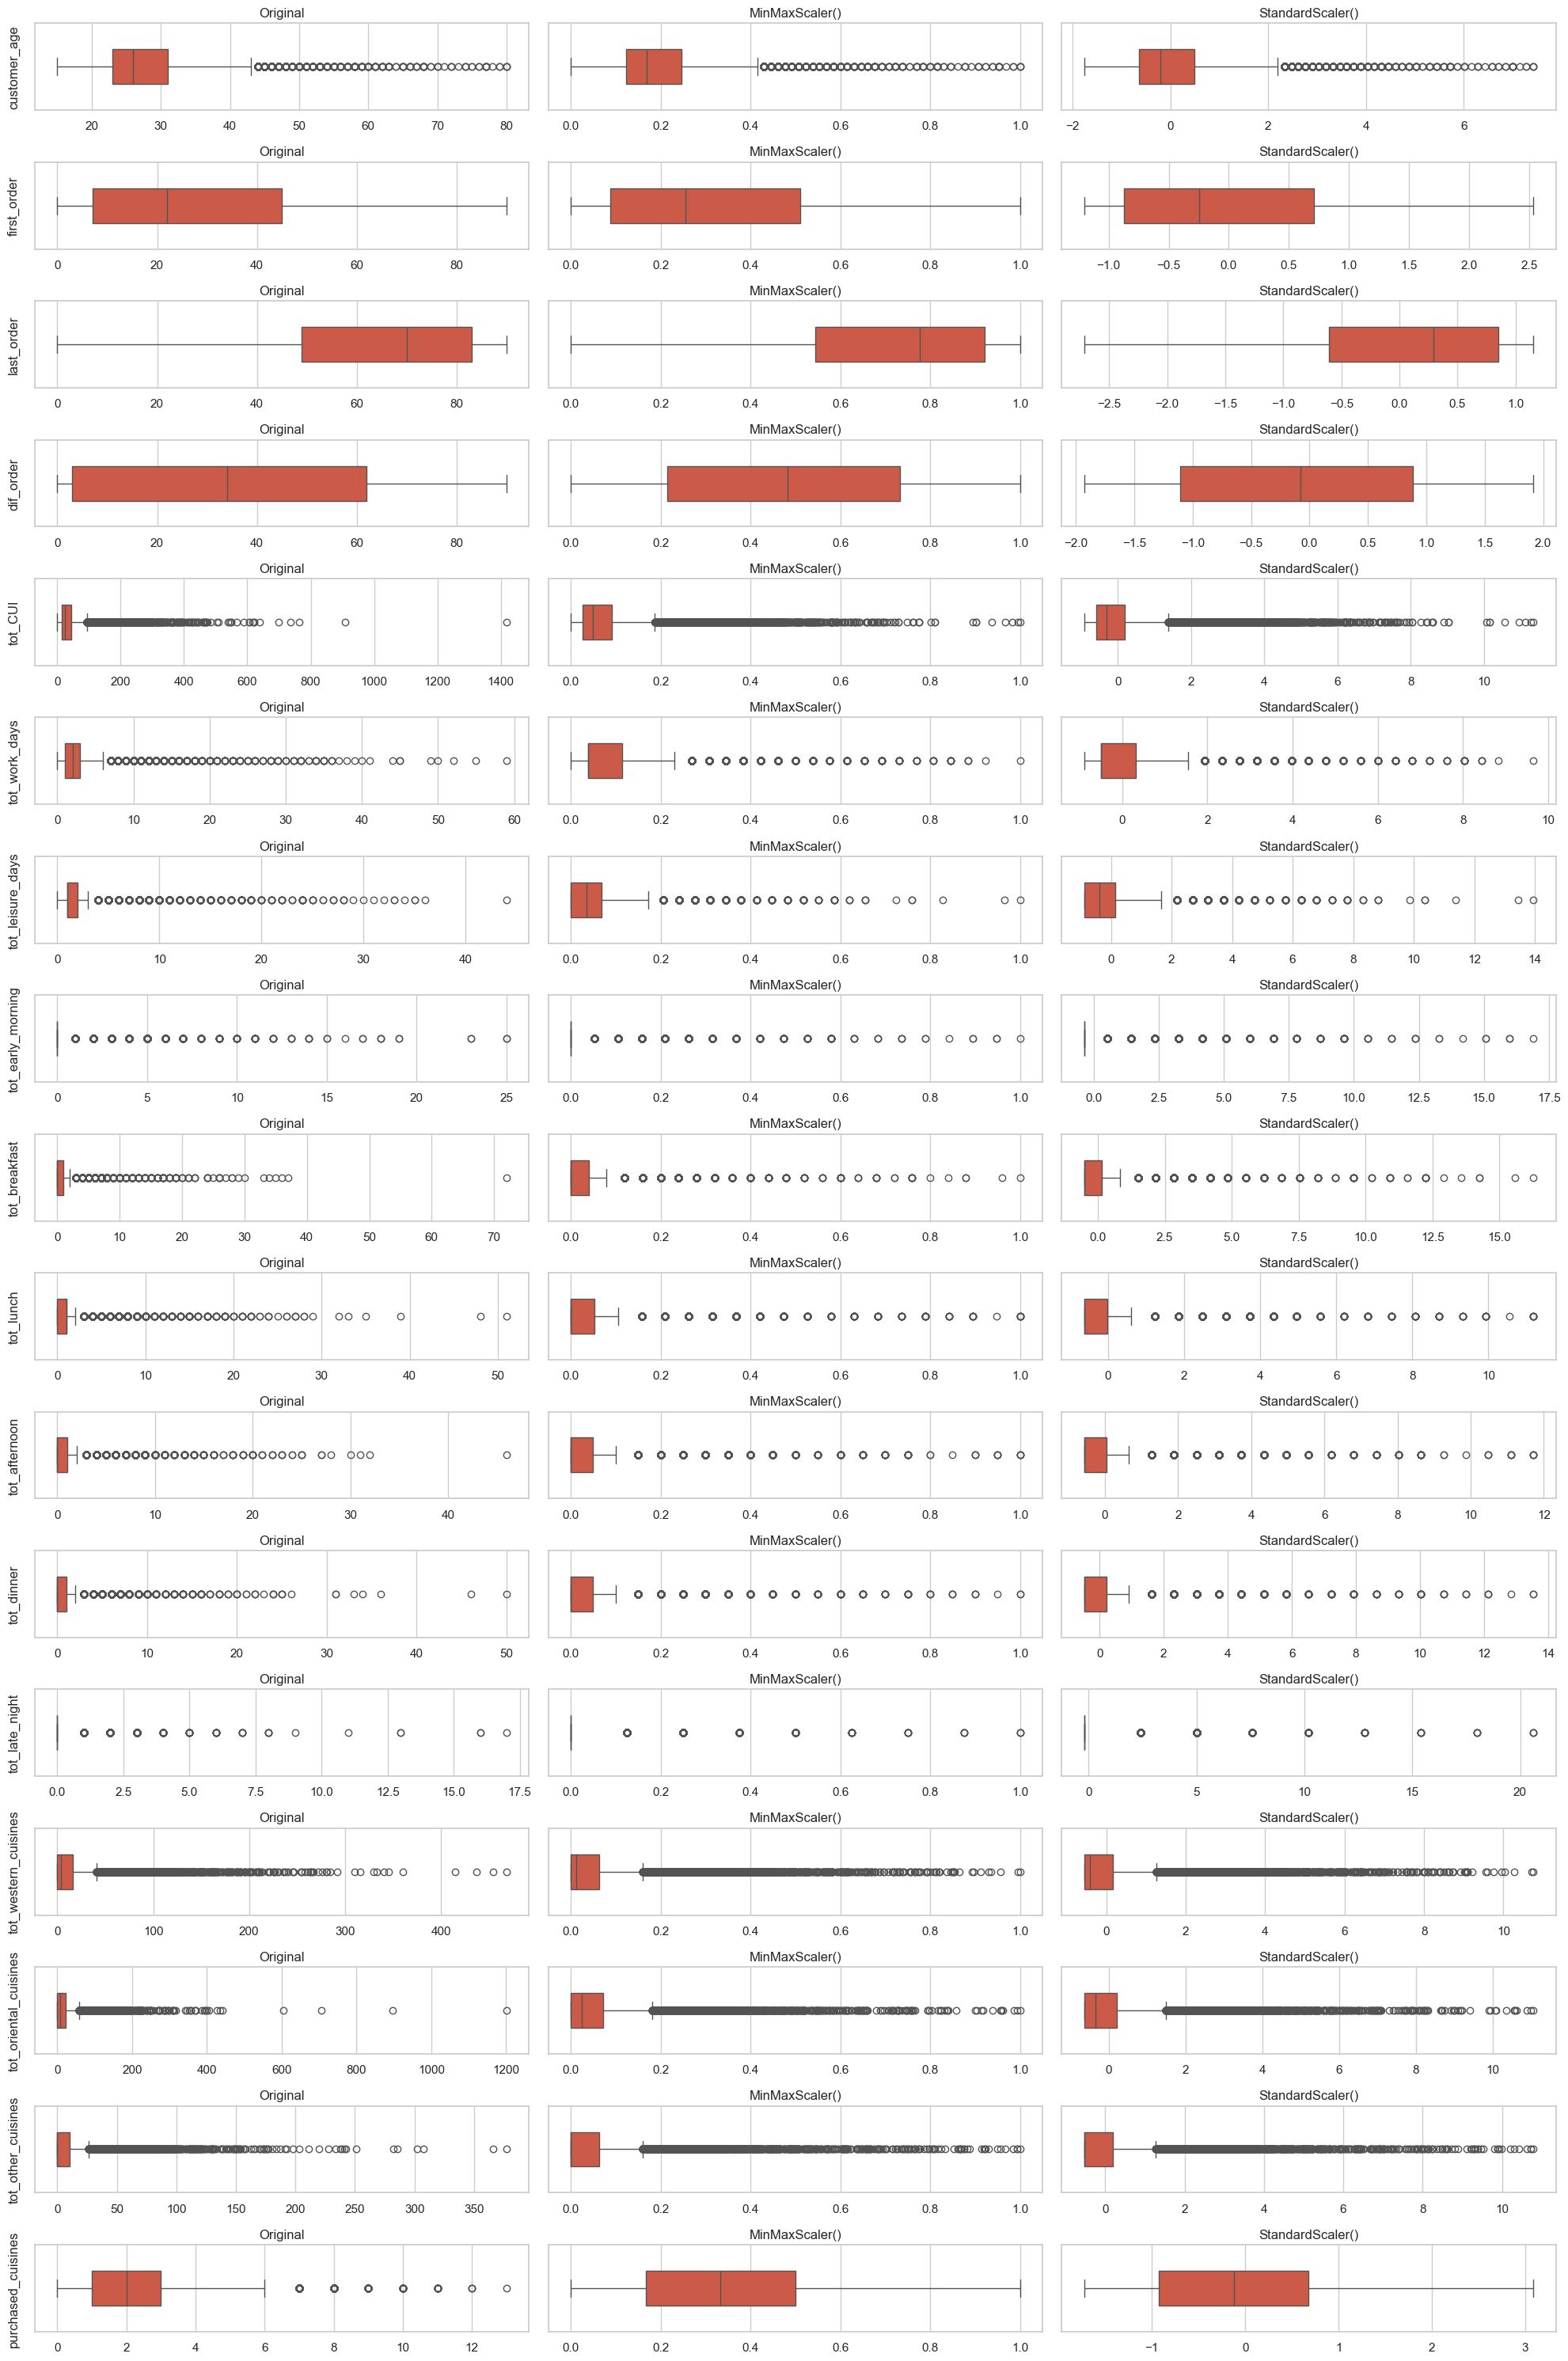

In [ ]:
# Plot the boxplots for the Scaling of Numeric Features
plot_scaled_boxplots(
    df_original=df_original,
    df_minmax=df_minmax,
    df_standard=df_standard,
    features=new_metric_features,
    figsize=(20, 30)
)

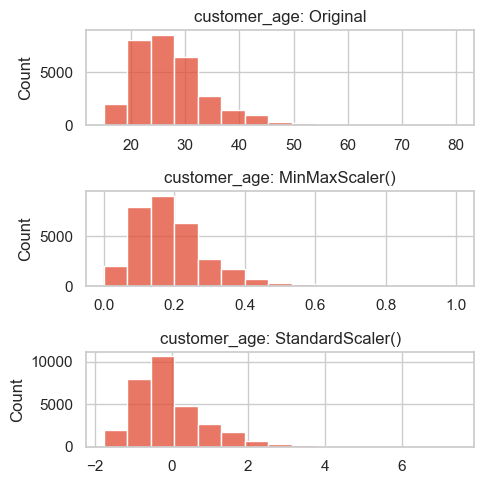

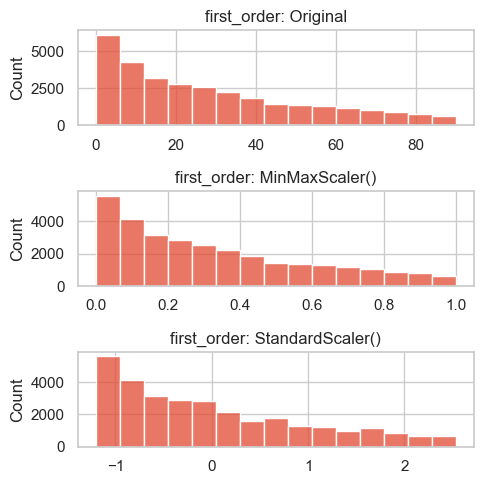

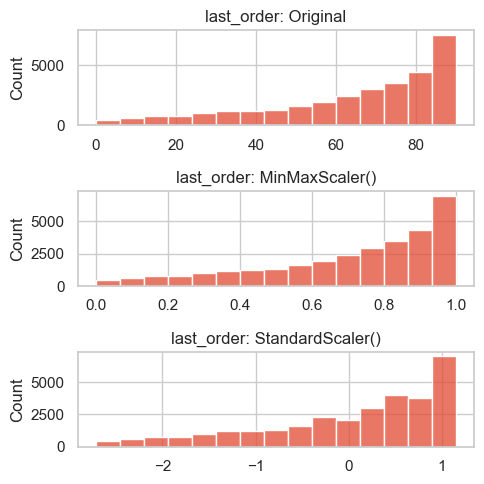

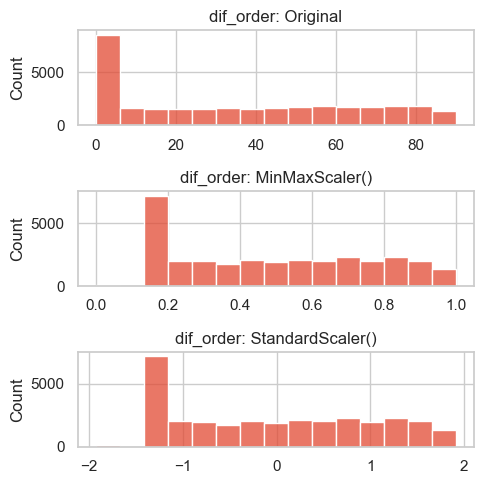

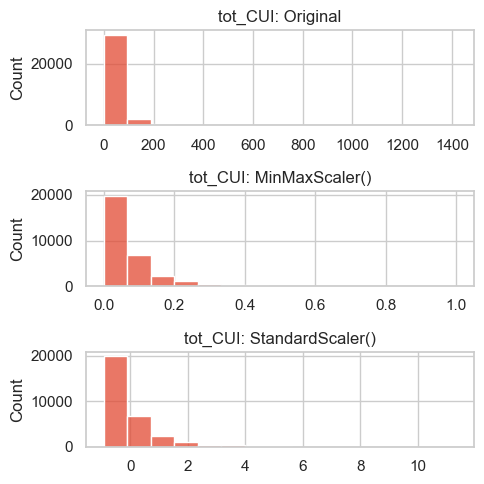

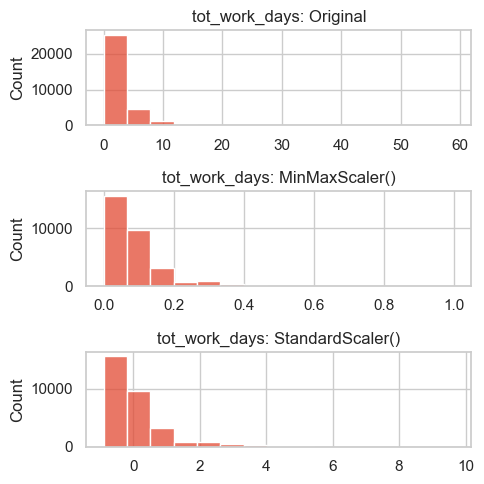

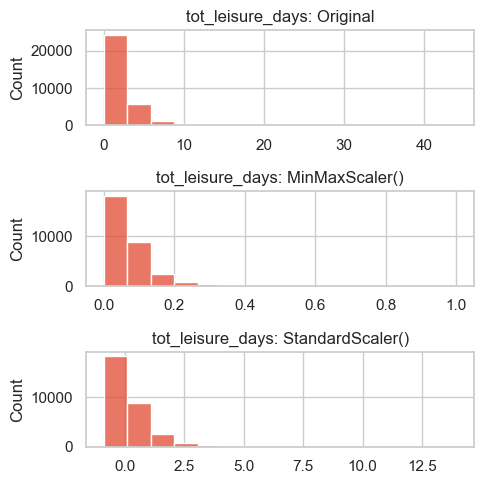

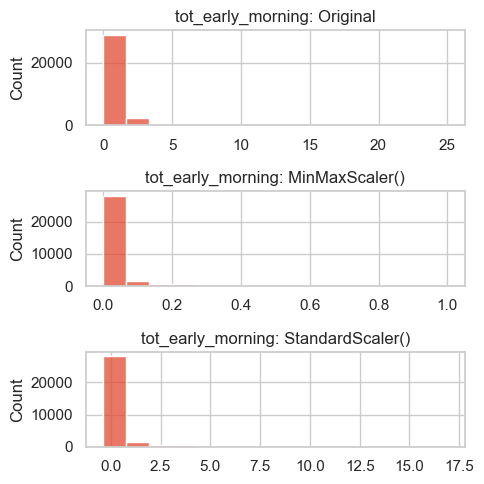

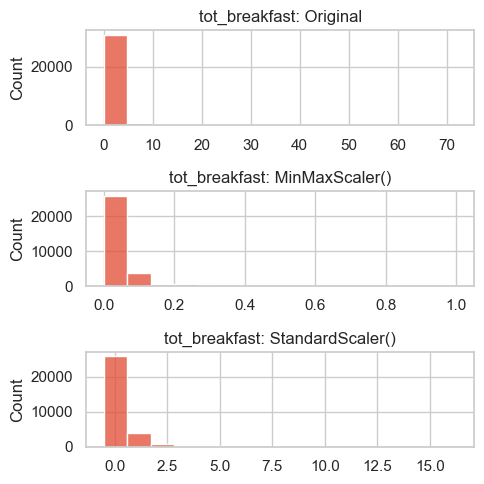

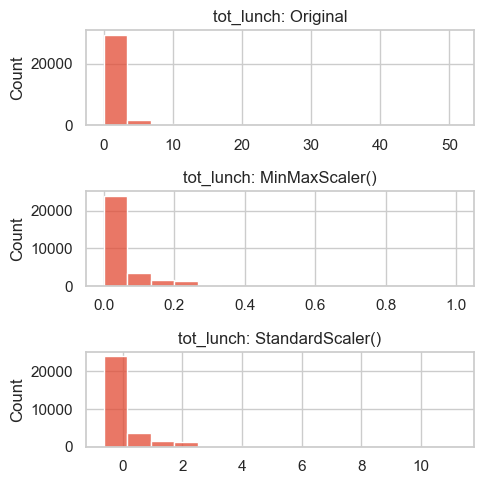

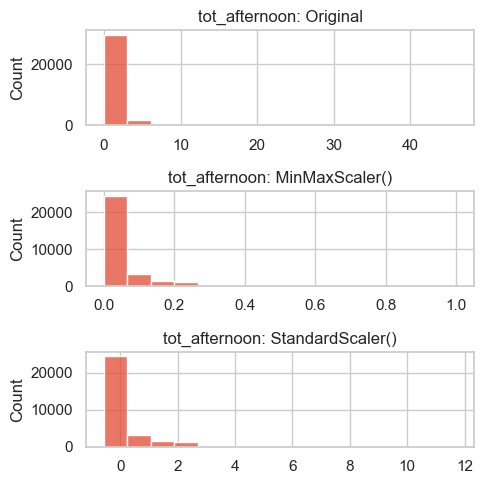

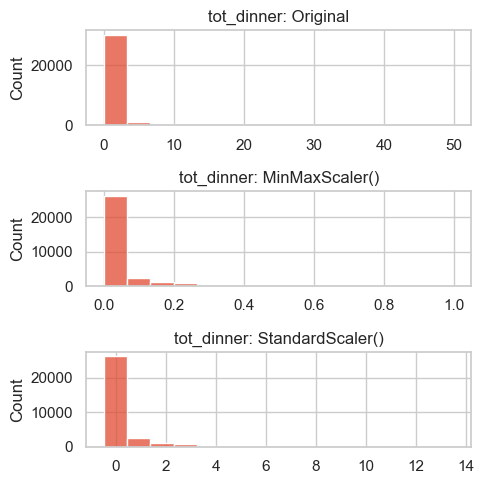

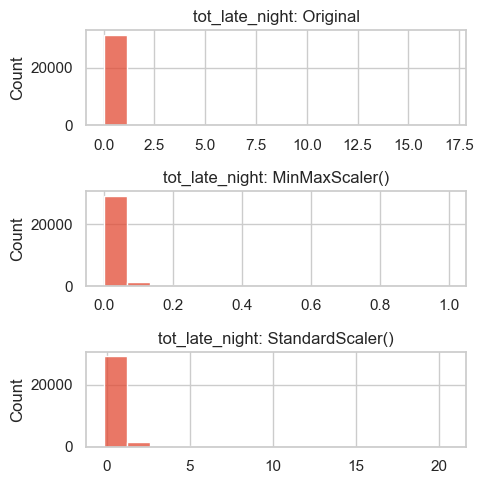

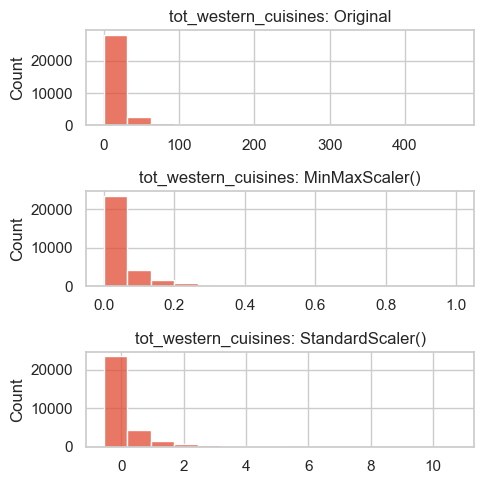

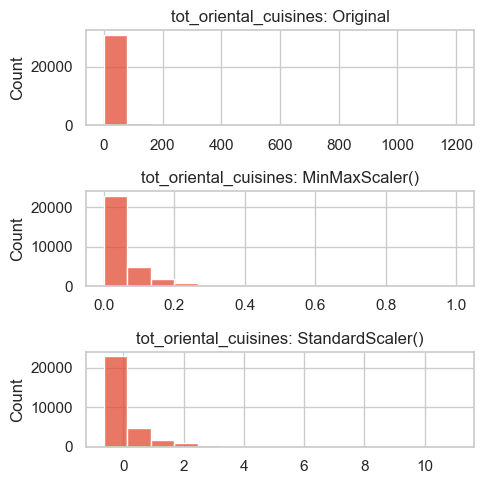

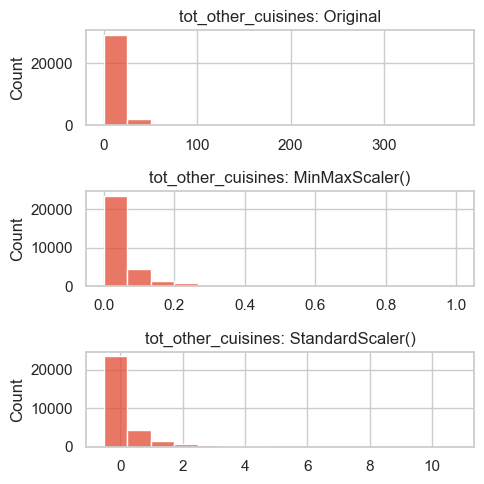

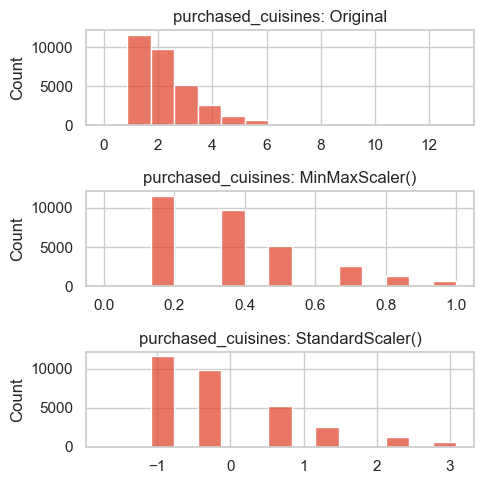

In [123]:
# Plot the histograms for the Scaling of Numeric Features
plot_scaled_histograms(
    df_original=df_original,
    df_minmax=df_minmax,
    df_standard=df_standard,
    features=new_metric_features,
    bins=15,
    figsize=(5, 5)
)

In [124]:
# Choose the standard scaleding as the best one
df = df_standard.copy()

<a class="anchor" id="section_7_6">

## 7.6 Encoding

</a>

[Back to 7. Preprocessing](#section_7)

In [125]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
df[non_metric_features] = df[non_metric_features].astype(str)
ohc = OneHotEncoder(sparse_output=False, drop="first")
ohc_feat = ohc.fit_transform(df[non_metric_features])
ohc_feat_names = ohc.get_feature_names_out()

In [126]:
ohc_df = pd.DataFrame(ohc_feat, index=df.index, columns=ohc_feat_names)  
ohc_df

customer_region_2440  customer_region_2490  customer_region_4140  \
customer_id                                                                     
1b8f824d5e                    0.0                   0.0                   0.0   
5d272b9dcb                    0.0                   0.0                   0.0   
f6d1b2ba63                    0.0                   0.0                   0.0   
180c632ed8                    0.0                   0.0                   0.0   
4eb37a6705                    0.0                   0.0                   0.0   
...                           ...                   ...                   ...   
f4e366c281                    0.0                   0.0                   0.0   
f6b6709018                    0.0                   0.0                   0.0   
f74ad8ce3f                    0.0                   0.0                   0.0   
f7b19c0241                    0.0                   0.0                   0.0   
fd40d3b0e0                    0.0                   0.0                   0.0   

             customer_region_4660  customer_region_8370  customer_region_8550  \
customer_id                                                                     
1b8f824d5e                    0.0                   0.0                   0.0   
5d272b9dcb                    0.0                   0.0                   0.0   
f6d1b2ba63                    1.0                   0.0                   0.0   
180c632ed8                    1.0                   0.0                   0.0   
4eb37a6705                    1.0                   0.0                   0.0   
...                           ...                   ...                   ...   
f4e366c281                    0.0                   0.0                   0.0   
f6b6709018                    0.0                   0.0                   0.0   
f74ad8ce3f                    0.0                   0.0                   0.0   
f7b19c0241                    0.0                   0.0                   0.0   
fd40d3b0e0                    1.0                   0.0                   0.0   

             customer_region_8670  is_chain_1  is_chain_10  is_chain_11  \
customer_id                                                               
1b8f824d5e                    0.0         1.0          0.0          0.0   
5d272b9dcb                    1.0         0.0          0.0          0.0   
f6d1b2ba63                    0.0         0.0          0.0          0.0   
180c632ed8                    0.0         1.0          0.0          0.0   
4eb37a6705                    0.0         0.0          0.0          0.0   
...                           ...         ...          ...          ...   
f4e366c281                    1.0         1.0          0.0          0.0   
f6b6709018                    1.0         0.0          0.0          0.0   
f74ad8ce3f                    1.0         1.0          0.0          0.0   
f7b19c0241                    1.0         0.0          0.0          0.0   
fd40d3b0e0                    0.0         0.0          0.0          0.0   

             is_chain_12  is_chain_13  is_chain_14  is_chain_15  is_chain_16  \
customer_id                                                                    
1b8f824d5e           0.0          0.0          0.0          0.0          0.0   
5d272b9dcb           0.0          0.0          0.0          0.0          0.0   
f6d1b2ba63           0.0          0.0          0.0          0.0          0.0   
180c632ed8           0.0          0.0          0.0          0.0          0.0   
4eb37a6705           0.0          0.0          0.0          0.0          0.0   
...                  ...          ...          ...          ...          ...   
f4e366c281           0.0          0.0          0.0          0.0          0.0   
f6b6709018           0.0          0.0          0.0          0.0          0.0   
f74ad8ce3f           0.0          0.0          0.0          0.0          0.0   
f7b19c0241           0.0          0.0          0.

In [127]:
df= pd.concat([df, ohc_df], axis=1)
df.head()

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
1b8f824d5e             2360     -1.338210     -0.394619      -0.014927   
5d272b9dcb             8670     -1.479510     -0.394619      -0.606066   
f6d1b2ba63             4660      1.487789     -0.851025      -0.606066   
180c632ed8             4660     -0.207810     -0.394619      -0.409020   
4eb37a6705             4660     -1.055610     -0.394619      -0.014927   

            is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                               
1b8f824d5e         1     -1.20445   -2.672739   DELIVERY           DIGI   
5d272b9dcb         2     -1.20445   -2.672739   DISCOUNT           DIGI   
f6d1b2ba63         2     -1.20445   -2.672739   DISCOUNT           CASH   
180c632ed8         1     -1.20445   -2.629767   DELIVERY           DIGI   
4eb37a6705         0     -1.20445   -2.629767    NOPROMO           DIGI   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00            0.0       0.0   
5d272b9dcb          12.82       6.39            0.0       0.0   
f6d1b2ba63           9.20       0.00            0.0       0.0   
180c632ed8           0.00      13.70            0.0       0.0   
4eb37a6705          14.57      40.87            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0           0.0          0.0   
5d272b9dcb                  0.0          0.0           0.0          0.0   
f6d1b2ba63                  0.0          0.0           0.0          0.0   
180c632ed8                  0.0          0.0           0.0          0.0   
4eb37a6705                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88          0.0           0.0                0.0   
5d272b9dcb         0.00          0.0           0.0                0.0   
f6d1b2ba63         0.00          0.0           0.0                0.0   
180c632ed8        17.86          0.0           0.0                0.0   
4eb37a6705         0.00          0.0           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  DOW_1  \
customer_id                                                                
1b8f824d5e         0.0                       0.0       0.0      1      0   
5d272b9dcb         0.0                       0.0       0.0      1      0   
f6d1b2ba63         0.0                       0.0       0.0      1      0   
180c632ed8         0.0                       0.0       0.0      0      1   
4eb37a6705         0.0                       0.0       0.0      0      1   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_2  HR_3  HR_4  \
customer_id                                                                    
1b8f824d5e       0      0      0      0      1     0     0     0     0     0   
5d272b9dcb       0      0      0      0      1     0     0     0     0     0   
f6d1b2ba63       0      0      0      0      1     0     0     0     0     0   
180c632ed8       0      0      0      0      1     0     0     0     0     0   
4eb37a6705       0      0      0      0      1     0     0     0     0     0   

             HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  \
customer_id                                                                    
1b8f824d5e      0     0     0     0     0      0      0      0      0      0   
5d272b9dcb      0     0     0     0     0      1      1      0      0      0   
f6d1b2ba63      0     0     0     0     1      0      1    

In [128]:
df.drop(non_metric_features, axis=1, inplace=True)

<a class="anchor" id="section_7_7">

## 7.7 PCA

</a>

[Back to 7. Preprocessing](#section_7)

In [258]:
# df_pca = df.copy()
# # Use PCA to reduce dimensionality of data
# pca = PCA()
# pca_feat = pca.fit_transform(df_pca[metric_features]) # CODE HERE
# pca_feat  # What is this output?
# pca_feat=pd.DataFrame(pca_feat)
# pca_feat

0         1         2         3         4         5         6   \
0     -1.758546 -0.313857 -2.776721  0.500848  0.056968 -1.276915 -0.946402   
1     -1.834939 -0.119376 -2.645835  1.037219 -0.558730 -1.325998 -0.792408   
2     -2.306088 -0.190814 -2.443441  1.192582  0.143879  1.531996 -1.152154   
3     -1.599142  0.032785 -2.655357  0.612240 -0.202706 -0.067490 -0.821469   
4     -1.149066  1.107620 -2.644922  1.159099 -0.289852 -0.951231 -0.858686   
...         ...       ...       ...       ...       ...       ...       ...   
31108 -2.932814 -0.139534 -1.920731  0.595066 -0.844902  0.525361 -2.009006   
31109 -3.032751 -0.017180 -1.752003  1.577113  0.165482 -0.293407 -1.466755   
31110 -2.980509  0.431152 -2.104761  0.355741 -0.893846 -0.305125 -1.710155   
31111 -3.095249  0.029909 -1.923872  0.782902  0.095426  0.917971 -1.628380   
31112 -3.175132 -0.179098 -1.772809  1.287129  0.163575  0.301935 -1.461711   

             7         8         9         10        11        12        13  \
0     -1.352814 -0.457030  0.296953  0.601170  0.418475 -0.490238 -0.424779   
1     -0.203989  0.568474  0.101778  0.145335  0.677874  0.555144  0.007506   
2     -0.079244  0.553180  0.124664  0.077514  0.522816 -0.069879  0.534473   
3     -1.012614  0.534827  0.281177 -0.782701 -0.016097  0.402267 -0.546891   
4     -0.478711  0.208581  1.037151  0.494636  0.109758  0.360082 -0.785857   
...         ...       ...       ...       ...       ...       ...       ...   
31108 -0.069445 -0.384136 -0.267471 -0.495409  0.295274  0.057080 -0.181430   
31109 -0.281574 -0.365453 -0.114176  0.003186  0.296868  0.537412  0.074735   
31110 -0.068978 -0.978419 -0.541307 -0.182378  0.302979  0.223431  0.231808   
31111 -0.803184  0.168515  0.123391 -0.373709  0.243092  0.330306  0.043025   
31112 -0.387291 -0.409761  0.105777 -0.092956  0.307843  0.564813  0.275920   

             14        15        16            17            18            19  \
0      0.232516  0.286234  0.038067 -7.958929e-15 -2.191667e-16  2.710155e-15   
1     -0.122026 -0.099582 -0.002990  3.128058e-15  3.517798e-16 -1.128048e-15   
2     -0.033171 -0.005546  0.000029  1.592458e-15 -5.244780e-16  3.908300e-16   
3     -0.181192 -0.069220  0.007187  1.464458e-15  4.646845e-17 -4.046678e-16   
4     -0.268375  0.169034  0.030629 -3.195009e-15  4.646845e-17  6.283600e-16   
...         ...       ...       ...           ...           ...           ...   
31108  0.021237 -0.149999 -0.009617  3.129402e-15  1.294011e-16  7.572848e-17   
31109  0.051926 -0.090817 -0.004099  2.383492e-15  8.614466e-17  3.491967e-16   
31110 -0.040640 -0.092846 -0.000483  2.140883e-15 -2.398446e-16  6.406974e-16   
31111 -0.001104 -0.075908 -0.001104  2.019200e-15  2.877938e-18  6.692531e-16   
31112  0.060484 -0.012285 -0.000581  1.405108e-15 -3.579445e-16  1.285947e-15   

                 20  
0     -1.284101e-15  
1      3.345180e-16  
2      1.106164e-16  
3     -4.808020e-16  
4      1.783929e-16  
...             ...  
31108 -4.385418e-16  
31109 -7.636842e-16  
31110 -9.215266e-17  
31111 -7.012342e-16  
31112 -4.167395e-16  

[31113 rows x 21 columns]

In [259]:
# # Get PCA output as table

# # Get the eigenvalues (explained variance)
# explained_variance = pca.explained_variance_

# # Get the explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_

# # get the cumulative explained variance ratio 
# # Hint: use np.cumsum()
# cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio) 

# # Combine into a dataframe
# pca_results = pd.DataFrame(
#     {
#         "Eigenvalue": explained_variance,
#         "Difference": np.insert(np.diff(explained_variance), 0, 0),
#         "Proportion": explained_variance_ratio,
#         "Cumulative": cumulative_explained_variance_ratio
#     },
#         index=range(1, pca.n_components_ + 1)
# )

# pca_results

Eigenvalue    Difference    Proportion  Cumulative
1   9.174118e+00  0.000000e+00  4.368487e-01    0.436849
2   1.781951e+00 -7.392167e+00  8.485209e-02    0.521701
3   1.246373e+00 -5.355776e-01  5.934921e-02    0.581050
4   1.181898e+00 -6.447516e-02  5.627906e-02    0.637329
5   1.020886e+00 -1.610124e-01  4.861205e-02    0.685941
6   9.984080e-01 -2.247790e-02  4.754171e-02    0.733483
7   9.588524e-01 -3.955560e-02  4.565817e-02    0.779141
8   8.405218e-01 -1.183306e-01  4.002356e-02    0.819165
9   7.882196e-01 -5.230225e-02  3.753306e-02    0.856698
10  7.134391e-01 -7.478049e-02  3.397220e-02    0.890670
11  6.914420e-01 -2.199707e-02  3.292475e-02    0.923595
12  5.438076e-01 -1.476345e-01  2.589477e-02    0.949489
13  4.864864e-01 -5.732119e-02  2.316527e-02    0.972655
14  4.321066e-01 -5.437976e-02  2.057584e-02    0.993230
15  1.075365e-01 -3.245702e-01  5.120619e-03    0.998351
16  2.839067e-02 -7.914578e-02  1.351893e-03    0.999703
17  6.237103e-03 -2.215357e-02  2.969953e-04    1.000000
18  1.197499e-15 -6.237103e-03  5.702192e-17    1.000000
19  1.013713e-16 -1.096127e-15  4.827049e-18    1.000000
20  0.000000e+00 -1.013713e-16  0.000000e+00    1.000000
21  0.000000e+00  0.000000e+00  0.000000e+00    1.000000

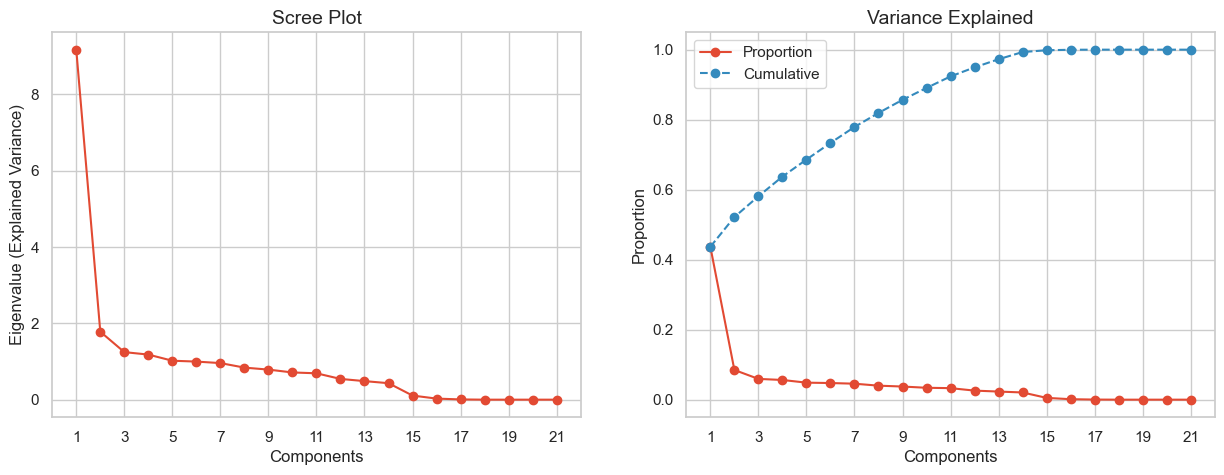

In [260]:
# # figure and axes
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# # draw plots

# ax1.plot(explained_variance, # PLOT THE EIGENVALUES (EXPLAINED VARIANCE)
#          marker=".", markersize=12)

# ax2.plot(explained_variance_ratio, # PLOT THE EXPLAINED VARIANCE RATIO
#          marker=".", markersize=12, label="Proportion")

# ax2.plot(cumulative_explained_variance_ratio, # PLOT THE CUMULATIVE EXPLAINED VARIANCE RATIO
#          marker=".", markersize=12, linestyle="--", label="Cumulative")

# # customizations
# ax2.legend()
# ax1.set_title("Scree Plot", fontsize=14)
# ax2.set_title("Variance Explained", fontsize=14)
# ax1.set_ylabel("Eigenvalue (Explained Variance)")
# ax2.set_ylabel("Proportion")
# ax1.set_xlabel("Components")
# ax2.set_xlabel("Components")
# ax1.set_xticks(range(0, pca.n_components_, 2))
# ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
# ax2.set_xticks(range(0, pca.n_components_, 2))
# ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

# plt.show()

After applying the three PCA rules, we were unable to draw any meaningful conclusions.

<div class="alert alert-block alert-success">
<a class="anchor" id="section_8">

# 8. Load the Preprocessed Datasets

</a>

The dataset was prepared for clustering analysis through a series of preprocessing steps. These included handling missing values to ensure data completeness, normalizing variables to bring numerical features to a comparable scale, and creating new features to capture relevant patterns for the analysis. The preprocessed dataset was then saved and will serve as the input for the clustering notebook, ensuring a well-organized and streamlined workflow for the subsequent steps.

[Back to ToC](#toc)

</div>

In [110]:
df.to_csv("Preprocessed_Data.csv", index=True)